<br></br>
# Data Mining and Decision Systems ACW
<br></br>
#### Student number: 201601628
<br>
<hr>

<a id="contents"></a>
<h1>Contents</h1>
<hr>
<div style="line-height: 2.5;">
<div><a href="#0"><h2 style="display: inline">.... 0. Notebook Initialisation</h2></a></div>
<div><a href="#01">........ <h3 style="display: inline">0.1. Package Imports</h3></a></div>
<div><a href="#02">........ <h3 style="display: inline">0.2. Data Loading</h3></a></div>
<div><a href="#03">........ <h3 style="display: inline">0.3. Misc</h3></a></div>
<p></p>
<div><a href="#1"><h2 style="display: inline">.... 1. CRISP DM</h2></a></div>
<div><a href="#11">........ <h3 style="display: inline">1.1. Business Understanding</h3></a></div>
<!--  -->
<div><a href="#12">........ <h3 style="display: inline">1.2. Data Understanding</h3></a></div>
<div><a href="#121">............ <h4 style="display: inline">1.2.1. Data Dictionary</h4></a></div>
<div><a href="#122">............ <h4 style="display: inline">1.2.2. Data Correctness</h4></a></div>
<div><a href="#1221">................ <h5 style="display: inline">1.2.2.1. Checking for Missing Data</h5></a></div>
<div><a href="#1222">................ <h5 style="display: inline">1.2.2.2. Checking for Duplicated Data</h5></a></div>
<div><a href="#1223">................ <h5 style="display: inline">1.2.2.3. Checking for Corrupt Data</h5></a></div>
<div><a href="#1224">................ <h5 style="display: inline">1.2.2.4. Evaluation of Concerns</h5></a></div>
<div><a href="#123">............ <h4 style="display: inline">1.2.3. Data Distribution</h4></a></div>
<div><a href="#124">............ <h4 style="display: inline">1.2.4. Feature Inspection</h4></a></div>
<div><a href="#125">............ <h4 style="display: inline">1.2.5. Evaluation of Understanding</h4></a></div>
<div><a href="#126">............ <h4 style="display: inline">1.2.6. Actions</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#13">........ <h3 style="display: inline">1.3. Data Preparation</h3></a></div>
<div><a href="#131">............ <h4 style="display: inline">1.3.1. Cleaning</h4></a></div>
<div><a href="#132">............ <h4 style="display: inline">1.3.2. Transformation</h4></a></div>
<div><a href="#133">............ <h4 style="display: inline">1.3.3. Stratification (TTS)</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#14">........ <h3 style="display: inline">1.4. Modeling</h3></a></div>
<div><a href="#141">............ <h4 style="display: inline">1.4.1. Baseline Models (all features)</h4></a></div>
<div><a href="#142">............ <h4 style="display: inline">1.4.2. Baseline Models (selected features)</h4></a></div>
<div><a href="#143">............ <h4 style="display: inline">1.4.3. Model Selection</h4></a></div>
<div><a href="#144">............ <h4 style="display: inline">1.4.4. Hyperparemeter Tuning</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#15">........ <h3 style="display: inline">1.5. Evaluation</h3></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#16">........ <h3 style="display: inline">1.6. (Theoretical) Deployment</h3></a></div>
</div>

<!--  Data Understanding
Data dictionary
	Data assumptions
		Data conformity
			Cols exist
			Number of categories
			Category correctness
			Data types
		
		Missing data

		Duplicated data
			Duplicated records
			Duplicated attributes

		Data distribution/balance/outliers		

		Data correlations and feature inspection
			Univariate
			Covariate (with label)
			Multivariate (with label)
			Apriori

		Inspect and understand concerns

		Actions
		
Data prep
	Clean according to understanding
	Normalise and Encode
	TTS
		Compare with raw data


Modeling
	Baseline model all features & all models
		kfold
		multi-linear?
		dtree
		dnn	
	Baseline model selected features
		kfold
		dtree
		dnn
	Select best model
		tune hyperparams

Data prep2 
	impute missing data
	better or worse performance ? -->

<a id="0"></a>
<h2>0. Notebook Initialisation</h2>

<a id="01"></a>
<h3>0.1. Package Imports</h3>

In [288]:
## Import all libraries for use in notebook.
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np

from sklearn import model_selection, linear_model, svm
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectFromModel ## https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
from sklearn.model_selection import StratifiedKFold ## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

from pandas.api.types import is_string_dtype, is_numeric_dtype
from collections import defaultdict ## Used in automating and collating data discrepancies.

%matplotlib inline

<a href="#contents">[back to top]</a>

<a id="02"></a>
<h3>0.2. Data Loading</h3>

In [2]:
path = "data.csv" ## Relative path to train/test data.
rawData = pd.read_csv(path) ## Original data to make copies from and compare with.
rawData.head(3) ## Show dataframe.

Random      Id Indication Diabetes  IHD Hypertension Arrhythmia History  \
0  0.602437  218242        A-F       no   no          yes         no      no   
1  0.602437  159284        TIA       no   no           no         no      no   
2  0.602437  106066        A-F       no  yes          yes         no      no   

   IPSI Contra   label  
0  78.0    20   NoRisk  
1  70.0    60   NoRisk  
2  95.0     40    Risk

In [3]:
rawData.columns = [col.lower() for col in rawData.columns] ## Make headers lowercase to avoid some trivial errors.
rawData.head(3) ## Show dataframe.

random      id indication diabetes  ihd hypertension arrhythmia history  \
0  0.602437  218242        A-F       no   no          yes         no      no   
1  0.602437  159284        TIA       no   no           no         no      no   
2  0.602437  106066        A-F       no  yes          yes         no      no   

   ipsi contra   label  
0  78.0    20   NoRisk  
1  70.0    60   NoRisk  
2  95.0     40    Risk

<a href="#contents">[back to top]</a>

<a id="03"></a>
<h3>0.3. Misc</h3>
Define some variables for easy access to properties of the raw data.

In [4]:
rawNRows = rawData.shape[0] ## Get number of rows in original dataframe.
rawNCols = rawData.shape[1] ## Get number of columns in original dataframe.
rawColNames = rawData.columns.values # Get column names which will often be used as an iterator.
concerns = defaultdict(list) ## Create a dict to store data discrepencies without littering notebook with outputs until required.

## For pretty printing.
## ''' n == number of indents '''
def Indent(n=1):
    indent = "    " * n
    return indent

<a href="#contents">[back to top]</a>

<a id="1"></a>
<h2>1. CRISP DM</h2>
<img src="crisp-dm.png" style="max-height:300px">
<a href="#contents">[back to top]</a>

<a id="11"></a>
<h3>1.1. Business Understanding</h3>

<div style="font-size: 14px">
<p>DOMAIN: Cardio-vascular medicine / healthcare</p>
<ul>
    <li>As a healthcare dataset it may be "natural", anonymised patient data, study data (e.g. clinical trial), or an aggregation of many different datasets.</li>
    <li>There is a chance there is "control" data (healthy cohorts) within the dataset or, similarly, focus groups that consist of unhealthy cohorts.</li>
    <li>Due to the largely subjective nature of clinical diagnosis (i.e. different doctors with varying levels of experience make the diagnoses), it's entirely possible that some data is mislabelled (has the wrong classification).</li>
    <li>It is also possible that some diagnoses or features are self certified or derived from incorrect patient assumptions (e.g. "Yes, I have a history of...").</li>
    </ul>
<p>PROBLEM TYPE: Classification</p>
<p>INPUTS: Tabulated patient data; 1520 records of 11 features</p>
<p>OUTPUTS:</p>
    <ul>
        <li>Risk</li>
        <li>No Risk</li>
    </ul>
</div>

<a href="#contents">[back to top]</a>

<a id="12"></a>
<h3>1.2. Data Understanding</h3>

<a id="121"></a>
<h4>1.2.1. Data Dictionary</h4>

<table>
    <tbody>
        <tr>
            <td>
                <p><strong>Attribute</strong></p>
            </td>
            <td>
                <p><strong>Value Type</strong></p>
            </td>
            <td>
                <p><strong>NumberOfValues</strong></p>
            </td>
            <td>
                <p><strong>Values</strong></p>
            </td>
            <td>
                <p><strong>Comment</strong></p>
            </td>
            <td>
                <p><strong>Non-clinical Description</strong></p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Random</p>
            </td>
            <td>
                <p>Real</p>
            </td>
            <td>
                <p>Number of Records</p>
            </td>
            <td>
                <p>Unique</p>
            </td>
            <td>
                <p>Real number of help in randomly sorting the data records</p>
            </td>
            <td>
                <p>Real number of&nbsp;help&nbsp;in randomly sorting the data records: Should be unique values.</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Id</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Max of Number of Records</p>
            </td>
            <td>
                <p>Unique to patient</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique values unless patient has multiple sessions</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique value per patient. Patient can have multiple sessions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Indication</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Four</p>
            </td>
            <td>
                <p>{a-f, asx, cva, tia}</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p><p> a-f :&nbsp;Atrial-Fibrillation</p>
                <p>asx&nbsp;:&nbsp;Asymptomatic Stenosis&nbsp;</p><p>cva&nbsp;: Cardiovascular Arrest</p>
                <p>tia&nbsp;:&nbsp;Transient Ischemic Attack ("mini-heart attack")</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Diabetes</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IHD</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Hypertension</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Arrhythmia</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from</p>
                <p>Arrhythmia (i.e. erratic heart beat)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Arrhythmia (i.e. erratic&nbsp;heart beat)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>History</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Has the patient a history of</p>
                <p>Cardiovascular interventions?</p>
            </td>
            <td>
                <p>Has the patient a history of Cardiovascular interventions?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IPSI</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Contra</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Label</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{risk, norisk}</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
        </tr>
    </tbody>

<br>
<b style="color: red;">NOTE:</b> "Session" is also included in the non-clinical description, but not included in the data dictionary.
<br>
<table>
    <tr>
        <td>
            <p><strong>Attribute</strong></p>
        </td>
        <td>
            <p><strong>Value Type</strong></p>
        </td>
        <td>
            <p><strong>NumberOfValues</strong></p>
        </td>
        <td>
            <p><strong>Values</strong></p>
        </td>
        <td>
            <p><strong>Comment</strong></p>
        </td>
        <td>
            <p><strong>Non-clinical Description</strong></p>
        </td>
    </tr>
    <tr>
        <td>
            <p>Session</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Max Number of Records (assumed)</p>
        </td>
        <td>
            <p>Unique to patient</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Anonymous patient session identifier.</p>
        </td>
    </tr>
</table>
<br>

<a href="#contents">[back to top]</a>

<a id="122"></a>
<h4>1.2.2. Data Correctness</h4>
Check for data conformity to data dictionary and explore common pitfalls (e.g. missing or duplicate data). All checks are collated in a dictionary ("concerns") by  type of check (e.g. "MISSING DATA") to help notebook readability.

<a id="1221"></a>
<h5>1.2.2.1 Checking for Missing Data</h5>
Look for records containing nan or missing values:

In [5]:
df = rawData.copy() ## Manipulate a COPY of the original data as to not affect it.

concerns["MISSING DATA"] = [Indent() + "The following columns have missing data:"] ## Init list for missing data concerns.
records = []

for col in rawColNames:
    nans = df[col][df[col].isna() == True] ## Get all nan values in the series (df[col]).
    indexes = nans.index.values ## Get the indexes of those nans.
    nNans = len(nans) ## Count how many there are.
    
    ## If there are nans, list them in the dictionary, under the MISSING DATA key.
    if (nNans > 0):
        concernStr = (Indent(2) + col + " has " + str(nNans) + " nan values at indexes:" + str(indexes))
        concerns["MISSING DATA"].append(concernStr)
        records += list(indexes)

## Record the % of missing data if any is missing.
if (len(records) > 0):
    nRecords = len(set(records))
    percent = (100/rawNRows) * nRecords
    concerns["MISSING DATA"][0] = (Indent() + "The following columns have missing data which affects " + str(nRecords) + " records (" + str(round(percent, 2)) + "% of all records).")

<a href="#contents">[back to top]</a>

<a id="1222"></a>
<h5>1.2.2.2 Checking for Duplicated Data</h5>
Look for records that are entirely the same or very similiar (e.g. allow different values for random or id).

In [6]:
## Helper function for checking for duplicates when any number of columns are dropped.
## ''' ignore == list of columns to drop '''
## ''' df == dataframe to check for duplicates '''
def CheckForDuplicates(ignore=[], df=rawData.copy()):
    dupes = df.drop(columns=ignore)[df.drop(columns=ignore).duplicated() == True]
    if dupes.shape[0] > 0:
        return dupes
    else:
        return 0 # "No duplicates."
    
## Helper function for appending duplicates to concerns.
## ''' dupes == df => result from CheckForDuplicates() '''
## ''' out == bool => print output or not '''
def AppendDuplicateConcerns(dupes, ignore="NO", out=False):
    if (type(returnVal) != int):
        ## When ignoring # columns, there are n duplicated records at indexes [].
        nDupes = str(len(dupes))
        indexes = dupes.index.values
        concerns["DUPLICATED DATA"].append(Indent(2) + str(nDupes) + " duplicates were found when ignoring columns " + str(ignore) + " at indexes " + str(indexes))
        if (out):
            print(dupes)

Check for records that are complete duplicates (all features are the same):

In [7]:
concerns["DUPLICATED DATA"] = [Indent() + "The following potential duplicates were found:"] ## Init list.
returnVal = CheckForDuplicates()
AppendDuplicateConcerns(returnVal)

Check for records that are duplicates when any single column is removed:

In [8]:
for col in rawColNames:
    returnVal = CheckForDuplicates(ignore=[col])
    AppendDuplicateConcerns(returnVal, [col])

Check for records that are duplicates when any pair of features are ignored:

In [9]:
## Nested for loop to check ALL combinatory pairs.
i = 0
for colO in rawColNames: ## Outer column; i.e. column[n].
    i+=1
    for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
        ignoring = [colO, colI]
        returnVal = CheckForDuplicates(ignore=ignoring)
        AppendDuplicateConcerns(returnVal, ignore=ignoring)

Check for records that are duplicates when any trio of features are ignored:

<div style="font-size: 1rem;"><b style="color: red;">NOTE:</b> this code has been commented out for readability. The omission of random and id results and any other feature results 90%+ "duplicates", which is discussed in the Evaluation of Concerns section.</div>

In [10]:
# i = 0
# j = 1
# for colO in rawColNames: ## Outer column; i.e. column[n].
#     i += 1
#     for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
#         j += 1
#         for colIM in rawColNames[j:]: ## Innermost column; i.e. column[n+1+1].
#             ignoring = [colO, colI, colIM]
#             returnVal = CheckForDuplicates(ignore=ignoring)
#             AppendDuplicateConcerns(returnVal, ignore=ignoring)

<a href="#contents">[back to top]</a>

<a id="1223"></a>
<h5>1.2.2.3 Checking for Corrupted Data</h5>
Create an object that defines a set of assumptions as described in the data dictionary and flag any concerns.

In [11]:
# Dict derived from data dictionary for automated checking.
## key == column name.
## - valType == python data type.
## - nVals == range of accepted values for continuous column.
## - vals == possible values for any categoric or discrete column.

dataAssumptions = {
    "random":{ ## Col name.
        "valType": float, ## Real.
        "nVals": (rawNRows, rawNRows), # Unique per record.
    },  
    "id":{
        "valType": int,## Integer.
        "nVals": (1, rawNRows), ## Unique per patient.
    },
    "indication":{
        "valType": str, ## Nominal.
        "vals": ["a-f","asx","cva","tia"] ## Possible values (except nan).
    },
    "diabetes":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ihd":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "hypertension":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "arrhythmia":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "history": {
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ipsi": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101) # Percentage.
    },
    "contra": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101), # Percentage.
    },
    "label": {
        "valType": str, ## Nominal.
        "vals": ["risk", "norisk"]
    },
    "session":{ ## This feature was given separate to the dictionary.
        "valType": object, # Unknown.
        "nVals": (1, rawNRows), ## Unique per patient (assumed).
    },
}

Check that all expected columns exist in the data:

In [12]:
df = rawData.copy()#.dropna()
concerns["MISSING COLUMNS"] = [Indent() + "The following expected columns are missing from the data:"] ## Init list.

for key in dataAssumptions:
    if (key not in rawColNames):
        concerns["MISSING COLUMNS"].append(Indent(2) + key)
# print(concerns["MISSING COLUMNS"])

Check that the number of unique values or categories (excluding nan) in each column is as expected.

In [13]:
df = rawData.copy().dropna()
concerns["NUMBER OF UNIQUE VALUES"] = [Indent() + "The following columns have an unexpected number of unique values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames): ## If it is a column we are aware of...
        actualNValues = len(df[k].unique()) ## Get unique values.
        try:
            expectedNValues = (1, len(v["vals"])) ## Assume is a discrete or categoric column.
        except:
            expectedNValues = v["nVals"] ## Actually, column is continuous.

        if (not(actualNValues >= expectedNValues[0]) or not(actualNValues <= expectedNValues[1])): ## Check actual number of values is within the expected range.           
            concerns["NUMBER OF UNIQUE VALUES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedNValues) + "\n" + Indent(3)+ "Actual: " + str(actualNValues))

Check that the unique values or categories in each column are as expected.

In [14]:
df = rawData.copy()#.dropna()
concerns["EXPECTED VALUES"] = [Indent() + "The following columns have unexpected values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualValues = df[k].dropna().unique() ## Ignore nan values for this check.
        try: ## Assume column is categorical/discrete.
            expectedValues = v["vals"]
            if (not(set(actualValues) & set(expectedValues))):
                concerns["EXPECTED VALUES"].append(Indent(2) + k+ "\n" + Indent(3)+ "Expected: " + str(set(expectedValues)) + "\n" + Indent(3)+ "Actual: " + str(set(actualValues)) + "\n")
        except: ## Is not categorical column.
            continue 

Check that the data type of each column is as expected:

In [15]:
df = rawData.copy()#.dropna()
concerns["EXPECTED TYPES"] = [Indent() + "The following columns have entries of the wrong data type:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualT = df[k].dropna().describe().dtypes ## Ignore nan values for this check.
        expectedT = v["valType"] 

        if (expectedT == int or expectedT == float):
            correctT = is_numeric_dtype(actualT) ## Check is numeric.
        else:
            correctT = is_string_dtype(actualT) ## Check is obj/str.
        
        if (not correctT):
            concerns["EXPECTED TYPES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedT) + "\n" + Indent(3) +"Actual: " + str(actualT))

<a id="1224"></a>
<h5>1.2.2.4. Evaluation of Concerns</h5>
Look at collated concerns before further analysis.

In [16]:
actions = [] ## Create list to store actions to be carried out in the cleaning phase.

for key in concerns:
    print ("\n" + str(key) + "\n")
    for val in concerns[key]:
        print(val)
    print("\n________________________________________________________________\n")


MISSING DATA

    The following columns have missing data which affects 17 records (1.12% of all records).
        indication has 3 nan values at indexes:[ 442  822 1007]
        diabetes has 2 nan values at indexes:[447 514]
        hypertension has 3 nan values at indexes:[201 590 983]
        history has 2 nan values at indexes:[337 784]
        ipsi has 4 nan values at indexes:[620 752 845 916]
        label has 3 nan values at indexes:[ 812  974 1418]

________________________________________________________________


DUPLICATED DATA

    The following potential duplicates were found:
        1094 duplicates were found when ignoring columns ['random', 'id'] at indexes [  13   62   65 ... 1517 1518 1519]
        1 duplicates were found when ignoring columns ['id', 'contra'] at indexes [1134]

________________________________________________________________


MISSING COLUMNS

    The following expected columns are missing from the data:
        session

____________________________

<b>Missing Data</b>

Thankfully, there is a **very small amount of data missing (1.12%)**. Therefore effect of imputing values would probably be slight, or even cause more harm than good.

- <p style="color: red">Initially, the 17 records will be removed.<p>

- <p style="color: red">For continued analysis (i.e. plotting distributions etc.) these records will be ignored for the time being.</p>

In [17]:
actions.append("cleanData = cleanData.dropna() ## Drop nan values.")

<b>Duplicated Data</b>

1. This check finds that **no records are duplicated in their entirety**, or when a single column is ignored.


2. When pairs of columns are ignored, some duplicates appear.
    - 1094 duplicates were found when ignoring columns ['random', 'id'].
    
        **This suggests quite a homogenous data set** regardless of duplicates, since these features are the only ones supposed to be unique. This suggestion is supported by the quantity of 'duplicates', the fact that no duplicates were reported when 'random' alone was removed, and the fact that id is unique as expected (see below).
    
    -
        
    - 1 duplicates were found when ignoring columns ['id', 'contra'].
    
        Assuming that this dataset was manually created in a tool like Excel, a telltale sign would be **locality** (if the duplicate records are next to each other).


3. Checking for duplicates with combinations of 3 features removed proved redundant based on the effect of removing 'id' and 'random'; removing another column means almost all of the data (90%+) is duplicated, which is assumed to be highly unlikely.

-

To be thorough, **a check can be made for the locality of supposed duplicates**. A depth of 3 has been selected arbitrarily (i.e. check if a given record is the same as any of the next 3 records): 

In [18]:
df = rawData.copy()#.dropna()
df = df.drop(columns=["id","random"])
df = df[df.duplicated(keep=False) == True]
depth = 3 ## Look for duplicates that are up-to n.. records apart.

# Init lists in dictionary.
dupes = {}
for i in range(1, depth + 1):
    dupes[str(i) + " records away"] = []

i = 0
for index, row in df.iterrows():
    i += 1
    for nextIndex, nextRow in df[i:i+1].iterrows(): ## Grab next record.
        for j in range(1, depth + 1):
            if ((nextIndex == index + j) and set(row) == set(nextRow)): ## Check if index is local and values are same.
                dupes[str(j) + " records away"].append((index, nextIndex))
        
dupes

{'1 records away': [(493, 494), (889, 890), (1043, 1044), (1243, 1244)],
 '2 records away': [(452, 454)],
 '3 records away': []}

This additional check shows that **4 of the duplicates found in this subset of the data are found consecutively**. Similarly, 1 duplicate is found with a single record between it and the possible duplicate, and no duplicates are 3 apart.

This check makes the **assumption that the given data is in the same order as it was created**, and that the chances of inputing the same record more than 3 records away is unlikely.

- <p style="color: red">Based on these assumptions and the small amount of reasonable/local duplicates, it may be wise to <b>leave these datapoints out</b> of the models to begin with, although with such a homogenous dataset it is also reasonable to expect this scenario.</p>

In [19]:
actions.append("cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.")

<b>Missing Columns</b>

The check shows that **the "session" column is missing**, which isn't actually in the given data dictionary. Since all patient id's are unique in this data set, it could be that it has been removed because there are no additional visits (sessions) for any record.

Out of curiosity and on the off-chance that this assumption is incorrect, consideration was given to the possibility that the **session information might be encoded into the random or id features**.

To explore this, the data was opened in Excel to see how the data behaved when the format was changed to date or time. This revealed that the random values were a lot larger than displayed in the jupyter notebook (e.g. 0.6893308196912509) and neither the id or random features could be reliably converted.


- <p style="color: red">Ultimately, model creation will continue under the assumption that the session column is deliberately omitted.</p>

<b>Number of Unique Values</b>

This check found issues with the number of values in the random, indication, and label columns.

RANDOM:

    Expected: 1520
    Actual: 1212

Random is described as being unique per-patient in the data dictionary, hence the expected 1520 values. Presumably,
however, the missing values can be attributed to duplicated or nan values.

In [20]:
df = rawData.copy()
print (str(df.shape[0]) + " total records.")
nDupes = df[df["random"].duplicated() == True].shape[0]
nMissing = df["random"].shape[0] - df["random"].unique().shape[0]
nNan = df[df["random"] == np.isnan].shape[0]
print(str(nMissing) + "  unique 'random' values are missing.")
print(str(nDupes) + " 'random' values are duplicated.")
print(str(nNan) + " 'random' values are nan.")
stillMissing = nMissing - (nDupes + nNan)
print (str(stillMissing) + " remain records unaccounted for.")

1520 total records.
298  unique 'random' values are missing.
298 'random' values are duplicated.
0 'random' values are nan.
0 remain records unaccounted for.


The random feature may still be random, but **it isn't unique as as described in the data dictionary**. The possibility that information is encoded in the random value is possible but seems unlikely, and has been explored to some degree in regard to the missing, "session" column. These ideas can be explored further by taking some statistical mesasures:

Mean: 0.5095450426428438
Median: 0.517615648147363
Mode: 0.506596920679855
Std: 0.28400622461301955


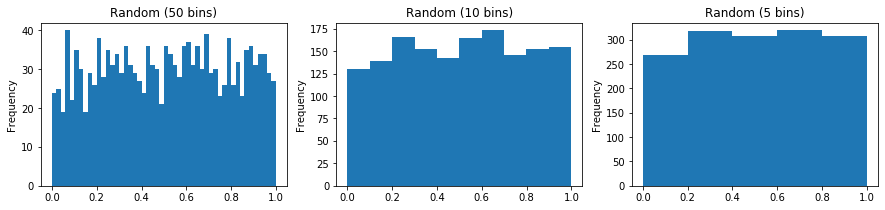

In [21]:
df = rawData.copy()
df = df["random"]
print("Mean: " + str(df.mean()))
print("Median: " + str(df.median()))
print("Mode: " + str(df.mode()[0]))
print("Std: " + str(df.std()))


plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
df.plot(kind='hist',title='Random (50 bins)', bins=50) ## Extra bins.

plt.subplot(1, 3, 2)
df.plot(kind='hist',title='Random (10 bins)') ## Default bins.

plt.subplot(1, 3, 3)
df.plot(kind='hist',title='Random (5 bins)', bins=5) ## Reduced bins

plt.show()


Whilst it isn't unique, the plateu/random histogram and similarities of the different averages supports that it is random, which means it should add little-no value to any classifications.

- <p style="color: red">Remove random as feature when training.</p>

In [22]:
actions.append("cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.")

INDICATION:

    Expected: 1 to 4
    Actual: 5
    
    
Review unique values in the indication column:

In [23]:
df = rawData.copy()
df = df["indication"]
df.unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [24]:
print("ASx count: " + str(len(df[df == "ASx"])))
print("Asx count: " + str(len(df[df == "Asx"])))

ASx count: 186
Asx count: 32


In [25]:
df = rawData.copy()
df.groupby(["label", "indication"], group_keys=False).size()

label    indication
NoRisk   A-F           290
         ASx           113
         CVA           279
         TIA           325
Risk     A-F           203
         ASx            72
         Asx            32
         CVA           134
         TIA            64
Unknown  ASx             1
         CVA             1
dtype: int64

The data dictionary provides 4 classes for the indication feature, but there are 5.

ASx and Asx could potentially be 2 separate classes, considering that neither value is a one-off and the above *groupby()* actually finds that **all** "Asx" instances are in the Risk class. Given the dictionary, I'll assume human error for now.

- <p style="color: red">Treat the 2 'asx' variations as the same; convert all values to lowercase.</p>

actions.append("cleanData['indication'] = cleanData['indication'].apply(lambda x: str(x).lower()) ## Convert 'indications' to lower case.")

LABEL:

    Expected: 1 to 2
    Actual: 3

In [26]:
df = rawData.copy()
df = df["label"]
df.unique()

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [27]:
indexes = df[df == "Unknown"].index.values
print("Unknown count: " + str(len(df[df == "Unknown"])))
print("Indexes: " + str(indexes))

Unknown count: 2
Indexes: [475 523]


The data dictionary provides 2 classes for the label feature (risk, norisk), but there are 3 (excluding nan).

Since the purpose of the end model will be to predict risk or no-risk, and since there are only 2 "unknown" classifications, it makes most sense to remove these records as they are not represented well enough to understand further. 

The label could be imputed, but there is not enough domain knowledge to justify this and the only 2 records should provide little-no benefit.

- <p style="color: red">Remove records classified as "unknown".</p>

In [28]:
actions.append("cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.")

<b>Expected Values</b>

There were unexpected values found in columns: indication, contra, label. Label and indication have been adressed in the previous section.

It is clear to see that contra was raised because the expected values are integers (as per the data dictionary), whilst actual values are strings.

Some of these strings are blank, which will need to be converted to nan and missing data will be re-evaluated.

In [29]:
df = rawData.copy()
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))
indexes = df["contra"][df["contra"].isna() == True].index.values
nNans = len(indexes)
print(str(nNans) + " additional nans created.")
if (nNans > 0):
    print("at indexes: " + str(indexes))

1 additional nans created.
at indexes: [453]


To begin with, remove the record.

- <p style="color: red">Convert blank-string values to nan.</p>
- <p style="color: red">Convert contra column to numeric.</p>
- <p style="color: red">Remove nan.</p>

In [30]:
actions.append("cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.") ## https://stackoverflow.com/a/21942746 [acessed 20/11/19]
actions.append("cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.")
actions.append("cleanData = cleanData.dropna() ## Remove additional nan.")

<b>Expected Types</b>

The only non-conforming feature was contra, which was resolved in the previous section (converted from string to int).

<b>Other</b>

Since the id feature is unique to each patient and it hasn't been determined to contain session information, it can probably be dropped as it *shouldn't* correlate with any other features. This decision might be supported by a heatmap of correlations between features:

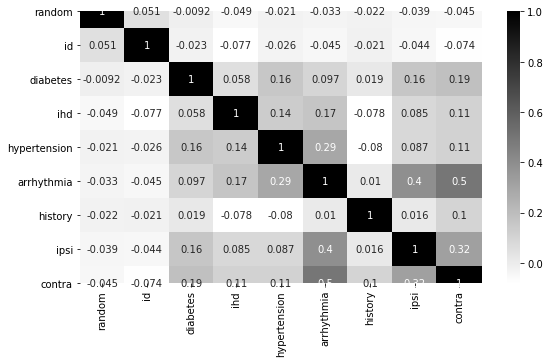

In [31]:
df = rawData.copy()

## Make all columns numeric
for col in df.columns.values:
    df = df.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0])
## Fix contra to be numeric too.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))

correlations = df.corr()
plt.figure(figsize=(9,5))
sns.heatmap(correlations, annot=True, cmap="gist_yarg")

The heatmap suggests that there is some correlation between random and id, but not much else. Out of interest, create a scatter of these 2 continuous variables and set the hue to label to see distribution of label within ID:

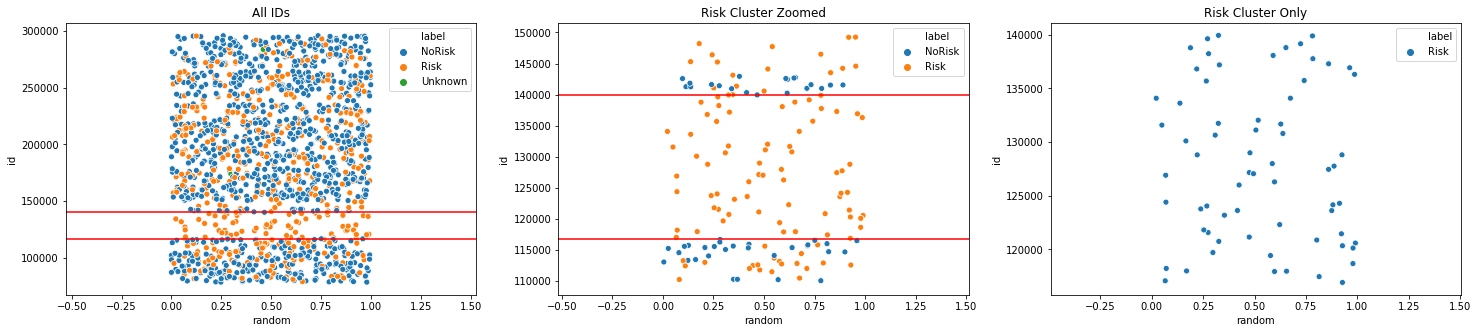

In [32]:
df = rawData.copy()

## All ids plotted against random.
plt.figure(figsize=(25,5))
plt.subplot(1,3,1,xmargin=0.5, title="All IDs")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)

## PLot focused on the cluster - boundaries determined by observing previous plot.
df = df[df['id'] > 110000]
df = df[df['id'] < 150000]
plt.subplot(1,3,2,xmargin=0.5, title="Risk Cluster Zoomed")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)

## Cluster only - boundaries determined by observing previous plot and iteratively reducing until no "norisk" data points.
df = df[df['id'] > 116720]
df = df[df['id'] < 139960]
plt.subplot(1,3,3,xmargin=0.5, title="Risk Cluster Only")
sns.scatterplot(x="random", y="id", hue="label", data=df)

There is a distinct cluster of IDs where all patients are at risk. This might a deliberate unhealthy cohort that were part of a study but it may might indicate errors with labelling the data set.


**Try removing this cluster** and  creating another heatmap to determine it's effects on correlations:

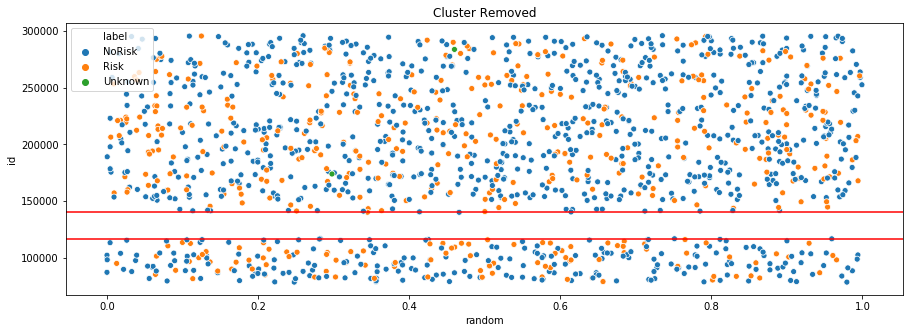

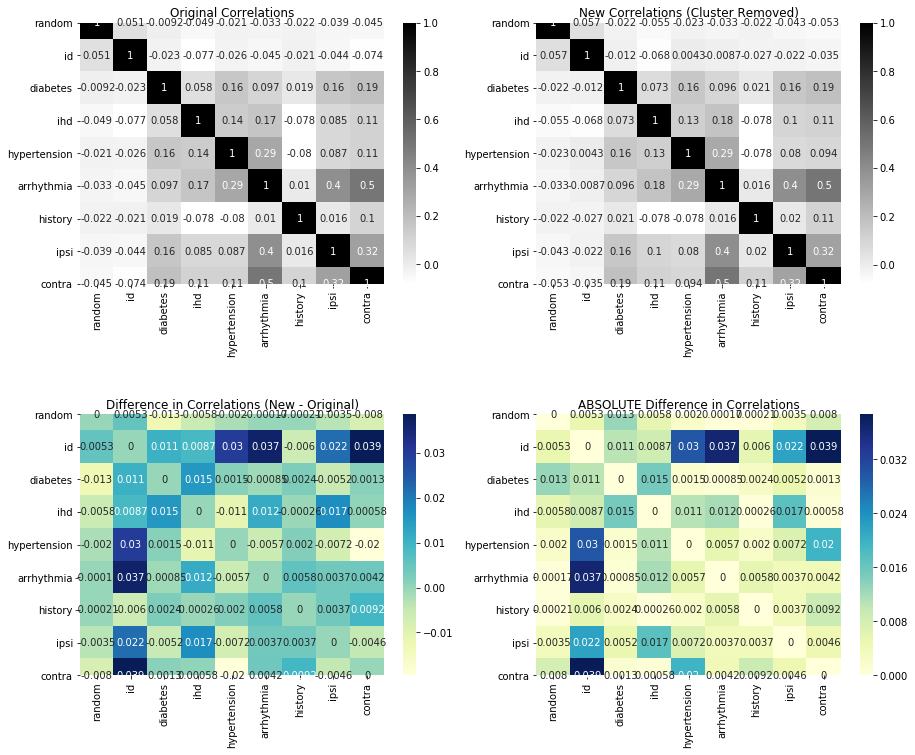

In [33]:
## Compare original correlations with when the id, "Risk" cluster is removed.

cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
df = rawData.copy()
df = df.drop(indexes)
plt.figure(figsize=(15,5))
plt.title("Cluster Removed")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)
plt.show();

##--
## Make all fields numeric so they're compatible with heatmap.
for col in df.columns.values:
    df = df.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0])
## Fix contra to be numeric too.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))

## Plot the new heatmap and compare with the original.
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

## Original.
plt.subplot(2,2,1, title="Original Correlations")
sns.heatmap(correlations, annot=True, cmap="gist_yarg")

## New.
correlations2 = df.corr()
plt.subplot(2,2,2, title="New Correlations (Cluster Removed)")
sns.heatmap(correlations2, annot=True, cmap="gist_yarg")

## Change between original and new.
correlations3 = correlations2 - correlations
plt.subplot(2,2,3, title="Difference in Correlations (New - Original)")
sns.heatmap(correlations3, annot=True, cmap="YlGnBu")

## Absoluted change between original and new.
correlations3 = abs(correlations2 - correlations)
plt.subplot(2,2,4, title="ABSOLUTE Difference in Correlations")
sns.heatmap(correlations3, annot=True, cmap="YlGnBu")

There are no significant changes in univariate correlations when removing the cluster, so regardless of the the reasoning for it, its effect seems limited. However, looking at the features most affected features (in the "ABSOLUTE" heatmap) indicates **contra, arrythmia, and hypertension (possibly ihd and ipsi) *may* have quite a significant effect on the classificiation in  this cluster.**


To close the original discussion on the fate of the id feature, it seems (as would be expected) to contribute very little to the classification, so it can be be dropped initially.

- <p style="color: red">Drop id column.</p>

In [34]:
actions.append("cleanData = cleanData.drop(columns=['id']) ## Drop id column.")

<a href="#contents">[back to top]</a>

**Looking at the 'Risk' cluster more closely.**

Based on the the changes in correlation when the id cluster was removed, look at the affected features and see if their impact on classification is present in the full dataset.

In [35]:
## Fix contra to be numeric too.
cluster['contra'] = cluster['contra'].replace(r'^\s*$', np.nan, regex=True)
cluster['contra'] = cluster['contra'].apply(lambda x: float(x))

iah = cluster[["ihd","arrhythmia","hypertension"]]
iah.describe(include="all")

ihd arrhythmia hypertension
count    66         66           66
unique    2          2            2
top     yes        yes          yes
freq     40         38           54

The most frequent values are positive for all 3 features. If we look at the frequency of the different combinations of these features, we may find a critical combination that indicates risk, which we can look for in the larger dataset.

In [36]:
iah.groupby(["arrhythmia", "hypertension"]).size()

arrhythmia  hypertension
no          no               5
            yes             23
yes         no               7
            yes             31
dtype: int64

This suggests that hypertension is the most significant feature in this subset, and risk is increased further when arrythmia and hypertension are combined.

In [37]:
iah.groupby(["ihd", "arrhythmia", "hypertension"]).size()

ihd  arrhythmia  hypertension
no   no          no               2
                 yes              6
     yes         no               6
                 yes             12
yes  no          no               3
                 yes             17
     yes         no               1
                 yes             19
dtype: int64

Combinations of positive ("yes") ihd and and hypertension seem to have a similar effect to pairing hypertension with arrhythmia, and slightly increase risk when all three features are positive.

To rank them (in this sample):
    0. i a h
    1. y y y = 19
    2. y n y = 17
    3. n y y = 12
    
    sum = 48
    total "risk" cases = 66
    % = 72.73

With this in mind, we can look in the full data set to see if a similar pattern exists:

In [38]:
iah = rawData.copy()
iah = iah[["label", "ihd","arrhythmia","hypertension"]]
iah = iah[iah["label"] == "Risk"]
# df = df.drop(columns=["label"])

iah.describe()

label  ihd arrhythmia hypertension
count    507  507        507          506
unique     1    2          2            2
top     Risk  yes        yes          yes
freq     507  329        318          381

In [39]:
iah.groupby(["arrhythmia", "hypertension"]).size()

arrhythmia  hypertension
no          no               48
            yes             141
yes         no               77
            yes             240
dtype: int64

In [40]:
iah.groupby(["ihd", "arrhythmia", "hypertension"]).size()

ihd  arrhythmia  hypertension
no   no          no               22
                 yes              40
     yes         no               36
                 yes              79
yes  no          no               26
                 yes             101
     yes         no               41
                 yes             161
dtype: int64

Ranked:
    0. i a h
    1. y y y = 161
    2. y n y = 101
    3. n y y = 79

    sum = 341
    total "risk" cases = 507
    % = 67.26

It seems that these patterns make up around 70% of positive cases ((100 / total) * sum) in both the cluster subset and the whole dataset. **They might be good features to include in any models.**

What we haven't check are ipsi and contra; they're numeric variable so we can't plot the mode class without binning them.

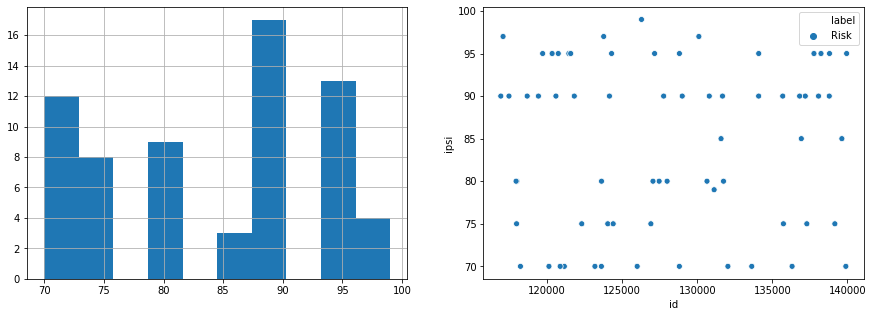

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cluster["ipsi"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="ipsi", hue="label", data=cluster)

At first, the lack of an overwhelming mode or any real clustering supports the original statement of, "possibly ihd and ipsi". Actually, we see that all ipsi values range from 70 to 100, which might be a indicative of a classification boundary in the full data set: 

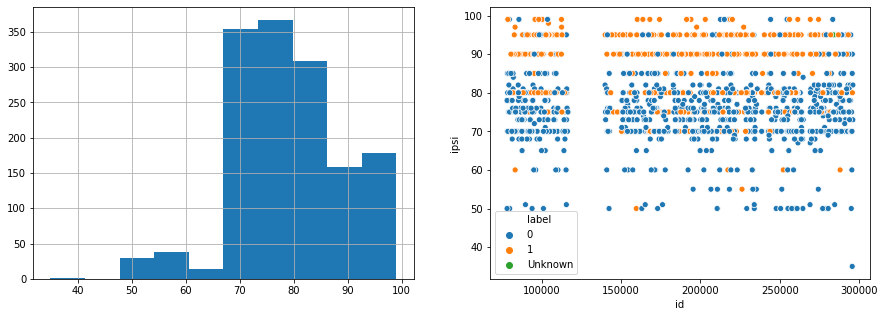

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["ipsi"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="ipsi", hue="label", data=df)

In the rest of the data, we see that most of the risk points are above 70 as in the risk-cluster, but the whole distribution is a little wider, with potential outliers below ~70.

This might suggest a poorly representative data set or that ipsi becomes a more telling feature at higher values - i.e. there a greater chance a person is at risk  over 90%, but at 80% it's hard to say.

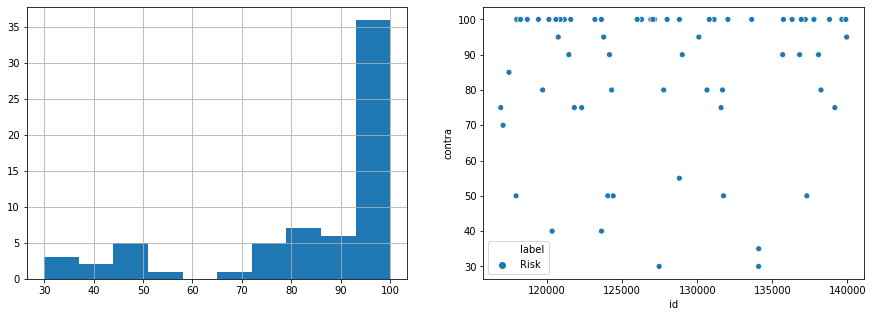

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cluster["contra"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="contra", hue="label", data=cluster)

Unlike ipsi, contra exhibits a sharper skew towards  the upper range, indicating that contra is quite a significant indicator of risk in the cluster.

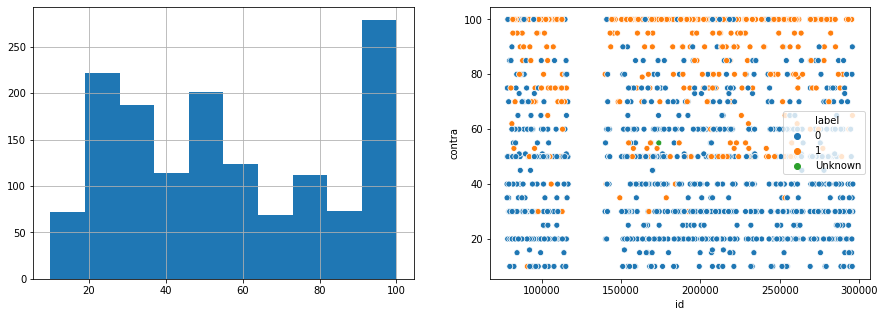

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["contra"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="contra", hue="label", data=df)

Whilst there is a clear correlation towards higher contra values indicating a grater risk, it's only at the extremes wehre there is a very clear separation.

In [45]:
## Some notes for data cleaning and modeling.
actions.append("Include ihd, hypertension, contra, ipsi, and arrhythmia in models")
actions.append("Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia")

<a href="#contents">[back to top]</a>

<a id="123"></a>
<h4>1.2.3. Data Distribution</h4>
Plot data distribution for each feature to gain insight into the class balance, outliers and any other patterns.

In [46]:
def PlotClassAndClassificationDistribution(dataframe,col,xCol, categoric=False):
    for df in [dataframe, dataframe[dataframe["label"] == "Risk"], dataframe[dataframe["label"] == "NoRisk"]]:
        ## Create histogram on left to show distribution of values for this feature 'col'.
        plt.figure(figsize=(15,3))
        plt.subplot(1, 2, 1, title=col.upper() + " Value Distributon")
        df[col].hist()


        ## Create a scatter plot where yaxis = 'col' feature and xaxis = xCol (random or id to spread data points).
        plt.subplot(1, 2, 2, title="Classification Distributon for " + col.upper())
        ## If plotting againts id, highlight risk-cluster
        if (xCol == "id"):
            plt.axvline(x=116720, color="red")
            plt.axvline(x=139960, color="red")
        sns.scatterplot(x=xCol, y=col, hue="label", data=df) ## hue == label so that class distribution within a feature is visible.

        plt.show()
    
        ## If includDescription == true, use df.describe() to calculate stats on each feature category.
        if (categoric):
            ## Print data description statistics.
            categories = df[col].unique() 
            for category in categories:
                cat = cleanedDf[cleanedDf[col] == category]
                description = cat["label"].describe()
                try:
                    percent =  round((100/description["count"]) * description["freq"],2)
                    if (np.isnan(percent)):
                        print("Skipped nans...")
                        continue

                    print("Category: " + str(category))
                    print(description)
                    print("% of most frequent: " + str(percent) + "\n")
                except:
                    pass ## Div by 0 (nan)
        else:
            if col != "id" and col != "random":
                print(df[[col, "label"]].describe()) ## Not categoric, so just describe whole series, not each unique value ('category') as above.

**Indication Distribution**

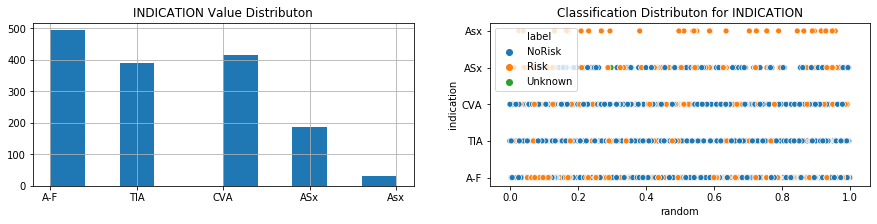

       indication   label
count        1517    1517
unique          5       3
top           A-F  NoRisk
freq          493    1008


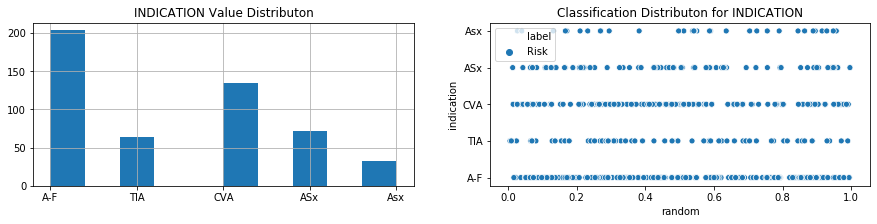

       indication label
count         505   507
unique          5     1
top           A-F  Risk
freq          203   507


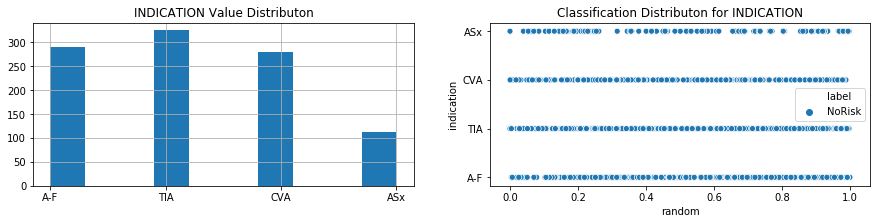

       indication   label
count        1007    1008
unique          4       1
top           TIA  NoRisk
freq          325    1008


In [47]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "indication", "random")

The distribution of ASx vs Asx has been explored already, with a decided action to merge the 2 classes to begin with.


I also noticed here that the x axis could be id (for the purpose of spreading the data points) and modified the PlotClassAndClassificationDistribution() method to accept another parameter, "xCol".

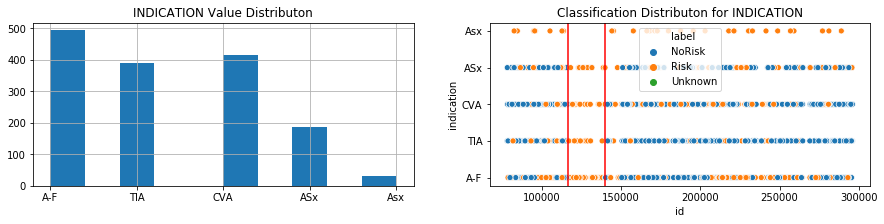

       indication   label
count        1517    1517
unique          5       3
top           A-F  NoRisk
freq          493    1008


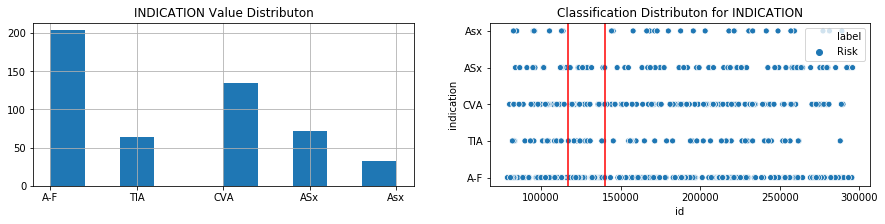

       indication label
count         505   507
unique          5     1
top           A-F  Risk
freq          203   507


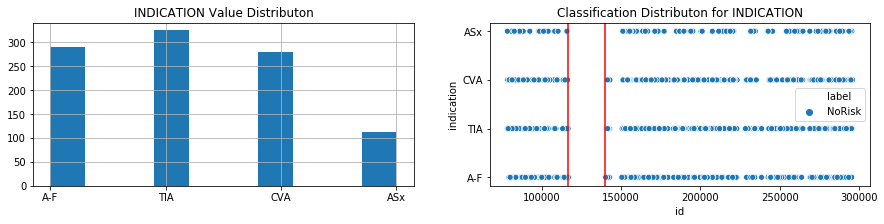

       indication   label
count        1007    1008
unique          4       1
top           TIA  NoRisk
freq          325    1008


In [48]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "indication", "id")

Switching the x axis to id from random has quite an important effect in seemingly grouping clusters of classifications. Referring back to the data dictionary, it said that the random attribute was used for sorting, but looking at this scatterplot above it may be the case that id is used to sort.

Interestingly, the grouping is also indicative of ids distribution, where its troughs line up to Risk clusters in the scatter:

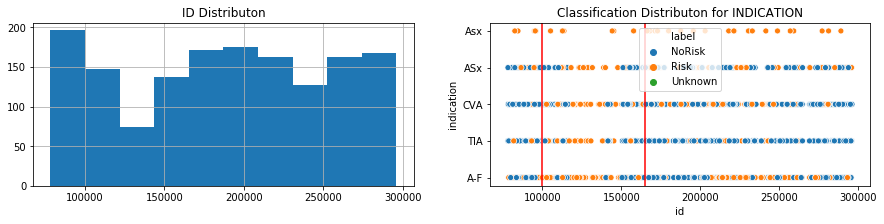

In [49]:
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1, title="ID Distributon")
df["id"].hist()

plt.subplot(1, 2, 2, title="Classification Distributon for INDICATION")
plt.axvline(x=100000, color="red")
plt.axvline(x=165000, color="red")
sns.scatterplot(x="id", y="indication", hue="label", data=df)

plt.show()

Besides helping with visualisation, we still don't know enough about the id columns true meaning. One thing we can be fairly sure of is that it would still be a bad feature to include in any models, as it isn't "standard" feature; i.e. the process for assigning ids will be unique compared to determining if someone is diabetic or not. Therefore, while the model might acheive great results using some combination of ID, it'd most likely fail given future, real world data. 

Back to looking at indication; inspect with ASx/Asx combined as well as per previous discussion:

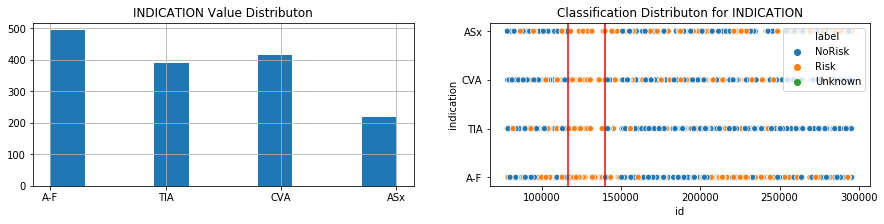

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


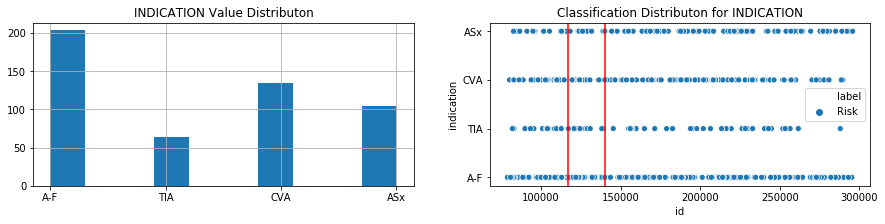

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


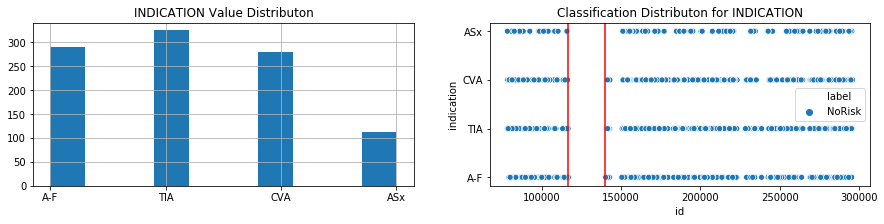

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


In [50]:
cleanedDf = rawData.copy()
cleanedDf = cleanedDf.replace(["Asx"], ["ASx"]) ## Change Asx to ASx so there is a single asx class.
PlotClassAndClassificationDistribution(cleanedDf, "indication", "id", True)

This visualisation suggests that id is more significant in classifying the Risk status than the indication itself. 

The description indicates that **TIA possibly reduces the chance a person is classified as being at risk**. This is similar for CVA too, although not as pronounced, whilst ASx and A-F appear to have little effect either way.

In [51]:
## Some notes for data cleaning and modeling.
actions.append("Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.")

**Diabetes Distribution**

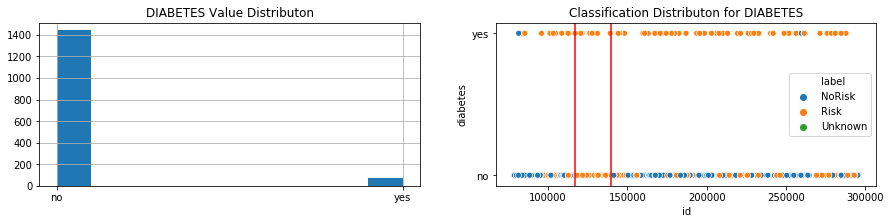

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


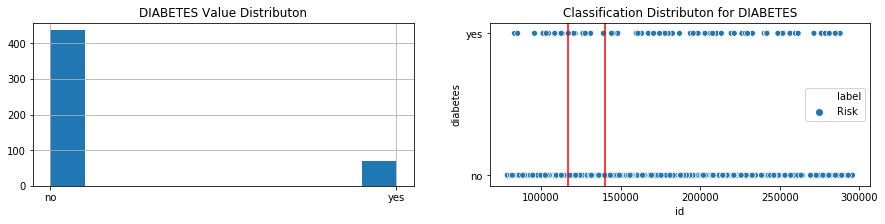

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


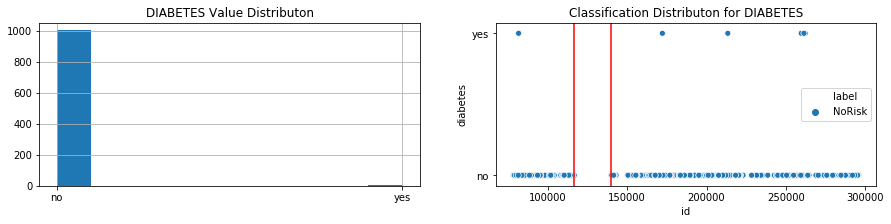

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


In [52]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "diabetes", "id", True)

In [53]:
tempDf = df.copy()
nDiabAndRisk = tempDf[tempDf["diabetes"] == "yes"]
nDiabAndRisk = len(nDiabAndRisk[nDiabAndRisk["label"] == "Risk"])

nNotDiabAndRisk = tempDf[tempDf["diabetes"] == "no"]
nNotDiabAndRisk = len(nNotDiabAndRisk[nNotDiabAndRisk["label"] == "Risk"])

print("Diabetes & Risk: " + str(nDiabAndRisk))
print("NoDiabetes & Risk: " + str(nNotDiabAndRisk))

Diabetes & Risk: 70
NoDiabetes & Risk: 436


Although the majority of diabetes sufferers are classified as being at risk (92.11%), diabetics are very poorly represented within the dataset, to the extent that non-diabetics have more patients classified as at risk. If better represented (more equally distributed between diabetes yes/no), diabetes might be a good indicator of risk. This claim can be supported with the following code.

To measure the effect of the imbalance, the following code takes a sample half the size of the number of "yes" cases for diabetes and records the lowest and highest percentages of the mode class.

In [54]:
nIterations = 1000
noLowest = 100
noHighest = 0
lastTop = ""

dfTemp = rawData.copy()
arrNoDf = dfTemp[dfTemp["diabetes"] == "no"]
sampleSize = int(len(dfTemp[dfTemp["diabetes"] == "yes"]) / 2)

for i in range(nIterations):
    arrNo = arrNoDf.sample(sampleSize, random_state=i) ## Set random state for consistent results
    arrNoDesc = arrNo["label"].describe()
    top = arrNoDesc["top"]
    if (top != lastTop):
        lastTop = top
        if (i != 0):
            print("Mode class changed at iteration " + str(i) + ": " + lastTop)
    noPerc = (100/sampleSize) * len(arrNo[arrNo["label"] == arrNoDesc["top"]])
    
    if (noPerc < noLowest):
        noLowest = noPerc
    if (noPerc > noHighest):
        noHighest = noPerc
    
print("After " + str(nIterations) + " iterations:\n")
print(arrNo["label"].describe())
print(str(round(noPerc,2)))
print("Lowest: " + str(noLowest))
print("Highest: " + str(noHighest))

Mode class changed at iteration 41: Risk
Mode class changed at iteration 42: NoRisk
Mode class changed at iteration 589: Risk
Mode class changed at iteration 590: NoRisk
After 1000 iterations:

count         38
unique         2
top       NoRisk
freq          29
Name: label, dtype: object
76.32
Lowest: 50.0
Highest: 94.73684210526316


**With such an imbalance it's better to omit this feature**. Theres almost a 20% change between the distribrution of the full dataset and the lowest percentage in a sample size and the range between the highest and lowest is over 45.

In [55]:
## Some notes for data cleaning and modeling.
actions.append("Drop diabetes column; the dataset is too imbalanced towards non-diabetics.")

**IHD Distribution**

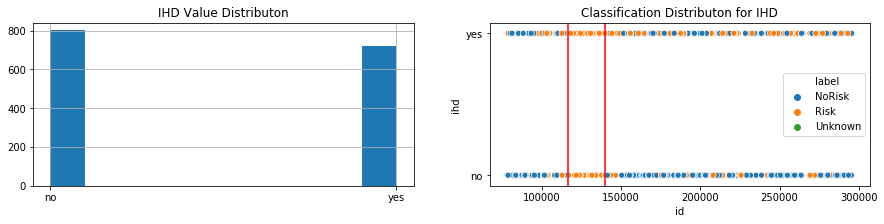

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97



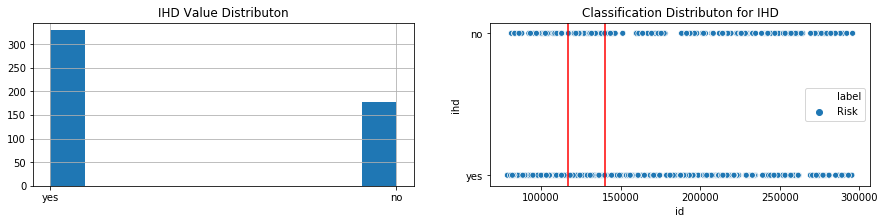

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62



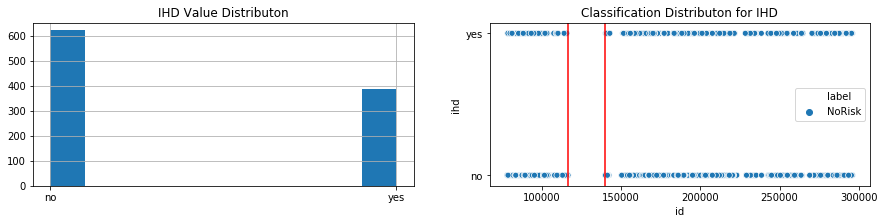

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97



In [56]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "ihd", "id", True)

These plots and stats demonstrate that there is a relative increase in risk when the ihd feature is equal to 'yes', when compared to it being 'no'. However, it's almost a 50:50 split even then. This mirrors the earlier exploration of ihd **combined** with hypertension but meaning little by itself. It's possible that ihd, is a secondary symptom.

**Hypertension Distribution**

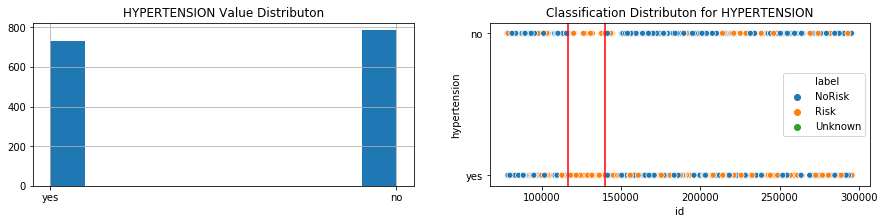

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


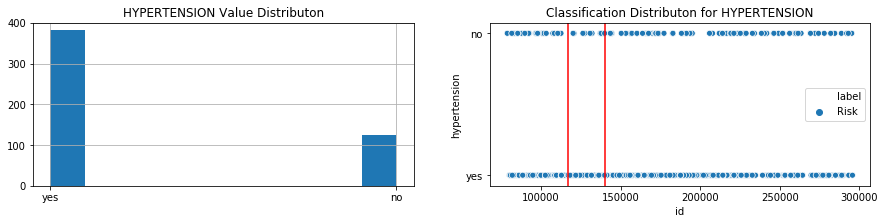

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


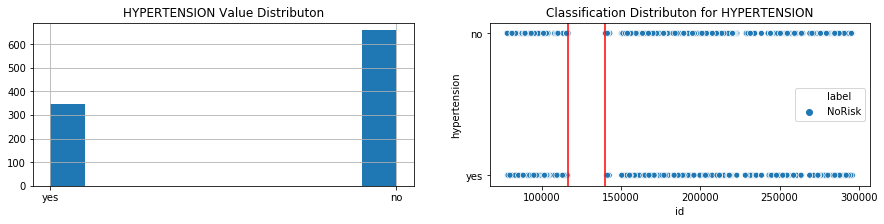

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


In [57]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "hypertension", "id", True)

The take-away here is very similar to that of the ihd feature and supports the earlier combinations of hypertension and ihd.

**Arrhythmia Distribution**

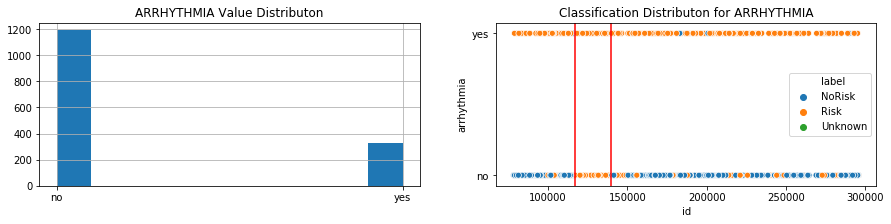

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



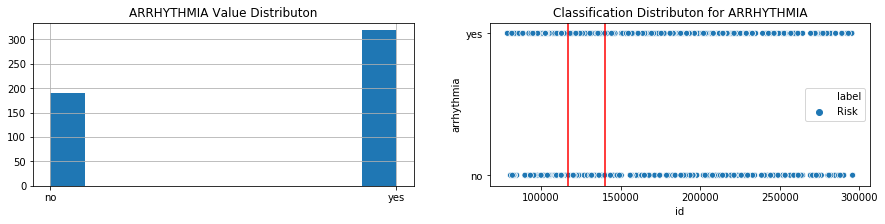

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



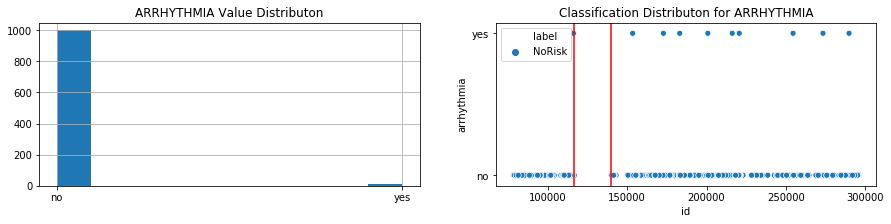

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



In [58]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "arrhythmia", "id", True)

The data above shows that there's a 16% chance a patient is at risk when they don't have arrhythmia, and a 96% chance they are at risk if they do. Although not as severe as diabetes, there is still a significant class imbalance here.

To measure the effect of the imbalance, the following code takes a sample half the size of the number of "yes" cases for arrhythmia and records the lowest and highest percentages of the mode class. This is of course random and introduces some uncertainty, but  if the variation isn't too significant, it may be worth keeping arrhythmia as a feature.

In [59]:
nIterations = 1000
noLowest = 100
noHighest = 0
lastTop = ""

dfTemp = rawData.copy()
arrNoDf = dfTemp[dfTemp["arrhythmia"] == "no"]
sampleSize = int(len(dfTemp[dfTemp["arrhythmia"] == "yes"]) / 2)

for i in range(nIterations):
    arrNo = arrNoDf.sample(sampleSize, random_state=i) ## Set random state for consistent results
    arrNoDesc = arrNo["label"].describe()
    top = arrNoDesc["top"]
    if (top != lastTop):
        lastTop = top
        if (i != 0):
            print("Mode class changed at iteration " + str(i) + ": " + lastTop)
    noPerc = (100/sampleSize) * len(arrNo[arrNo["label"] == arrNoDesc["top"]])
    
    if (noPerc < noLowest):
        noLowest = noPerc
    if (noPerc > noHighest):
        noHighest = noPerc
    
print("After " + str(nIterations) + " iterations:\n")
print(arrNo["label"].describe())
print(str(round(noPerc,2)))
print("Lowest: " + str(noLowest))
print("Highest: " + str(noHighest))

After 1000 iterations:

count        164
unique         3
top       NoRisk
freq         138
Name: label, dtype: object
83.64
Lowest: 76.36363636363636
Highest: 92.12121212121212


This is still a good class separation without variation too drastic, so we can try keeping arrhythmia with *some* confidence.

In [60]:
## Some notes for data cleaning and modeling.
actions.append("Arrhythmia is quite imbalanced but seems to be fairly reliable still.")

**History Distribution**

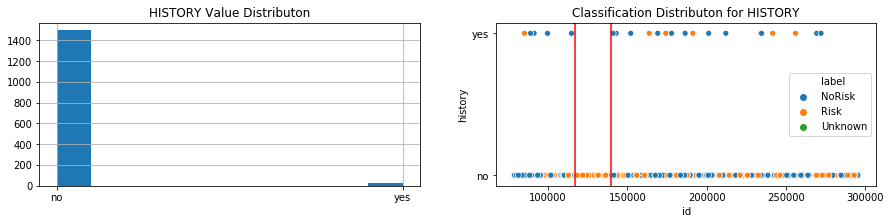

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


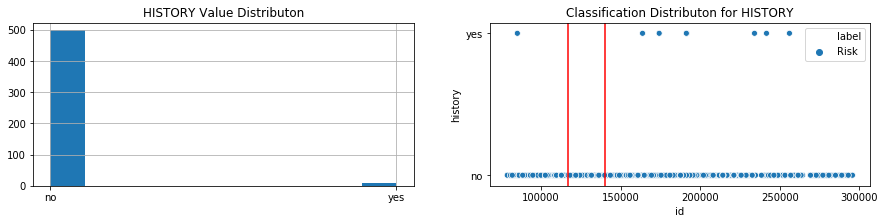

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


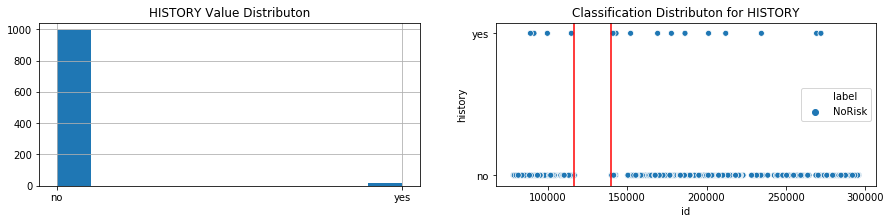

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


In [61]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "history", "id", True)

The class imbalance is enourmous here and the class split is very weak, so history will not be used.

In [62]:
actions.append("Drop history - the class imbalance and seperation is very poor.")

**Ipsi Distribution**

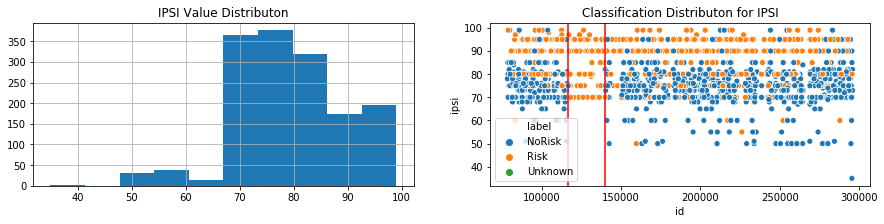

              ipsi
count  1516.000000
mean     78.872032
std      10.162351
min      35.000000
25%      73.000000
50%      77.000000
75%      85.000000
max      99.000000


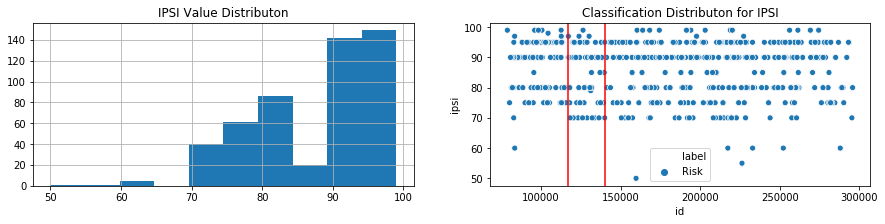

             ipsi
count  505.000000
mean    85.932673
std      9.209177
min     50.000000
25%     80.000000
50%     90.000000
75%     95.000000
max     99.000000


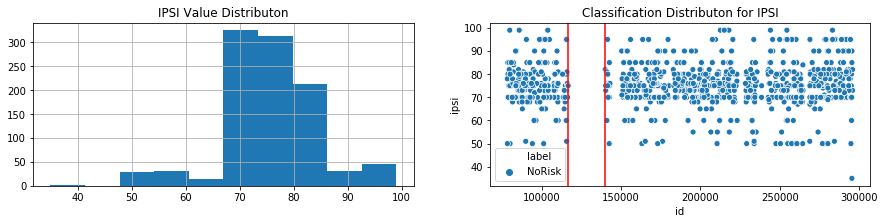

              ipsi
count  1006.000000
mean     75.311133
std       8.656612
min      35.000000
25%      70.000000
50%      75.000000
75%      80.000000
max      99.000000


In [63]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "ipsi", "id", False)

Here we see a potential, negative effect of *not* removing the id cluster that was discovered earlier. Where there is otherwise a good class seperation between lower and higher ipsi values, there is a distinct vertical column of patients at risk with disregard for this pattern.

In [64]:
actions.append("the right skey in ipsi distribution causes some concern as there are obivously data points in the lower regions - these may not be a real world representation and we can't check")

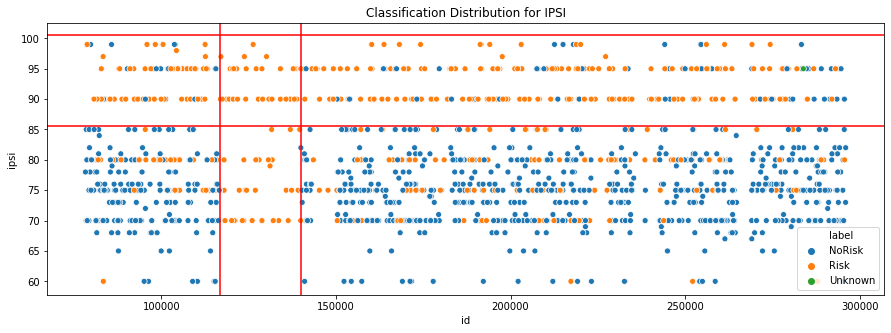

In [65]:
tempDf = rawData.copy()
ipsiFocus = tempDf[tempDf["ipsi"] > 55]
plt.figure(figsize=(15,5))
plt.axhline(y=85.5, color="red")
plt.axhline(y=100.5, color="red")
plt.axvline(x=116720, color="red")
plt.axvline(x=139960, color="red")
plt.title("Classification Distribution for IPSI")
sns.scatterplot(x="id", y="ipsi", hue="label", data=ipsiFocus)

By setting some boundaries for "low" and "high" ipsi, we can look at the percentage of risk and norisk classifications in each group.

We can also evaluate the effect that this id-risk cluster has.

In [66]:
# ////// REMOVE THE ID RISK CLUSTER
cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
droppedClusters = rawData.copy()
droppedClusters = droppedClusters.drop(indexes)
# //////

i = 0
for idf in [df, droppedClusters]:
    if (i == 0):
        title = " RAW:"
    else:
        title = " WITH RISK CLUSTER REMOVED:"
    i+=1
        
    print("HIGH IPSI" + title)
    highIpsi = idf[idf["ipsi"] > 85]
    description = highIpsi["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)


    print("LOW IPSI" + title)
    lowIpsi = idf[idf["ipsi"] <= 85]
    description = lowIpsi["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)

HIGH IPSI RAW:
count      370
unique       3
top       Risk
freq       291
Name: label, dtype: object
% of most frequent: 78.65

LOW IPSI RAW:
count       1143
unique         3
top       NoRisk
freq         928
Name: label, dtype: object
% of most frequent: 81.19

HIGH IPSI WITH RISK CLUSTER REMOVED:
count      336
unique       3
top       Risk
freq       257
Name: label, dtype: object
% of most frequent: 76.49

LOW IPSI WITH RISK CLUSTER REMOVED:
count       1111
unique         3
top       NoRisk
freq         928
Name: label, dtype: object
% of most frequent: 83.53



Interestingly, the effect of removing the risk cluster is almost negligable. It understandably reduces the accuracy (of predicting "Risk" if ipsi is high) in the "high" group since it removes some supporting data points, and likewise improves the accuracy of the lower group since it was falsely  inserting "risk" data points before. It may still be okay to keep those data points.

In [67]:
actions.append("MAYBE include ipsi")
actions.append("Test model with and without the 'Risk cluster' - effect seems negligable in distribution but models may suffer in practice.")

As numeric feature, we should also look at the outliers in ipse, which are apparent in the histogram. The effect of these 
can be visualised with a box and whisker plot:

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: ipsi, dtype: float64

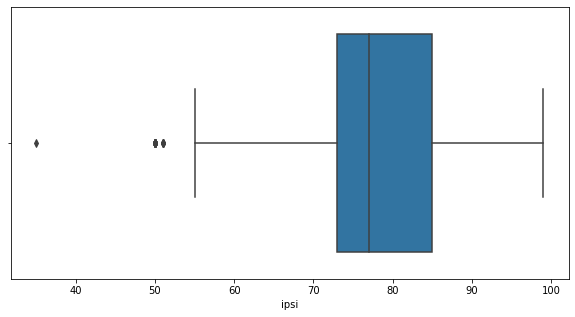

In [68]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
ipsi = tempDf["ipsi"]
sns.boxplot(ipsi) ## Plot the default data.
ipsi.describe()

count    1476.000000
mean       79.629404
std         9.166937
min        60.000000
25%        73.000000
50%        78.000000
75%        90.000000
max        99.000000
Name: ipsi, dtype: float64

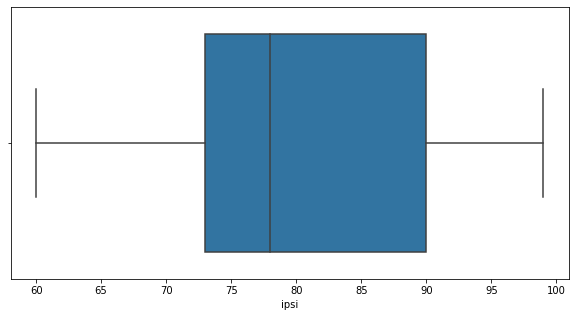

In [69]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
ipsiNoOutliers = tempDf["ipsi"][tempDf["ipsi"] > 55]
sns.boxplot(ipsiNoOutliers) ## Plot the default data.
ipsiNoOutliers.describe()

Removing the outliers has very little effect at all, with the biggest change being the 75% quartile changing by 5. Since it doesn't affect the mean, I don't think those outliers are causing any harm even if imputing. However, we can also have a look at the actual records:

In [70]:
tempDf = rawData.copy()
outliers = tempDf[tempDf["ipsi"] < 55]
print("Outlier Count: " + str(len(outliers)))
outliers

Outlier Count: 31


random      id indication diabetes  ihd hypertension arrhythmia  \
26    0.616346  142470        CVA       no   no          yes         no   
99    0.897747  255097        A-F       no   no          yes         no   
140   0.084495  233884        CVA       no   no          yes         no   
171   0.787587  279010        CVA       no   no          yes         no   
302   0.080884  159615        TIA      yes   no          yes         no   
328   0.208271  210672        TIA       no   no           no         no   
351   0.797398  294939        CVA       no   no           no         no   
392   0.673854  276966        CVA       no   no           no         no   
400   0.868120  295540        TIA       no   no           no         no   
418   0.396298  259748        CVA       no   no           no         no   
595   0.201062   89850        TIA       no   no           no         no   
629   0.106517  101168        CVA       no   no           no         no   
697   0.651395  233870        TIA       no   no           no         no   
806   0.100216  210510        TIA       no   no           no         no   
831   0.559183  176121        TIA       no   no           no         no   
913   0.535813  264502        CVA       no  yes           no         no   
925   0.739679  173059        CVA       no   no          yes         no   
949   0.391715   79960        A-F       no   no          yes         no   
999   0.692722  257504        CVA       no   no           no         no   
1053  0.227965  260857        A-F       no   no          yes         no   
1062  0.063159  163118        TIA       no   no           no         no   
1082  0.248147   78261        TIA       no   no           no         no   
1203  0.798831  284517        TIA       no   no           no         no   
1222  0.253980  115594        TIA       no   no           no         no   
1277  0.938827  247662        TIA       no   no           no         no   
1286  0.070401  280444        A-F       no   no          yes         no   
1305  0.379142  229156        CVA       no   no          yes         no   
1333  0.456056  268993        ASx       no   no          yes         no   
1377  0.886277  165246        ASx       no   no          yes         no   
1471  0.336300   94033        A-F       no   no          yes         no   
1500  0.651685  250503        TIA       no   no           no         no   

     history  ipsi contra   label  
26        no  50.0    40   NoRisk  
99        no  50.0    30   NoRisk  
140       no  50.0    40   NoRisk  
171       no  50.0    40   NoRisk  
302       no  50.0    100    Risk  
328       no  50.0    40   NoRisk  
351       no  50.0    50   NoRisk  
392       no  50.0    50   NoRisk  
400       no  35.0    35   NoRisk  
418       no  50.0    50   NoRisk  
595       no  51.0    51   NoRisk  
629       no  50.0    50   NoRisk  
697       no  51.0    51   NoRisk  
806       no  50.0    90   NoRisk  
831       no  51.0    51   NoRisk  
913       no  50.0    30   NoRisk  
925       no  50.0    40   NoRisk  
949       no  50.0    30   NoRisk  
999       no  50.0    50   NoRisk  
1053      no  50.0    30   NoRisk  
1062      no  50.0    40   NoRisk  
1082      no  50.0    40   NoRisk  
1203      no  51.0    51   NoRisk  
1222      no  51.0    51   NoRisk  
1277      no  50.0    40   NoRisk  
1286      no  50.0    30   NoRisk  
1305      no  50.0    40   NoRisk  
1333      no  51.0   100   NoRisk  
1377      no  51.0   100   NoRisk  
1471      no  50.0    30   NoRisk  
1500      no  50.0    40   NoRisk

What is interesting her is the fact that there is an individual record classified as "risk". This could possibly be mislabeled and should be noted.

Also, previous suggestions that TIA and CVA indicate a reduced risk are supported witht he majority of indications being 1 of the 2. Similarly, Lots of "no" values in the ihd and arrhythmia columns supports the idea that they are big risk indicators, although it's surprising to see that hypertension is a relatively even split.

In [71]:
actions.append("risk cluster supports the idea that CVA and TIA reduce risk - indication may be worth keeping; perhaps it could be transformed to binary: cva/tia and !cva/tia")
actions.append("potential mislabel at index 302")

**Contra Distribution**

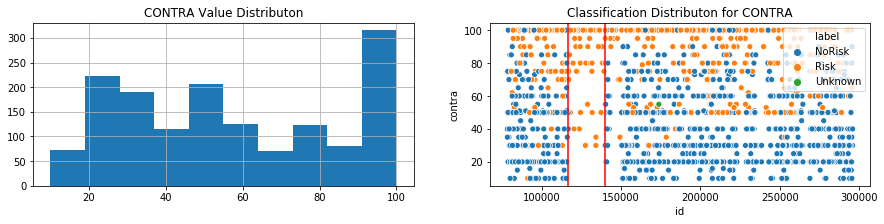

            contra
count  1519.000000
mean     56.828176
std      29.535671
min      10.000000
25%      30.000000
50%      50.000000
75%      85.000000
max     100.000000


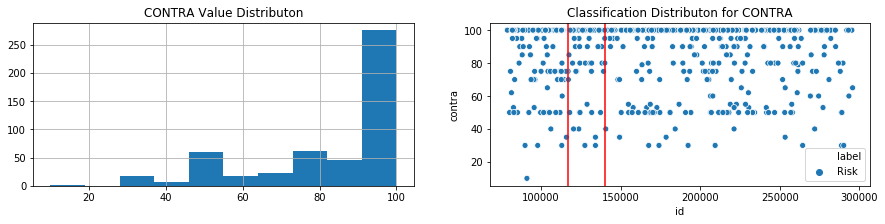

           contra
count  507.000000
mean    83.996055
std     20.880518
min     10.000000
25%     75.000000
50%     95.000000
75%    100.000000
max    100.000000


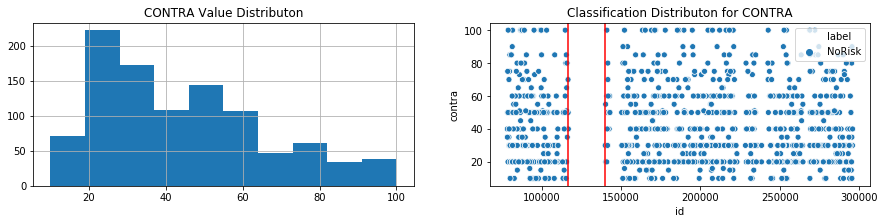

            contra
count  1007.000000
mean     43.109235
std      23.120137
min      10.000000
25%      20.000000
50%      40.000000
75%      60.000000
max     100.000000


In [72]:
df = rawData.copy()

## Convert contra strings to numeric.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))
# df = df.replace("nan", np.nan)
# df = df.dropna() 

PlotClassAndClassificationDistribution(df, "contra", "id", False)

Both plots show the skewed distribution which favours higher contra values, but the seperation is less distinct than in ipsi, for example. 

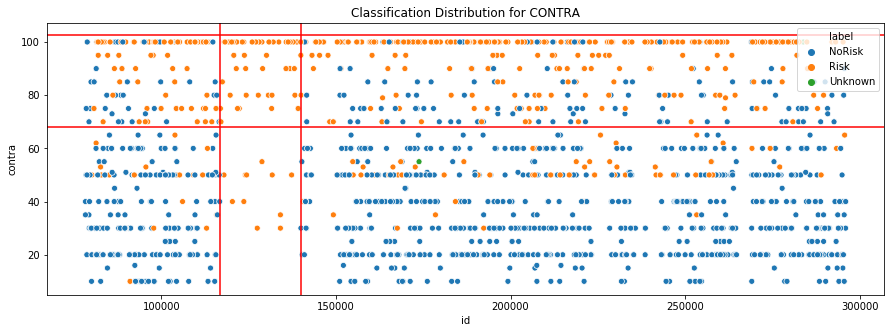

In [73]:
plt.figure(figsize=(15,5))
plt.axhline(y=68, color="red")
plt.axhline(y=102.5, color="red")

plt.axvline(x=116720, color="red") # Id-risk cluster
plt.axvline(x=139960, color="red") # Id-risk cluster
plt.title("Classification Distribution for CONTRA")
sns.scatterplot(x="id", y="contra", hue="label", data=df)

In contra, the classification distribution is quite  abit more sparse. Arguably, there are several weaker clusters, with the very highest contra values being the highest risk, anything between 68 and 95 being medium risk etc.

There also appears to be an anonomalous risk classification in the bottom row of data points, which I'm hoping has the same index as the outlier in ipsi.

In [74]:
tempDf = df.copy()
tempDf = tempDf[tempDf["contra"] < 20]
tempDf = tempDf[tempDf["label"] == "Risk"]
tempDf

random     id indication diabetes  ihd hypertension arrhythmia history  \
633  0.587207  91034        ASx       no  yes          yes         no      no   

     ipsi  contra label  
633  95.0    10.0  Risk

In [75]:
actions.append("Based on contra value, index 633 may be mislabelled or have an incorrect value; contra == 10 so it could be 100 if human error")
actions.append("consider a model for clustering or finding the best class boundaries in contra and ipsi- there may be multiple clusters")

By setting some boundaries for "low" and "high" contra, we can look at the percentage of risk and norisk classifications in each group.

We can also evaluate the effect that this id-risk cluster has.

In [76]:
# ////// REMOVE THE ID RISK CLUSTER
cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
droppedClusters = rawData.copy()
droppedClusters = droppedClusters.drop(indexes)
droppedClusters['contra'] = droppedClusters['contra'].replace(r'^\s*$', np.nan, regex=True)
droppedClusters['contra'] = droppedClusters['contra'].apply(lambda x: float(x))
# //////


i = 0
for idf in [df, droppedClusters]:
    if (i == 0):
        title = " RAW:"
    else:
        title = " WITH RISK CLUSTER REMOVED:"
    i+=1
        
    print("HIGH CONTRA" + title)
    highContra = idf[idf["contra"] > 85]
    description = highContra["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)


    print("LOW CONTRA" + title)
    lowContra = idf[idf["contra"] <= 85]
    description = lowContra["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)

HIGH CONTRA RAW:
count      360
unique       3
top       Risk
freq       310
Name: label, dtype: object
% of most frequent: 86.11

LOW CONTRA RAW:
count       1156
unique         3
top       NoRisk
freq         958
Name: label, dtype: object
% of most frequent: 82.87

HIGH CONTRA WITH RISK CLUSTER REMOVED:
count      318
unique       3
top       Risk
freq       268
Name: label, dtype: object
% of most frequent: 84.28

LOW CONTRA WITH RISK CLUSTER REMOVED:
count       1132
unique         3
top       NoRisk
freq         958
Name: label, dtype: object
% of most frequent: 84.63



Interestingly, the effect of removing the risk cluster is almost negligable. It understandably reduces the accuracy (of predicting "Risk" if contra is high) in the "high" group since it removes some supporting data points, and likewise improves the accuracy of the lower group since it was falsely  inserting "risk" data points before. It may still be okay to keep those data points.

As numeric feature, we should also look for outliers in contra:

count    1519.000000
mean       56.828176
std        29.535671
min        10.000000
25%        30.000000
50%        50.000000
75%        85.000000
max       100.000000
Name: contra, dtype: float64

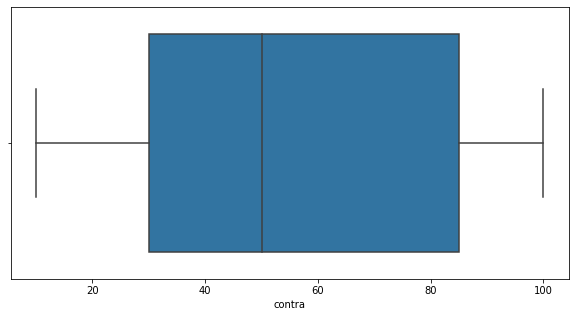

In [77]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
tempDf['contra'] = tempDf['contra'].replace(r'^\s*$', np.nan, regex=True)
tempDf['contra'] = tempDf['contra'].apply(lambda x: float(x))
contra = tempDf["contra"]
sns.boxplot(contra) ## Plot the default data.
contra.describe()

There aren't any obvious outliers in contra although the standard deviation is quite high, which is visually represented in the sparsity of points as well. Contra may not be so valuable in the larger dataset.

# CLEANED DISTRIBUTION

In [78]:
for action in actions:
    print (action + "\n")

cleanData = cleanData.dropna() ## Drop nan values.

cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.

cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.

cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.

cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.

cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.

cleanData = cleanData.dropna() ## Remove additional nan.

cleanData = cleanData.drop(columns=['id']) ## Drop id column.

Include ihd, hypertension, contra, ipsi, and arrhythmia in models

Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia

Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.

Drop diabetes column; the dataset is too imbalanced towards non-diabetics.

Arrhythmia is quite imbalanced but seems to be fairly reliable 

In [79]:
# df = rawData.copy()
# tempCleaned = rawData.copy()

# tempCleaned = tempCleaned.drop([493,889,1043,1243,452,475,523])
# tempCleaned = tempCleaned.drop(columns=["random", "id"])
# tempCleaned["indication"] = tempCleaned["indication"].apply(lambda x: str(x).lower())
# tempCleaned["contra"] = tempCleaned["contra"].replace(r'^\s*$', np.nan, regex=True)
# tempCleaned = tempCleaned.replace("nan", np.nan)
# tempCleaned = tempCleaned.dropna()
# tempCleaned["contra"] = tempCleaned["contra"].apply(lambda x: int(x))

# tempCleaned

and?

<a href="#contents">[back to top]</a>

<a id="13"></a>
<h3>1.3. Data Preparation</h3>

<a href="#contents">[back to top]</a>

<a id="131"></a>
<h4>1.3.0. Feature Selection</h4>
Remove definite columns and evaluate if missing or duplicates still exist.

Decide features to keep and then support with a random forest weightof().

In [287]:
model = rf(n_estimators=1000, max_depth=7)##, oob_score=True)##, verbose=2)
fittedModel = model.fit(xtr,ytr)
predicted = fittedModel.predict(xte)

importances = []
for feature in zip(xtr.columns.values, sorted(fittedModel.feature_importances_)):
    importances.append(feature)

importances

[('indication', 0.044804452081576226),
 ('ihd', 0.05160840647890531),
 ('hypertension', 0.10365523340291524),
 ('arrhythmia', 0.36039948548852285),
 ('contra', 0.4395324225480804)]

In [229]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
# sfm = SelectFromModel(fittedModel, threshold=0.15)
# feat_labels=xtr.columns.values
# # Train the selector
# sfm.fit(xtr, ytr)
# # Print the names of the most important features
# for feature_list_index in sfm.get_support(indices=True):
#     print(feat_labels[feature_list_index])

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


// cleanData = cleanData.dropna() ## Drop nan values.

// cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.

cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.

cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.

cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.

cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.

cleanData = cleanData.dropna() ## Remove additional nan.

cleanData = cleanData.drop(columns=['id']) ## Drop id column.

Include ihd, hypertension, contra, ipsi, and arrhythmia in models

Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia

Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.

Drop diabetes column; the dataset is too imbalanced towards non-diabetics.

Arrhythmia is quite imbalanced but seems to be fairly reliable still.

Drop history - the class imbalance and seperation is very poor.

the right skey in ipsi distribution causes some concern as there are obivously data points in the lower regions - these may not be a real world representation and we can't check

MAYBE include ipsi

Test model with and without the 'Risk cluster' - effect seems negligable in distribution but models may suffer in practice.

risk cluster supports the idea that CVA and TIA reduce risk - indication may be worth keeping; perhaps it could be transformed to binary: cva/tia and !cva/tia

potential mislabel at index 302

Based on contra value, index 633 may be mislabelled or have an incorrect value; contra == 10 so it could be 100 if human error

consider a model for clustering or finding the best class boundaries in contra and ipsi- there may be multiple clusters


<a id="131"></a>
<h4>1.3.1. Cleaning</h4>

In [337]:
cdf = rawData.copy()

In [338]:
cdf.iloc[302]

random          0.0808841
id                 159615
indication            TIA
diabetes              yes
ihd                    no
hypertension          yes
arrhythmia             no
history                no
ipsi                   50
contra                100
label                Risk
Name: 302, dtype: object

In [339]:
cdf.iloc[633]

random          0.587207
id                 91034
indication           ASx
diabetes              no
ihd                  yes
hypertension         yes
arrhythmia            no
history               no
ipsi                  95
contra                10
label               Risk
Name: 633, dtype: object

In [340]:
cdf["contra"].iloc[633] = '100'
cdf["contra"].iloc[633]

c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


'100'

In [341]:
# cdf = rawData.copy()
# cdf = cdf.drop(columns=["random", "id", "diabetes", "history", "ipsi"])
cdf = cdf.drop(columns=["random", "diabetes", "history", "ipsi"])

cdf['contra'] = cdf['contra'].replace(r'^\s*$', np.nan, regex=True)
cdf['contra'] = cdf['contra'].apply(lambda x: float(x))

unknowns = cdf[cdf["label"] == "Unknown"].index.values
cdf = cdf.drop(unknowns)

cdf = cdf.replace(["no", "yes", "NoRisk", "Risk"], [0,1,0,1])



## Could get_dummies instead.
cdf = cdf.replace(["A-F", "ASx", "Asx", "TIA", "CVA"], [1,1,1,0,0])

cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

cdfNoCluster = cdf.copy()
cdfNoCluster = cdfNoCluster.drop(indexes)

cdf

id  indication  ihd  hypertension  arrhythmia  contra  label
0     218242         1.0    0           1.0           0    20.0    0.0
1     159284         0.0    0           0.0           0    60.0    0.0
2     106066         1.0    1           1.0           0    40.0    1.0
3     229592         0.0    0           1.0           0    85.0    1.0
4     245829         0.0    0           0.0           0    20.0    0.0
...      ...         ...  ...           ...         ...     ...    ...
1515   93406         1.0    1           0.0           0    60.0    0.0
1516  121814         1.0    0           1.0           1    75.0    1.0
1517  101754         0.0    0           1.0           0    20.0    0.0
1518  263836         1.0    1           0.0           0    45.0    0.0
1519  254941         0.0    0           0.0           0    20.0    0.0

[1518 rows x 7 columns]

In [342]:
cdfNoCluster

id  indication  ihd  hypertension  arrhythmia  contra  label
0     218242         1.0    0           1.0           0    20.0    0.0
1     159284         0.0    0           0.0           0    60.0    0.0
2     106066         1.0    1           1.0           0    40.0    1.0
3     229592         0.0    0           1.0           0    85.0    1.0
4     245829         0.0    0           0.0           0    20.0    0.0
...      ...         ...  ...           ...         ...     ...    ...
1513  155942         0.0    1           1.0           0   100.0    1.0
1515   93406         1.0    1           0.0           0    60.0    0.0
1517  101754         0.0    0           1.0           0    20.0    0.0
1518  263836         1.0    1           0.0           0    45.0    0.0
1519  254941         0.0    0           0.0           0    20.0    0.0

[1452 rows x 7 columns]

In [343]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(cdf)

id  indication  ihd  hypertension  arrhythmia  contra  label
201   240232         0.0    0           NaN           1    90.0    1.0
442   261060         NaN    1           1.0           0    40.0    0.0
453   254469         1.0    0           1.0           0     NaN    0.0
590   289096         1.0    0           NaN           0    30.0    0.0
812   190671         0.0    1           1.0           0    50.0    NaN
822   205845         NaN    1           0.0           0   100.0    1.0
974   165432         0.0    1           1.0           1    70.0    NaN
983   158024         0.0    0           NaN           0    75.0    0.0
1007  256076         NaN    0           0.0           1   100.0    1.0
1418  169726         0.0    0           0.0           0    50.0    NaN

In [344]:
cdf = cdf.drop(nans(cdf).index.values)
cdf

id  indication  ihd  hypertension  arrhythmia  contra  label
0     218242         1.0    0           1.0           0    20.0    0.0
1     159284         0.0    0           0.0           0    60.0    0.0
2     106066         1.0    1           1.0           0    40.0    1.0
3     229592         0.0    0           1.0           0    85.0    1.0
4     245829         0.0    0           0.0           0    20.0    0.0
...      ...         ...  ...           ...         ...     ...    ...
1515   93406         1.0    1           0.0           0    60.0    0.0
1516  121814         1.0    0           1.0           1    75.0    1.0
1517  101754         0.0    0           1.0           0    20.0    0.0
1518  263836         1.0    1           0.0           0    45.0    0.0
1519  254941         0.0    0           0.0           0    20.0    0.0

[1508 rows x 7 columns]

In [345]:
nans(cdfNoCluster)

id  indication  ihd  hypertension  arrhythmia  contra  label
201   240232         0.0    0           NaN           1    90.0    1.0
442   261060         NaN    1           1.0           0    40.0    0.0
453   254469         1.0    0           1.0           0     NaN    0.0
590   289096         1.0    0           NaN           0    30.0    0.0
812   190671         0.0    1           1.0           0    50.0    NaN
822   205845         NaN    1           0.0           0   100.0    1.0
974   165432         0.0    1           1.0           1    70.0    NaN
983   158024         0.0    0           NaN           0    75.0    0.0
1007  256076         NaN    0           0.0           1   100.0    1.0
1418  169726         0.0    0           0.0           0    50.0    NaN

In [346]:
cdfNoCluster = cdfNoCluster.drop(nans(cdfNoCluster).index.values)
cdfNoCluster

id  indication  ihd  hypertension  arrhythmia  contra  label
0     218242         1.0    0           1.0           0    20.0    0.0
1     159284         0.0    0           0.0           0    60.0    0.0
2     106066         1.0    1           1.0           0    40.0    1.0
3     229592         0.0    0           1.0           0    85.0    1.0
4     245829         0.0    0           0.0           0    20.0    0.0
...      ...         ...  ...           ...         ...     ...    ...
1513  155942         0.0    1           1.0           0   100.0    1.0
1515   93406         1.0    1           0.0           0    60.0    0.0
1517  101754         0.0    0           1.0           0    20.0    0.0
1518  263836         1.0    1           0.0           0    45.0    0.0
1519  254941         0.0    0           0.0           0    20.0    0.0

[1442 rows x 7 columns]

<a href="#contents">[back to top]</a>

<a id="133"></a>
<h4>1.3.3. Stratification (TTS)</h4>

# KFOLD

In [380]:
kfold = rawData.copy()
kfold = kfold.drop(columns=["random", "diabetes", "history", "ipsi", "id"])

## Make contra numeri.
kfold['contra'] = kfold['contra'].replace(r'^\s*$', np.nan, regex=True)
kfold['contra'] = kfold['contra'].apply(lambda x: float(x))

## Drop unknown classifications.
unknowns = kfold[kfold["label"] == "Unknown"].index.values
kfold = kfold.drop(unknowns)

kfold = kfold.replace(["no", "yes", "NoRisk", "Risk"], [0,1,0,1])

## Make indication binary.
## Could get_dummies instead.
kfold = kfold.replace(["A-F", "ASx", "Asx", "TIA", "CVA"], [1,1,1,0,0])

kfold = kfold.drop(nans(kfold).index.values)
kfold = kfold.reindex()

## Split into x and y.
data = kfold.drop(columns=["label"])
labels = kfold["label"]

kf = StratifiedKFold(n_splits=10, shuffle=True)

## https://stackoverflow.com/questions/51852551/key-error-not-in-index-while-cross-validation
for train_index, test_index in kf.split(data,labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

TRAIN: [   0    1    2 ... 1505 1506 1507] TEST: [  16   37   41   42   57   58   75   83   84   92  106  110  115  117
  118  122  123  142  148  149  152  154  157  161  172  178  183  190
  205  218  232  233  237  246  250  260  275  294  299  302  314  320
  325  331  338  356  368  375  386  422  433  436  451  456  462  488
  507  510  519  521  529  530  555  556  561  569  593  599  601  605
  631  649  660  663  668  670  674  688  694  712  720  724  739  743
  751  764  770  771  795  807  812  817  821  827  834  854  860  866
  882  888  908  909  912  932  939  945  953  960  986  998 1005 1012
 1016 1032 1042 1044 1063 1079 1084 1085 1095 1100 1136 1140 1160 1164
 1165 1184 1205 1239 1242 1246 1266 1280 1285 1295 1310 1325 1330 1355
 1360 1366 1382 1410 1413 1417 1421 1437 1441 1447 1476]
TRAIN: [   0    1    2 ... 1505 1506 1507] TEST: [  12   43   48   52   63   65   85   99  103  104  119  121  126  133
  136  155  165  194  220  229  257  266  267  270  286  301  30

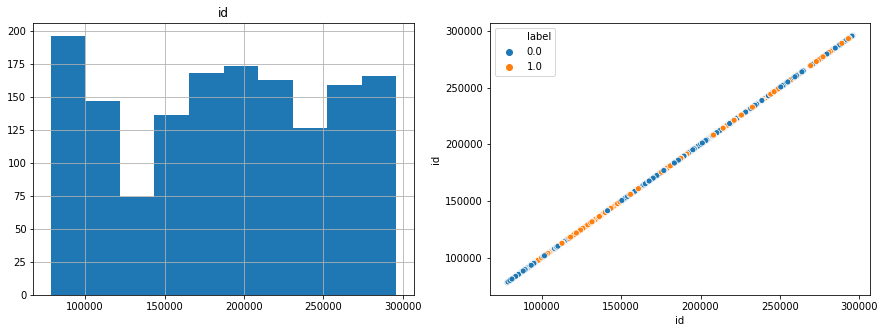

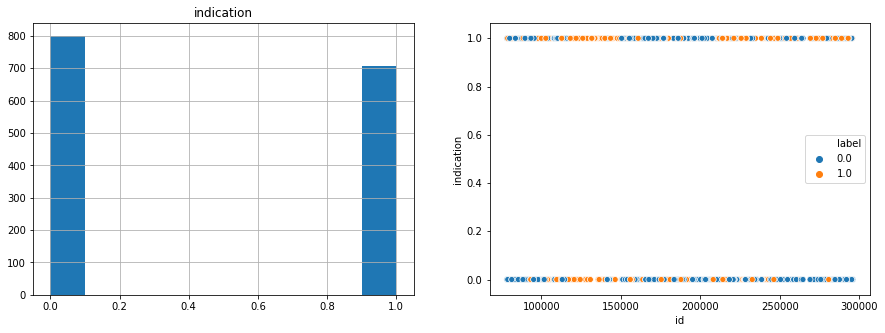

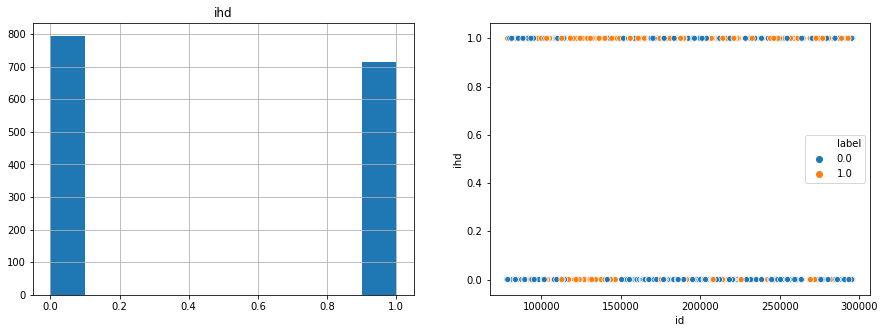

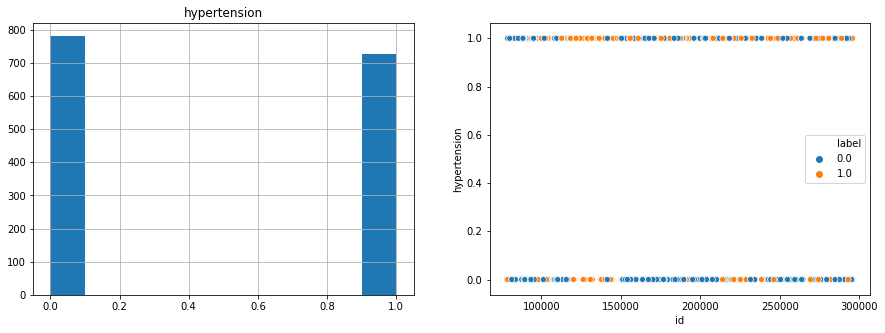

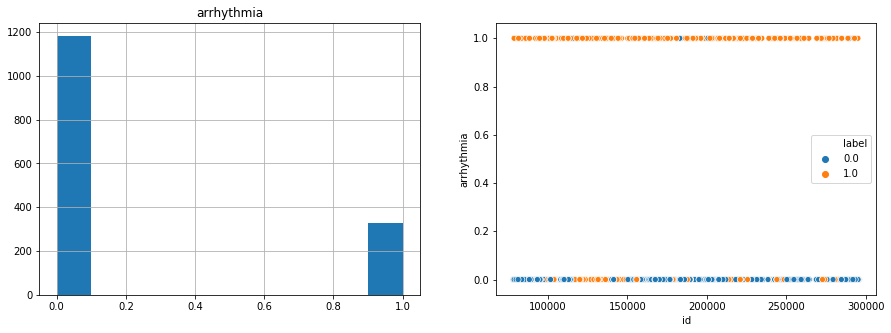

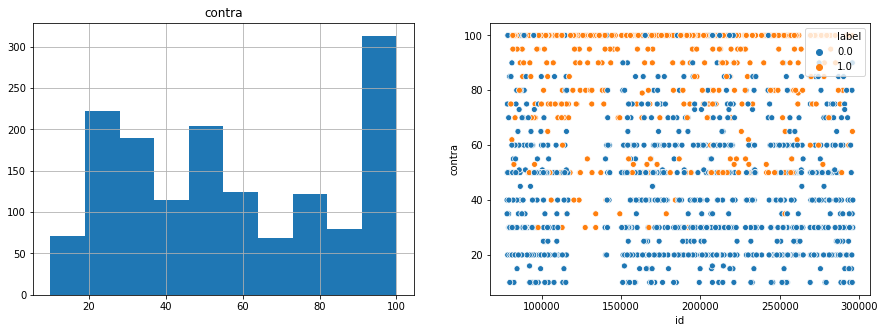

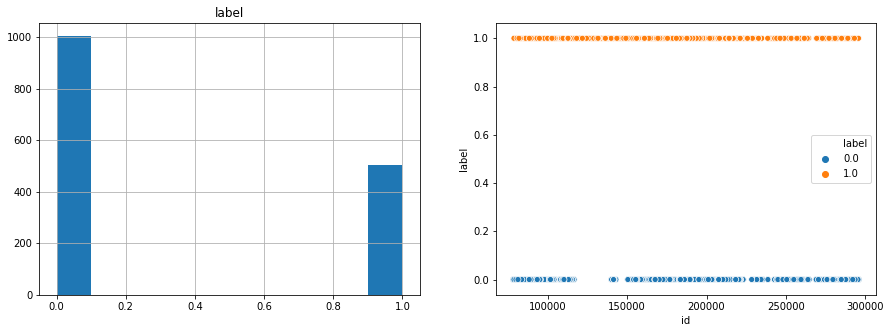

In [91]:
for col in cdf.columns.values:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    cdf[col].hist()
    plt.title(col)

    plt.subplot(1,2,2)
    sns.scatterplot(x="id", y=col, data=cdf, hue="label")
    
    plt.show()

In [347]:
data = cdf#.drop(columns=["label"]) ## Keep label in data for visualisations and remove once good split seed is found.
labels = cdf["label"]
xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)

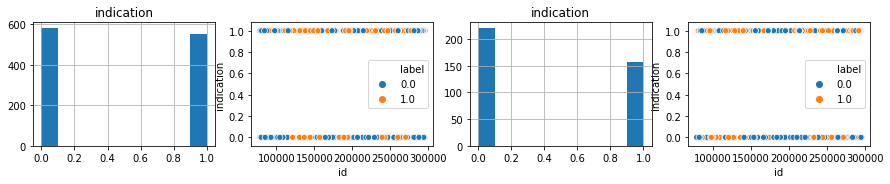

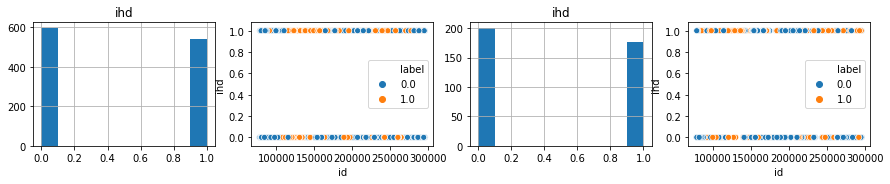

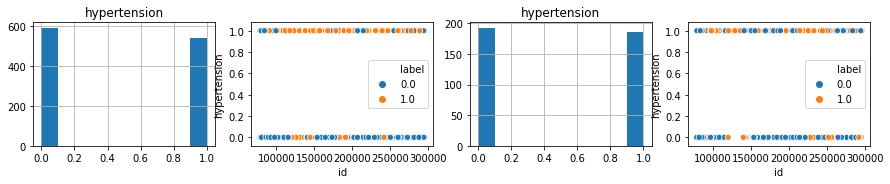

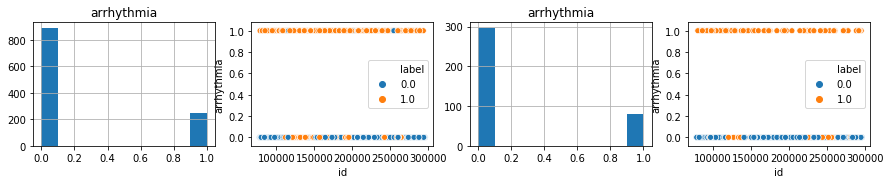

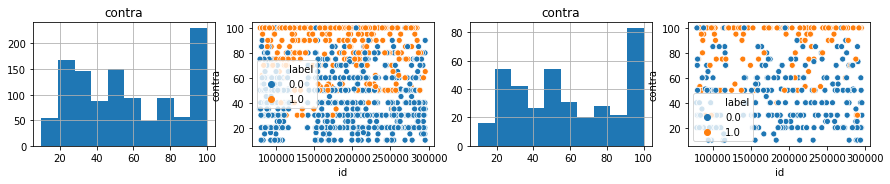

In [93]:
for col in xtr.columns.values:
    if col == "id" or col == "label":
        continue
        
    plt.figure(figsize=(15,5))

    ## Train split
    plt.subplot(2,4,1)
    xtr[col].hist()
    plt.title(col)

    plt.subplot(2,4,2)
    sns.scatterplot(x="id", y=col, data=xtr, hue="label")
    
    ## Test split
    plt.subplot(2,4,3)
    xte[col].hist()
    plt.title(col)

    plt.subplot(2,4,4)
    sns.scatterplot(x="id", y=col, data=xte, hue="label")
    
    plt.show()

In [94]:
cdf = cdf.drop(columns=["id"])
cdf

indication  ihd  hypertension  arrhythmia  contra  label
0            1.0    0           1.0           0    20.0    0.0
1            0.0    0           0.0           0    60.0    0.0
2            1.0    1           1.0           0    40.0    1.0
3            0.0    0           1.0           0    85.0    1.0
4            0.0    0           0.0           0    20.0    0.0
...          ...  ...           ...         ...     ...    ...
1515         1.0    1           0.0           0    60.0    0.0
1516         1.0    0           1.0           1    75.0    1.0
1517         0.0    0           1.0           0    20.0    0.0
1518         1.0    1           0.0           0    45.0    0.0
1519         0.0    0           0.0           0    20.0    0.0

[1508 rows x 6 columns]

In [95]:
cdfNoCluster = cdfNoCluster.drop(columns=["id"])
cdfNoCluster

indication  ihd  hypertension  arrhythmia  contra  label
0            1.0    0           1.0           0    20.0    0.0
1            0.0    0           0.0           0    60.0    0.0
2            1.0    1           1.0           0    40.0    1.0
3            0.0    0           1.0           0    85.0    1.0
4            0.0    0           0.0           0    20.0    0.0
...          ...  ...           ...         ...     ...    ...
1513         0.0    1           1.0           0   100.0    1.0
1515         1.0    1           0.0           0    60.0    0.0
1517         0.0    0           1.0           0    20.0    0.0
1518         1.0    1           0.0           0    45.0    0.0
1519         0.0    0           0.0           0    20.0    0.0

[1442 rows x 6 columns]

<a href="#contents">[back to top]</a>

<a id="14"></a>
<h3>1.4. Modeling</h3>

In [96]:
data = cdf.drop(columns=["label"])
labels = cdf["label"]

xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)

In [144]:
def CreateDecisionTree(xtr, ytr, xte, yte, maxDepth):
    model = DecisionTreeClassifier(max_depth=maxDepth) # Make a new model.
    fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
    predicted = fittedModel.predict(xte) ## Predict test split.

    ## Return trained model and confusion matrix of test data.
    return fittedModel, confusion_matrix(yte, predicted).ravel()

In [162]:
def CreateSVM(xtr, ytr, xte, yte, gamma, c):
    model = svm.SVC(gamma=gamma, C=c) # Make a new model.
    fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
    predicted = fittedModel.predict(xte) ## Predict test split.

    ## Return trained model and confusion matrix of test data.
    return fittedModel, confusion_matrix(yte, predicted).ravel()

In [163]:
def CreateMLP (xtr, ytr, xte, yte, layers, lr, epochs, batches):
    model = mlp(layers, learning_rate_init=lr, verbose=True, learning_rate="adaptive", max_iter=epochs, batch_size=batches)
    fittedModel = model.fit(X=xtr, y=ytr)
    predicted = fittedModel.predict(xte)
    
    return fittedModel, confusion_matrix(yte, predicted).ravel()    

In [207]:
def PlotCM(xtr,ytr,xte,yte,model):
    ## Training Confusion
    skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")    
    ## Test Confusion
    skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")

In [209]:
def PrintMetrics(model, confusionMatrix, x, y):
        tp = confusionMatrix[0]
        fp = confusionMatrix[1]
        fn = confusionMatrix[2]
        tp = confusionMatrix[3]

        totalTrue =  tp + tn
        totalFalse =  fp + fn
        total =  totalTrue + totalFalse
        acc = model.score(x, y)

        tnrate = round((tn / (fn + tn)) * 100, 2)
        tprate = round((tp / (fp + tp)) * 100, 2)
        print("\nTrue Negatives: " + str(tn))
        print("False Negatives: " + str(fn))
        print(str(tnrate) + "%")

        print("True Positives: " + str(tp))
        print("False Positives: " + str(fp))
        print(str(tprate) + "%")

        skl.metrics.plot_confusion_matrix(model, x, y, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")    


array([242,   8,  16, 111], dtype=int64)

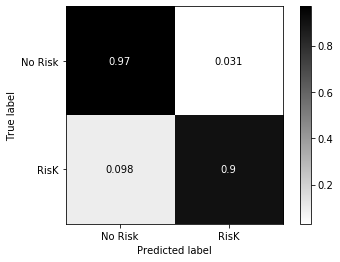

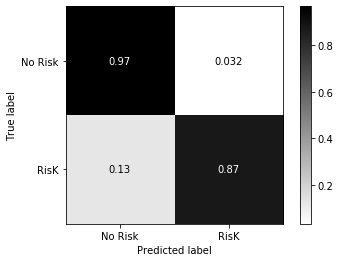

In [206]:
# model, cm = CreateDecisionTree(xtr,ytr,xte,yte,7)
# model, cm = CreateSVM(xtr, ytr, xte, yte)
model, cm = CreateSVM(xtr,ytr,xte,yte,gamma=0.001,c=100)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc
cm

0.8196286472148541

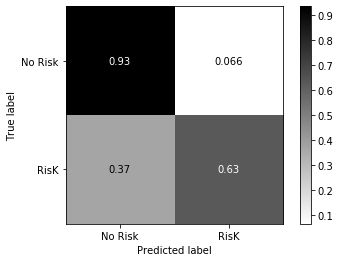

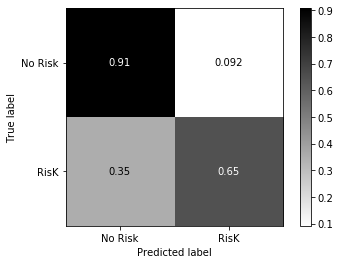

In [165]:
# model, cm = CreateDecisionTree(xtr,ytr,xte,yte,7)
# model, cm = CreateSVM(xtr, ytr, xte, yte)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 3.60329215
Iteration 2, loss = 3.58287711
Iteration 3, loss = 3.56268494
Iteration 4, loss = 3.54165105
Iteration 5, loss = 3.52086277
Iteration 6, loss = 3.50082331
Iteration 7, loss = 3.48005054
Iteration 8, loss = 3.45967176
Iteration 9, loss = 3.43936221
Iteration 10, loss = 3.41892517
Iteration 11, loss = 3.39843400
Iteration 12, loss = 3.37839045
Iteration 13, loss = 3.35784794
Iteration 14, loss = 3.33752667
Iteration 15, loss = 3.31680039
Iteration 16, loss = 3.29605453
Iteration 17, loss = 3.27549933
Iteration 18, loss = 3.25483843
Iteration 19, loss = 3.23422313
Iteration 20, loss = 3.21414498
Iteration 21, loss = 3.19394706
Iteration 22, loss = 3.17315135
Iteration 23, loss = 3.15348246
Iteration 24, loss = 3.13323777
Iteration 25, loss = 3.11301765
Iteration 26, loss = 3.09362002
Iteration 27, loss = 3.07349240
Iteration 28, loss = 3.05407033
Iteration 29, loss = 3.03446519
Iteration 30, loss = 3.01504871
Iteration 31, loss = 2.99538182
Iteration 32, los

Iteration 270, loss = 0.58405040
Iteration 271, loss = 0.58368800
Iteration 272, loss = 0.58335387
Iteration 273, loss = 0.58299098
Iteration 274, loss = 0.58267745
Iteration 275, loss = 0.58233776
Iteration 276, loss = 0.58202118
Iteration 277, loss = 0.58170778
Iteration 278, loss = 0.58141050
Iteration 279, loss = 0.58110032
Iteration 280, loss = 0.58080306
Iteration 281, loss = 0.58049738
Iteration 282, loss = 0.58023599
Iteration 283, loss = 0.57996716
Iteration 284, loss = 0.57972986
Iteration 285, loss = 0.57949051
Iteration 286, loss = 0.57924083
Iteration 287, loss = 0.57899268
Iteration 288, loss = 0.57873634
Iteration 289, loss = 0.57848151
Iteration 290, loss = 0.57822256
Iteration 291, loss = 0.57796337
Iteration 292, loss = 0.57770286
Iteration 293, loss = 0.57743983
Iteration 294, loss = 0.57718971
Iteration 295, loss = 0.57691897
Iteration 296, loss = 0.57666800
Iteration 297, loss = 0.57640946
Iteration 298, loss = 0.57617550
Iteration 299, loss = 0.57594237
Iteration 

Iteration 555, loss = 0.53908647
Iteration 556, loss = 0.53893473
Iteration 557, loss = 0.53879465
Iteration 558, loss = 0.53864036
Iteration 559, loss = 0.53849506
Iteration 560, loss = 0.53834615
Iteration 561, loss = 0.53820144
Iteration 562, loss = 0.53805718
Iteration 563, loss = 0.53790476
Iteration 564, loss = 0.53776287
Iteration 565, loss = 0.53762394
Iteration 566, loss = 0.53746862
Iteration 567, loss = 0.53734291
Iteration 568, loss = 0.53719387
Iteration 569, loss = 0.53704133
Iteration 570, loss = 0.53689667
Iteration 571, loss = 0.53674833
Iteration 572, loss = 0.53660775
Iteration 573, loss = 0.53646031
Iteration 574, loss = 0.53631635
Iteration 575, loss = 0.53617162
Iteration 576, loss = 0.53603076
Iteration 577, loss = 0.53588273
Iteration 578, loss = 0.53574124
Iteration 579, loss = 0.53559873
Iteration 580, loss = 0.53545219
Iteration 581, loss = 0.53531353
Iteration 582, loss = 0.53516602
Iteration 583, loss = 0.53502647
Iteration 584, loss = 0.53487767
Iteration 

Iteration 812, loss = 0.50057192
Iteration 813, loss = 0.50041037
Iteration 814, loss = 0.50025171
Iteration 815, loss = 0.50009849
Iteration 816, loss = 0.49993153
Iteration 817, loss = 0.49978415
Iteration 818, loss = 0.49961800
Iteration 819, loss = 0.49947259
Iteration 820, loss = 0.49931137
Iteration 821, loss = 0.49916071
Iteration 822, loss = 0.49901067
Iteration 823, loss = 0.49885951
Iteration 824, loss = 0.49874659
Iteration 825, loss = 0.49856884
Iteration 826, loss = 0.49843361
Iteration 827, loss = 0.49822928
Iteration 828, loss = 0.49807864
Iteration 829, loss = 0.49791391
Iteration 830, loss = 0.49775824
Iteration 831, loss = 0.49760046
Iteration 832, loss = 0.49746023
Iteration 833, loss = 0.49731178
Iteration 834, loss = 0.49714440
Iteration 835, loss = 0.49697576
Iteration 836, loss = 0.49681828
Iteration 837, loss = 0.49668282
Iteration 838, loss = 0.49651417
Iteration 839, loss = 0.49636276
Iteration 840, loss = 0.49622751
Iteration 841, loss = 0.49605751
Iteration 

Iteration 1077, loss = 0.45909196
Iteration 1078, loss = 0.45894054
Iteration 1079, loss = 0.45877817
Iteration 1080, loss = 0.45862503
Iteration 1081, loss = 0.45846658
Iteration 1082, loss = 0.45832442
Iteration 1083, loss = 0.45817298
Iteration 1084, loss = 0.45800167
Iteration 1085, loss = 0.45784102
Iteration 1086, loss = 0.45770430
Iteration 1087, loss = 0.45751909
Iteration 1088, loss = 0.45736619
Iteration 1089, loss = 0.45720639
Iteration 1090, loss = 0.45705137
Iteration 1091, loss = 0.45690524
Iteration 1092, loss = 0.45674969
Iteration 1093, loss = 0.45662881
Iteration 1094, loss = 0.45644832
Iteration 1095, loss = 0.45629314
Iteration 1096, loss = 0.45613393
Iteration 1097, loss = 0.45598558
Iteration 1098, loss = 0.45587482
Iteration 1099, loss = 0.45566243
Iteration 1100, loss = 0.45551966
Iteration 1101, loss = 0.45535123
Iteration 1102, loss = 0.45518826
Iteration 1103, loss = 0.45503575
Iteration 1104, loss = 0.45487440
Iteration 1105, loss = 0.45471841
Iteration 1106

Iteration 1322, loss = 0.42186460
Iteration 1323, loss = 0.42160821
Iteration 1324, loss = 0.42146484
Iteration 1325, loss = 0.42134073
Iteration 1326, loss = 0.42117014
Iteration 1327, loss = 0.42101861
Iteration 1328, loss = 0.42090739
Iteration 1329, loss = 0.42077603
Iteration 1330, loss = 0.42064455
Iteration 1331, loss = 0.42045491
Iteration 1332, loss = 0.42028848
Iteration 1333, loss = 0.42013791
Iteration 1334, loss = 0.41999652
Iteration 1335, loss = 0.41985175
Iteration 1336, loss = 0.41968525
Iteration 1337, loss = 0.41954754
Iteration 1338, loss = 0.41946647
Iteration 1339, loss = 0.41927168
Iteration 1340, loss = 0.41913799
Iteration 1341, loss = 0.41896913
Iteration 1342, loss = 0.41882283
Iteration 1343, loss = 0.41866742
Iteration 1344, loss = 0.41852441
Iteration 1345, loss = 0.41837239
Iteration 1346, loss = 0.41824016
Iteration 1347, loss = 0.41807816
Iteration 1348, loss = 0.41794207
Iteration 1349, loss = 0.41780968
Iteration 1350, loss = 0.41765039
Iteration 1351

Iteration 1599, loss = 0.38270848
Iteration 1600, loss = 0.38257473
Iteration 1601, loss = 0.38242921
Iteration 1602, loss = 0.38231283
Iteration 1603, loss = 0.38215530
Iteration 1604, loss = 0.38204251
Iteration 1605, loss = 0.38189064
Iteration 1606, loss = 0.38177322
Iteration 1607, loss = 0.38162174
Iteration 1608, loss = 0.38154083
Iteration 1609, loss = 0.38139749
Iteration 1610, loss = 0.38128417
Iteration 1611, loss = 0.38113311
Iteration 1612, loss = 0.38102114
Iteration 1613, loss = 0.38082390
Iteration 1614, loss = 0.38070285
Iteration 1615, loss = 0.38058677
Iteration 1616, loss = 0.38045212
Iteration 1617, loss = 0.38031953
Iteration 1618, loss = 0.38015910
Iteration 1619, loss = 0.38001238
Iteration 1620, loss = 0.37995780
Iteration 1621, loss = 0.37984461
Iteration 1622, loss = 0.37970542
Iteration 1623, loss = 0.37948539
Iteration 1624, loss = 0.37934318
Iteration 1625, loss = 0.37928010
Iteration 1626, loss = 0.37915331
Iteration 1627, loss = 0.37900865
Iteration 1628

Iteration 1875, loss = 0.34793510
Iteration 1876, loss = 0.34786053
Iteration 1877, loss = 0.34770791
Iteration 1878, loss = 0.34756965
Iteration 1879, loss = 0.34736381
Iteration 1880, loss = 0.34722424
Iteration 1881, loss = 0.34710941
Iteration 1882, loss = 0.34702730
Iteration 1883, loss = 0.34692262
Iteration 1884, loss = 0.34679330
Iteration 1885, loss = 0.34663959
Iteration 1886, loss = 0.34646576
Iteration 1887, loss = 0.34640366
Iteration 1888, loss = 0.34636123
Iteration 1889, loss = 0.34641755
Iteration 1890, loss = 0.34622033
Iteration 1891, loss = 0.34602212
Iteration 1892, loss = 0.34589535
Iteration 1893, loss = 0.34570206
Iteration 1894, loss = 0.34558723
Iteration 1895, loss = 0.34547627
Iteration 1896, loss = 0.34535617
Iteration 1897, loss = 0.34524663
Iteration 1898, loss = 0.34516543
Iteration 1899, loss = 0.34504978
Iteration 1900, loss = 0.34494695
Iteration 1901, loss = 0.34483342
Iteration 1902, loss = 0.34468480
Iteration 1903, loss = 0.34453889
Iteration 1904

c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.896551724137931

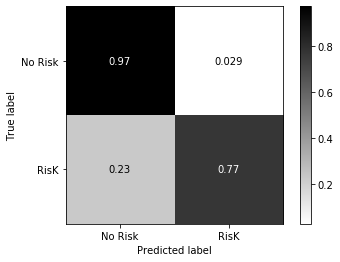

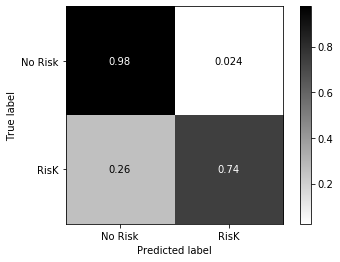

In [167]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 2000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 0.75586587
Iteration 2, loss = 0.75241205
Iteration 3, loss = 0.74949904
Iteration 4, loss = 0.74654187
Iteration 5, loss = 0.74430874
Iteration 6, loss = 0.74221747
Iteration 7, loss = 0.74020807
Iteration 8, loss = 0.73857476
Iteration 9, loss = 0.73743421
Iteration 10, loss = 0.73628300
Iteration 11, loss = 0.73534561
Iteration 12, loss = 0.73458054
Iteration 13, loss = 0.73382866
Iteration 14, loss = 0.73334968
Iteration 15, loss = 0.73297396
Iteration 16, loss = 0.73251574
Iteration 17, loss = 0.73203236
Iteration 18, loss = 0.73152938
Iteration 19, loss = 0.73109665
Iteration 20, loss = 0.73086333
Iteration 21, loss = 0.73056299
Iteration 22, loss = 0.73031596
Iteration 23, loss = 0.73004479
Iteration 24, loss = 0.72986750
Iteration 25, loss = 0.72968367
Iteration 26, loss = 0.72944579
Iteration 27, loss = 0.72926014
Iteration 28, loss = 0.72912746
Iteration 29, loss = 0.72891335
Iteration 30, loss = 0.72874429
Iteration 31, loss = 0.72855334
Iteration 32, los

Iteration 293, loss = 0.68790768
Iteration 294, loss = 0.68773440
Iteration 295, loss = 0.68755670
Iteration 296, loss = 0.68738720
Iteration 297, loss = 0.68725408
Iteration 298, loss = 0.68706408
Iteration 299, loss = 0.68690515
Iteration 300, loss = 0.68674416
Iteration 301, loss = 0.68656855
Iteration 302, loss = 0.68640653
Iteration 303, loss = 0.68625294
Iteration 304, loss = 0.68605500
Iteration 305, loss = 0.68598437
Iteration 306, loss = 0.68574577
Iteration 307, loss = 0.68560270
Iteration 308, loss = 0.68543749
Iteration 309, loss = 0.68530018
Iteration 310, loss = 0.68505783
Iteration 311, loss = 0.68490064
Iteration 312, loss = 0.68476038
Iteration 313, loss = 0.68461129
Iteration 314, loss = 0.68445766
Iteration 315, loss = 0.68432276
Iteration 316, loss = 0.68421519
Iteration 317, loss = 0.68402610
Iteration 318, loss = 0.68385324
Iteration 319, loss = 0.68366936
Iteration 320, loss = 0.68345683
Iteration 321, loss = 0.68328337
Iteration 322, loss = 0.68314185
Iteration 

Iteration 547, loss = 0.64305798
Iteration 548, loss = 0.64289239
Iteration 549, loss = 0.64270004
Iteration 550, loss = 0.64252880
Iteration 551, loss = 0.64234319
Iteration 552, loss = 0.64212756
Iteration 553, loss = 0.64197781
Iteration 554, loss = 0.64181575
Iteration 555, loss = 0.64164338
Iteration 556, loss = 0.64146768
Iteration 557, loss = 0.64129385
Iteration 558, loss = 0.64116299
Iteration 559, loss = 0.64099267
Iteration 560, loss = 0.64081849
Iteration 561, loss = 0.64058426
Iteration 562, loss = 0.64037052
Iteration 563, loss = 0.64021148
Iteration 564, loss = 0.63999744
Iteration 565, loss = 0.63979524
Iteration 566, loss = 0.63957305
Iteration 567, loss = 0.63940013
Iteration 568, loss = 0.63923173
Iteration 569, loss = 0.63904133
Iteration 570, loss = 0.63885432
Iteration 571, loss = 0.63868000
Iteration 572, loss = 0.63850351
Iteration 573, loss = 0.63832117
Iteration 574, loss = 0.63814167
Iteration 575, loss = 0.63793613
Iteration 576, loss = 0.63776916
Iteration 

Iteration 809, loss = 0.59065956
Iteration 810, loss = 0.58948119
Iteration 811, loss = 0.58814176
Iteration 812, loss = 0.58719731
Iteration 813, loss = 0.58632858
Iteration 814, loss = 0.58558479
Iteration 815, loss = 0.58515080
Iteration 816, loss = 0.58474390
Iteration 817, loss = 0.58436683
Iteration 818, loss = 0.58397859
Iteration 819, loss = 0.58358518
Iteration 820, loss = 0.58320572
Iteration 821, loss = 0.58286077
Iteration 822, loss = 0.58249385
Iteration 823, loss = 0.58211441
Iteration 824, loss = 0.58177245
Iteration 825, loss = 0.58143647
Iteration 826, loss = 0.58109355
Iteration 827, loss = 0.58074863
Iteration 828, loss = 0.58042203
Iteration 829, loss = 0.58010617
Iteration 830, loss = 0.57971892
Iteration 831, loss = 0.57941128
Iteration 832, loss = 0.57911072
Iteration 833, loss = 0.57881056
Iteration 834, loss = 0.57849281
Iteration 835, loss = 0.57818594
Iteration 836, loss = 0.57787124
Iteration 837, loss = 0.57763170
Iteration 838, loss = 0.57723903
Iteration 

Iteration 1074, loss = 0.51459375
Iteration 1075, loss = 0.51434335
Iteration 1076, loss = 0.51414407
Iteration 1077, loss = 0.51389272
Iteration 1078, loss = 0.51365158
Iteration 1079, loss = 0.51337515
Iteration 1080, loss = 0.51314876
Iteration 1081, loss = 0.51289893
Iteration 1082, loss = 0.51264901
Iteration 1083, loss = 0.51242366
Iteration 1084, loss = 0.51217081
Iteration 1085, loss = 0.51199547
Iteration 1086, loss = 0.51174515
Iteration 1087, loss = 0.51165983
Iteration 1088, loss = 0.51135068
Iteration 1089, loss = 0.51106113
Iteration 1090, loss = 0.51075912
Iteration 1091, loss = 0.51049890
Iteration 1092, loss = 0.51026313
Iteration 1093, loss = 0.50997051
Iteration 1094, loss = 0.50973764
Iteration 1095, loss = 0.50958177
Iteration 1096, loss = 0.50930743
Iteration 1097, loss = 0.50902627
Iteration 1098, loss = 0.50879555
Iteration 1099, loss = 0.50855907
Iteration 1100, loss = 0.50834122
Iteration 1101, loss = 0.50806139
Iteration 1102, loss = 0.50784846
Iteration 1103

Iteration 1322, loss = 0.45632320
Iteration 1323, loss = 0.45576267
Iteration 1324, loss = 0.45534798
Iteration 1325, loss = 0.45497292
Iteration 1326, loss = 0.45460065
Iteration 1327, loss = 0.45425172
Iteration 1328, loss = 0.45392801
Iteration 1329, loss = 0.45353726
Iteration 1330, loss = 0.45339920
Iteration 1331, loss = 0.45293574
Iteration 1332, loss = 0.45259682
Iteration 1333, loss = 0.45228246
Iteration 1334, loss = 0.45190578
Iteration 1335, loss = 0.45165368
Iteration 1336, loss = 0.45133769
Iteration 1337, loss = 0.45103290
Iteration 1338, loss = 0.45068390
Iteration 1339, loss = 0.45033987
Iteration 1340, loss = 0.45005608
Iteration 1341, loss = 0.44970061
Iteration 1342, loss = 0.44940091
Iteration 1343, loss = 0.44911941
Iteration 1344, loss = 0.44878974
Iteration 1345, loss = 0.44850114
Iteration 1346, loss = 0.44817507
Iteration 1347, loss = 0.44788624
Iteration 1348, loss = 0.44763809
Iteration 1349, loss = 0.44727881
Iteration 1350, loss = 0.44707045
Iteration 1351

Iteration 1575, loss = 0.38925776
Iteration 1576, loss = 0.38904771
Iteration 1577, loss = 0.38881613
Iteration 1578, loss = 0.38859486
Iteration 1579, loss = 0.38842082
Iteration 1580, loss = 0.38814286
Iteration 1581, loss = 0.38784598
Iteration 1582, loss = 0.38765926
Iteration 1583, loss = 0.38736875
Iteration 1584, loss = 0.38716819
Iteration 1585, loss = 0.38704832
Iteration 1586, loss = 0.38689285
Iteration 1587, loss = 0.38661374
Iteration 1588, loss = 0.38629346
Iteration 1589, loss = 0.38602180
Iteration 1590, loss = 0.38579207
Iteration 1591, loss = 0.38557655
Iteration 1592, loss = 0.38543392
Iteration 1593, loss = 0.38515504
Iteration 1594, loss = 0.38498953
Iteration 1595, loss = 0.38462466
Iteration 1596, loss = 0.38455377
Iteration 1597, loss = 0.38447448
Iteration 1598, loss = 0.38448535
Iteration 1599, loss = 0.38419266
Iteration 1600, loss = 0.38382491
Iteration 1601, loss = 0.38341012
Iteration 1602, loss = 0.38307921
Iteration 1603, loss = 0.38294168
Iteration 1604

Iteration 1839, loss = 0.33601452
Iteration 1840, loss = 0.33583382
Iteration 1841, loss = 0.33562293
Iteration 1842, loss = 0.33543171
Iteration 1843, loss = 0.33527645
Iteration 1844, loss = 0.33508756
Iteration 1845, loss = 0.33501459
Iteration 1846, loss = 0.33475300
Iteration 1847, loss = 0.33453894
Iteration 1848, loss = 0.33435198
Iteration 1849, loss = 0.33425782
Iteration 1850, loss = 0.33415128
Iteration 1851, loss = 0.33397675
Iteration 1852, loss = 0.33370612
Iteration 1853, loss = 0.33357905
Iteration 1854, loss = 0.33334428
Iteration 1855, loss = 0.33311743
Iteration 1856, loss = 0.33294137
Iteration 1857, loss = 0.33277210
Iteration 1858, loss = 0.33259104
Iteration 1859, loss = 0.33243669
Iteration 1860, loss = 0.33226649
Iteration 1861, loss = 0.33207068
Iteration 1862, loss = 0.33191396
Iteration 1863, loss = 0.33174043
Iteration 1864, loss = 0.33155912
Iteration 1865, loss = 0.33140317
Iteration 1866, loss = 0.33119782
Iteration 1867, loss = 0.33101809
Iteration 1868

Iteration 2086, loss = 0.29647635
Iteration 2087, loss = 0.29633404
Iteration 2088, loss = 0.29626468
Iteration 2089, loss = 0.29608253
Iteration 2090, loss = 0.29590637
Iteration 2091, loss = 0.29573016
Iteration 2092, loss = 0.29556664
Iteration 2093, loss = 0.29545263
Iteration 2094, loss = 0.29530979
Iteration 2095, loss = 0.29516379
Iteration 2096, loss = 0.29502935
Iteration 2097, loss = 0.29487122
Iteration 2098, loss = 0.29474037
Iteration 2099, loss = 0.29461822
Iteration 2100, loss = 0.29449313
Iteration 2101, loss = 0.29434490
Iteration 2102, loss = 0.29417618
Iteration 2103, loss = 0.29401715
Iteration 2104, loss = 0.29389545
Iteration 2105, loss = 0.29381460
Iteration 2106, loss = 0.29365967
Iteration 2107, loss = 0.29351160
Iteration 2108, loss = 0.29336861
Iteration 2109, loss = 0.29321827
Iteration 2110, loss = 0.29303861
Iteration 2111, loss = 0.29290340
Iteration 2112, loss = 0.29276585
Iteration 2113, loss = 0.29261729
Iteration 2114, loss = 0.29247731
Iteration 2115

Iteration 2329, loss = 0.26530887
Iteration 2330, loss = 0.26524680
Iteration 2331, loss = 0.26511742
Iteration 2332, loss = 0.26499982
Iteration 2333, loss = 0.26491063
Iteration 2334, loss = 0.26476861
Iteration 2335, loss = 0.26464604
Iteration 2336, loss = 0.26454048
Iteration 2337, loss = 0.26441540
Iteration 2338, loss = 0.26435962
Iteration 2339, loss = 0.26421440
Iteration 2340, loss = 0.26409585
Iteration 2341, loss = 0.26398245
Iteration 2342, loss = 0.26387044
Iteration 2343, loss = 0.26377596
Iteration 2344, loss = 0.26372130
Iteration 2345, loss = 0.26358037
Iteration 2346, loss = 0.26341471
Iteration 2347, loss = 0.26329444
Iteration 2348, loss = 0.26329377
Iteration 2349, loss = 0.26310509
Iteration 2350, loss = 0.26301357
Iteration 2351, loss = 0.26280110
Iteration 2352, loss = 0.26273169
Iteration 2353, loss = 0.26267660
Iteration 2354, loss = 0.26259169
Iteration 2355, loss = 0.26244544
Iteration 2356, loss = 0.26232273
Iteration 2357, loss = 0.26217568
Iteration 2358

Iteration 2570, loss = 0.24073906
Iteration 2571, loss = 0.24057544
Iteration 2572, loss = 0.24047193
Iteration 2573, loss = 0.24044533
Iteration 2574, loss = 0.24036438
Iteration 2575, loss = 0.24020816
Iteration 2576, loss = 0.24013079
Iteration 2577, loss = 0.24002551
Iteration 2578, loss = 0.23993761
Iteration 2579, loss = 0.23985108
Iteration 2580, loss = 0.23984416
Iteration 2581, loss = 0.23974272
Iteration 2582, loss = 0.23962708
Iteration 2583, loss = 0.23953410
Iteration 2584, loss = 0.23941848
Iteration 2585, loss = 0.23933975
Iteration 2586, loss = 0.23927634
Iteration 2587, loss = 0.23917063
Iteration 2588, loss = 0.23907375
Iteration 2589, loss = 0.23896684
Iteration 2590, loss = 0.23887697
Iteration 2591, loss = 0.23879974
Iteration 2592, loss = 0.23870147
Iteration 2593, loss = 0.23861900
Iteration 2594, loss = 0.23852018
Iteration 2595, loss = 0.23844786
Iteration 2596, loss = 0.23838239
Iteration 2597, loss = 0.23827534
Iteration 2598, loss = 0.23820164
Iteration 2599

Iteration 2816, loss = 0.22078433
Iteration 2817, loss = 0.22069089
Iteration 2818, loss = 0.22055700
Iteration 2819, loss = 0.22041204
Iteration 2820, loss = 0.22030245
Iteration 2821, loss = 0.22023152
Iteration 2822, loss = 0.22021378
Iteration 2823, loss = 0.22010268
Iteration 2824, loss = 0.22013348
Iteration 2825, loss = 0.22011582
Iteration 2826, loss = 0.22000954
Iteration 2827, loss = 0.21995418
Iteration 2828, loss = 0.21981621
Iteration 2829, loss = 0.21973645
Iteration 2830, loss = 0.21960909
Iteration 2831, loss = 0.21952087
Iteration 2832, loss = 0.21945290
Iteration 2833, loss = 0.21935475
Iteration 2834, loss = 0.21930243
Iteration 2835, loss = 0.21929517
Iteration 2836, loss = 0.21907224
Iteration 2837, loss = 0.21914628
Iteration 2838, loss = 0.21914979
Iteration 2839, loss = 0.21908492
Iteration 2840, loss = 0.21896649
Iteration 2841, loss = 0.21880235
Iteration 2842, loss = 0.21876305
Iteration 2843, loss = 0.21870253
Iteration 2844, loss = 0.21861368
Iteration 2845

0.9098143236074271

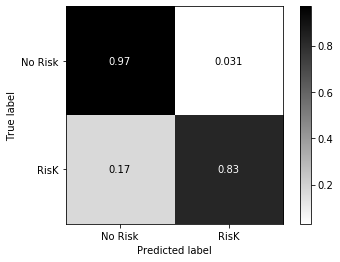

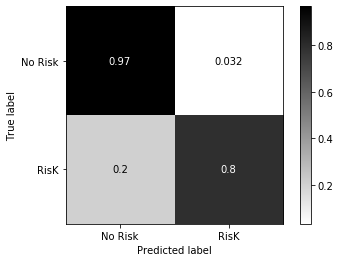

In [168]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 5000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 3.08156231
Iteration 2, loss = 3.03812987
Iteration 3, loss = 2.99344785
Iteration 4, loss = 2.94882503
Iteration 5, loss = 2.90643739
Iteration 6, loss = 2.86247644
Iteration 7, loss = 2.81802232
Iteration 8, loss = 2.77376028
Iteration 9, loss = 2.72963112
Iteration 10, loss = 2.68496191
Iteration 11, loss = 2.64122940
Iteration 12, loss = 2.59728875
Iteration 13, loss = 2.55288738
Iteration 14, loss = 2.50918856
Iteration 15, loss = 2.46497875
Iteration 16, loss = 2.42097379
Iteration 17, loss = 2.37655925
Iteration 18, loss = 2.33292892
Iteration 19, loss = 2.28914251
Iteration 20, loss = 2.24512672
Iteration 21, loss = 2.20244462
Iteration 22, loss = 2.15906606
Iteration 23, loss = 2.11783709
Iteration 24, loss = 2.07436188
Iteration 25, loss = 2.03253320
Iteration 26, loss = 1.99036856
Iteration 27, loss = 1.94897523
Iteration 28, loss = 1.90706694
Iteration 29, loss = 1.86604015
Iteration 30, loss = 1.82504208
Iteration 31, loss = 1.78406675
Iteration 32, los

Iteration 253, loss = 0.64118403
Iteration 254, loss = 0.64080981
Iteration 255, loss = 0.64049177
Iteration 256, loss = 0.64018829
Iteration 257, loss = 0.63985004
Iteration 258, loss = 0.63955153
Iteration 259, loss = 0.63924532
Iteration 260, loss = 0.63892725
Iteration 261, loss = 0.63860876
Iteration 262, loss = 0.63830637
Iteration 263, loss = 0.63800385
Iteration 264, loss = 0.63766253
Iteration 265, loss = 0.63734779
Iteration 266, loss = 0.63704306
Iteration 267, loss = 0.63673285
Iteration 268, loss = 0.63642527
Iteration 269, loss = 0.63613536
Iteration 270, loss = 0.63583577
Iteration 271, loss = 0.63555938
Iteration 272, loss = 0.63525161
Iteration 273, loss = 0.63493926
Iteration 274, loss = 0.63462859
Iteration 275, loss = 0.63430070
Iteration 276, loss = 0.63398591
Iteration 277, loss = 0.63367951
Iteration 278, loss = 0.63332522
Iteration 279, loss = 0.63304437
Iteration 280, loss = 0.63269737
Iteration 281, loss = 0.63244178
Iteration 282, loss = 0.63212116
Iteration 

Iteration 514, loss = 0.56441731
Iteration 515, loss = 0.56414273
Iteration 516, loss = 0.56385219
Iteration 517, loss = 0.56350442
Iteration 518, loss = 0.56318717
Iteration 519, loss = 0.56303171
Iteration 520, loss = 0.56263035
Iteration 521, loss = 0.56237237
Iteration 522, loss = 0.56207740
Iteration 523, loss = 0.56181640
Iteration 524, loss = 0.56157884
Iteration 525, loss = 0.56132213
Iteration 526, loss = 0.56098362
Iteration 527, loss = 0.56077695
Iteration 528, loss = 0.56043034
Iteration 529, loss = 0.56014403
Iteration 530, loss = 0.55989766
Iteration 531, loss = 0.55962023
Iteration 532, loss = 0.55939040
Iteration 533, loss = 0.55913733
Iteration 534, loss = 0.55891023
Iteration 535, loss = 0.55858201
Iteration 536, loss = 0.55826590
Iteration 537, loss = 0.55796334
Iteration 538, loss = 0.55767617
Iteration 539, loss = 0.55740041
Iteration 540, loss = 0.55712710
Iteration 541, loss = 0.55683657
Iteration 542, loss = 0.55660565
Iteration 543, loss = 0.55630366
Iteration 

Iteration 767, loss = 0.49842924
Iteration 768, loss = 0.49825488
Iteration 769, loss = 0.49803350
Iteration 770, loss = 0.49790944
Iteration 771, loss = 0.49785300
Iteration 772, loss = 0.49733353
Iteration 773, loss = 0.49696074
Iteration 774, loss = 0.49657553
Iteration 775, loss = 0.49632602
Iteration 776, loss = 0.49616397
Iteration 777, loss = 0.49594820
Iteration 778, loss = 0.49581944
Iteration 779, loss = 0.49558840
Iteration 780, loss = 0.49525098
Iteration 781, loss = 0.49492868
Iteration 782, loss = 0.49467031
Iteration 783, loss = 0.49441427
Iteration 784, loss = 0.49416737
Iteration 785, loss = 0.49390774
Iteration 786, loss = 0.49372913
Iteration 787, loss = 0.49340264
Iteration 788, loss = 0.49316975
Iteration 789, loss = 0.49290343
Iteration 790, loss = 0.49263432
Iteration 791, loss = 0.49247771
Iteration 792, loss = 0.49224245
Iteration 793, loss = 0.49206259
Iteration 794, loss = 0.49166363
Iteration 795, loss = 0.49153590
Iteration 796, loss = 0.49123545
Iteration 

Iteration 1022, loss = 0.43832311
Iteration 1023, loss = 0.43802165
Iteration 1024, loss = 0.43782129
Iteration 1025, loss = 0.43774948
Iteration 1026, loss = 0.43741307
Iteration 1027, loss = 0.43722179
Iteration 1028, loss = 0.43694832
Iteration 1029, loss = 0.43679649
Iteration 1030, loss = 0.43661801
Iteration 1031, loss = 0.43648641
Iteration 1032, loss = 0.43628703
Iteration 1033, loss = 0.43605347
Iteration 1034, loss = 0.43580677
Iteration 1035, loss = 0.43559068
Iteration 1036, loss = 0.43522907
Iteration 1037, loss = 0.43506089
Iteration 1038, loss = 0.43476446
Iteration 1039, loss = 0.43468970
Iteration 1040, loss = 0.43437675
Iteration 1041, loss = 0.43406093
Iteration 1042, loss = 0.43385109
Iteration 1043, loss = 0.43361510
Iteration 1044, loss = 0.43351753
Iteration 1045, loss = 0.43331552
Iteration 1046, loss = 0.43313810
Iteration 1047, loss = 0.43294961
Iteration 1048, loss = 0.43271216
Iteration 1049, loss = 0.43235375
Iteration 1050, loss = 0.43212680
Iteration 1051

Iteration 1271, loss = 0.38474157
Iteration 1272, loss = 0.38441482
Iteration 1273, loss = 0.38412714
Iteration 1274, loss = 0.38386897
Iteration 1275, loss = 0.38362774
Iteration 1276, loss = 0.38340829
Iteration 1277, loss = 0.38311031
Iteration 1278, loss = 0.38307730
Iteration 1279, loss = 0.38292569
Iteration 1280, loss = 0.38256994
Iteration 1281, loss = 0.38228004
Iteration 1282, loss = 0.38202219
Iteration 1283, loss = 0.38176085
Iteration 1284, loss = 0.38157392
Iteration 1285, loss = 0.38136360
Iteration 1286, loss = 0.38100605
Iteration 1287, loss = 0.38080908
Iteration 1288, loss = 0.38069060
Iteration 1289, loss = 0.38050405
Iteration 1290, loss = 0.38020023
Iteration 1291, loss = 0.38002732
Iteration 1292, loss = 0.37973538
Iteration 1293, loss = 0.37943622
Iteration 1294, loss = 0.37924721
Iteration 1295, loss = 0.37896612
Iteration 1296, loss = 0.37874150
Iteration 1297, loss = 0.37863655
Iteration 1298, loss = 0.37826862
Iteration 1299, loss = 0.37837677
Iteration 1300

Iteration 1524, loss = 0.33129169
Iteration 1525, loss = 0.33111212
Iteration 1526, loss = 0.33083483
Iteration 1527, loss = 0.33059849
Iteration 1528, loss = 0.33052968
Iteration 1529, loss = 0.33035197
Iteration 1530, loss = 0.33014381
Iteration 1531, loss = 0.32981243
Iteration 1532, loss = 0.32985275
Iteration 1533, loss = 0.32983505
Iteration 1534, loss = 0.32969095
Iteration 1535, loss = 0.32934060
Iteration 1536, loss = 0.32900177
Iteration 1537, loss = 0.32891856
Iteration 1538, loss = 0.32863346
Iteration 1539, loss = 0.32843847
Iteration 1540, loss = 0.32823337
Iteration 1541, loss = 0.32805715
Iteration 1542, loss = 0.32789502
Iteration 1543, loss = 0.32781500
Iteration 1544, loss = 0.32751488
Iteration 1545, loss = 0.32735749
Iteration 1546, loss = 0.32737431
Iteration 1547, loss = 0.32707437
Iteration 1548, loss = 0.32708006
Iteration 1549, loss = 0.32666336
Iteration 1550, loss = 0.32642882
Iteration 1551, loss = 0.32632544
Iteration 1552, loss = 0.32607094
Iteration 1553

Iteration 1776, loss = 0.28966220
Iteration 1777, loss = 0.28967358
Iteration 1778, loss = 0.28953412
Iteration 1779, loss = 0.28936741
Iteration 1780, loss = 0.28917665
Iteration 1781, loss = 0.28902458
Iteration 1782, loss = 0.28885575
Iteration 1783, loss = 0.28868638
Iteration 1784, loss = 0.28854945
Iteration 1785, loss = 0.28849759
Iteration 1786, loss = 0.28837807
Iteration 1787, loss = 0.28828348
Iteration 1788, loss = 0.28799202
Iteration 1789, loss = 0.28785896
Iteration 1790, loss = 0.28777338
Iteration 1791, loss = 0.28757973
Iteration 1792, loss = 0.28749246
Iteration 1793, loss = 0.28728599
Iteration 1794, loss = 0.28709713
Iteration 1795, loss = 0.28698923
Iteration 1796, loss = 0.28692380
Iteration 1797, loss = 0.28685322
Iteration 1798, loss = 0.28674357
Iteration 1799, loss = 0.28653404
Iteration 1800, loss = 0.28627390
Iteration 1801, loss = 0.28616243
Iteration 1802, loss = 0.28603924
Iteration 1803, loss = 0.28591204
Iteration 1804, loss = 0.28605377
Iteration 1805

Iteration 2034, loss = 0.25760541
Iteration 2035, loss = 0.25752259
Iteration 2036, loss = 0.25730440
Iteration 2037, loss = 0.25720129
Iteration 2038, loss = 0.25705787
Iteration 2039, loss = 0.25701669
Iteration 2040, loss = 0.25690586
Iteration 2041, loss = 0.25685927
Iteration 2042, loss = 0.25670932
Iteration 2043, loss = 0.25684957
Iteration 2044, loss = 0.25682127
Iteration 2045, loss = 0.25650287
Iteration 2046, loss = 0.25627570
Iteration 2047, loss = 0.25622197
Iteration 2048, loss = 0.25605553
Iteration 2049, loss = 0.25594016
Iteration 2050, loss = 0.25579070
Iteration 2051, loss = 0.25565846
Iteration 2052, loss = 0.25594335
Iteration 2053, loss = 0.25597409
Iteration 2054, loss = 0.25565719
Iteration 2055, loss = 0.25544306
Iteration 2056, loss = 0.25519305
Iteration 2057, loss = 0.25509175
Iteration 2058, loss = 0.25497327
Iteration 2059, loss = 0.25490207
Iteration 2060, loss = 0.25478553
Iteration 2061, loss = 0.25464759
Iteration 2062, loss = 0.25458218
Iteration 2063

Iteration 2295, loss = 0.23322841
Iteration 2296, loss = 0.23315944
Iteration 2297, loss = 0.23313922
Iteration 2298, loss = 0.23300357
Iteration 2299, loss = 0.23290833
Iteration 2300, loss = 0.23293494
Iteration 2301, loss = 0.23298151
Iteration 2302, loss = 0.23292585
Iteration 2303, loss = 0.23282519
Iteration 2304, loss = 0.23269459
Iteration 2305, loss = 0.23249620
Iteration 2306, loss = 0.23235759
Iteration 2307, loss = 0.23231367
Iteration 2308, loss = 0.23231318
Iteration 2309, loss = 0.23226684
Iteration 2310, loss = 0.23227910
Iteration 2311, loss = 0.23205303
Iteration 2312, loss = 0.23198414
Iteration 2313, loss = 0.23182435
Iteration 2314, loss = 0.23201682
Iteration 2315, loss = 0.23190114
Iteration 2316, loss = 0.23172396
Iteration 2317, loss = 0.23155356
Iteration 2318, loss = 0.23141999
Iteration 2319, loss = 0.23143516
Iteration 2320, loss = 0.23160440
Iteration 2321, loss = 0.23145751
Iteration 2322, loss = 0.23115412
Iteration 2323, loss = 0.23105226
Iteration 2324

Iteration 2551, loss = 0.21570944
Iteration 2552, loss = 0.21556844
Iteration 2553, loss = 0.21551027
Iteration 2554, loss = 0.21545630
Iteration 2555, loss = 0.21537291
Iteration 2556, loss = 0.21530308
Iteration 2557, loss = 0.21524367
Iteration 2558, loss = 0.21519719
Iteration 2559, loss = 0.21514746
Iteration 2560, loss = 0.21516468
Iteration 2561, loss = 0.21508500
Iteration 2562, loss = 0.21496571
Iteration 2563, loss = 0.21491764
Iteration 2564, loss = 0.21481990
Iteration 2565, loss = 0.21475230
Iteration 2566, loss = 0.21471458
Iteration 2567, loss = 0.21467691
Iteration 2568, loss = 0.21461518
Iteration 2569, loss = 0.21454320
Iteration 2570, loss = 0.21452025
Iteration 2571, loss = 0.21443175
Iteration 2572, loss = 0.21447849
Iteration 2573, loss = 0.21426991
Iteration 2574, loss = 0.21422788
Iteration 2575, loss = 0.21426392
Iteration 2576, loss = 0.21427369
Iteration 2577, loss = 0.21414723
Iteration 2578, loss = 0.21400831
Iteration 2579, loss = 0.21395637
Iteration 2580

0.9098143236074271

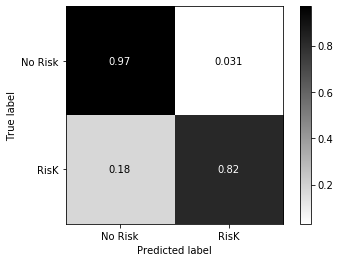

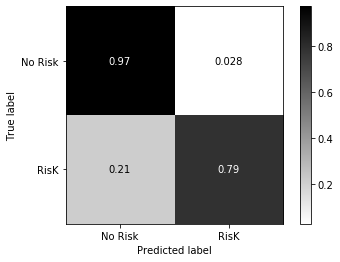

In [169]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 4000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 2.11692061
Iteration 2, loss = 0.95554306
Iteration 3, loss = 1.04549532
Iteration 4, loss = 0.74478332
Iteration 5, loss = 0.83681005
Iteration 6, loss = 0.66431462
Iteration 7, loss = 0.68188116
Iteration 8, loss = 0.63553887
Iteration 9, loss = 0.63219144
Iteration 10, loss = 0.61285968
Iteration 11, loss = 0.60211007
Iteration 12, loss = 0.58764018
Iteration 13, loss = 0.58116234
Iteration 14, loss = 0.57049546
Iteration 15, loss = 0.56001222
Iteration 16, loss = 0.55165238
Iteration 17, loss = 0.54086214
Iteration 18, loss = 0.53182869
Iteration 19, loss = 0.52293629
Iteration 20, loss = 0.51473030
Iteration 21, loss = 0.50627011
Iteration 22, loss = 0.49818034
Iteration 23, loss = 0.49075337
Iteration 24, loss = 0.48101722
Iteration 25, loss = 0.47456724
Iteration 26, loss = 0.46674728
Iteration 27, loss = 0.45665653
Iteration 28, loss = 0.44900688
Iteration 29, loss = 0.44048246
Iteration 30, loss = 0.43087775
Iteration 31, loss = 0.42375247
Iteration 32, los

0.9204244031830239

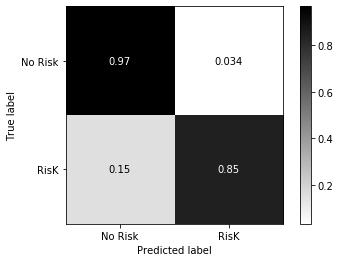

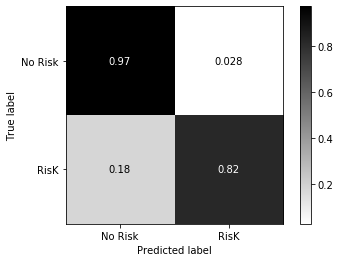

In [177]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 400, 0.001, 7000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 1.04102748
Iteration 2, loss = 1.02843690
Iteration 3, loss = 1.01578356
Iteration 4, loss = 1.00313654
Iteration 5, loss = 0.99113768
Iteration 6, loss = 0.97914457
Iteration 7, loss = 0.96746988
Iteration 8, loss = 0.95604090
Iteration 9, loss = 0.94519009
Iteration 10, loss = 0.93383702
Iteration 11, loss = 0.92343390
Iteration 12, loss = 0.91303970
Iteration 13, loss = 0.90307920
Iteration 14, loss = 0.89339211
Iteration 15, loss = 0.88391549
Iteration 16, loss = 0.87492269
Iteration 17, loss = 0.86572494
Iteration 18, loss = 0.85775305
Iteration 19, loss = 0.84948194
Iteration 20, loss = 0.84156153
Iteration 21, loss = 0.83374203
Iteration 22, loss = 0.82669116
Iteration 23, loss = 0.81957717
Iteration 24, loss = 0.81321080
Iteration 25, loss = 0.80664320
Iteration 26, loss = 0.80036630
Iteration 27, loss = 0.79490394
Iteration 28, loss = 0.78913767
Iteration 29, loss = 0.78381423
Iteration 30, loss = 0.77905044
Iteration 31, loss = 0.77419919
Iteration 32, los

Iteration 259, loss = 0.67706945
Iteration 260, loss = 0.67696160
Iteration 261, loss = 0.67683851
Iteration 262, loss = 0.67672519
Iteration 263, loss = 0.67661386
Iteration 264, loss = 0.67649583
Iteration 265, loss = 0.67638142
Iteration 266, loss = 0.67626805
Iteration 267, loss = 0.67617120
Iteration 268, loss = 0.67603506
Iteration 269, loss = 0.67592444
Iteration 270, loss = 0.67580915
Iteration 271, loss = 0.67569461
Iteration 272, loss = 0.67558293
Iteration 273, loss = 0.67546222
Iteration 274, loss = 0.67535952
Iteration 275, loss = 0.67523507
Iteration 276, loss = 0.67512569
Iteration 277, loss = 0.67500836
Iteration 278, loss = 0.67489232
Iteration 279, loss = 0.67478597
Iteration 280, loss = 0.67467781
Iteration 281, loss = 0.67459260
Iteration 282, loss = 0.67444525
Iteration 283, loss = 0.67431971
Iteration 284, loss = 0.67422062
Iteration 285, loss = 0.67409354
Iteration 286, loss = 0.67397602
Iteration 287, loss = 0.67386049
Iteration 288, loss = 0.67375007
Iteration 

Iteration 517, loss = 0.64573076
Iteration 518, loss = 0.64564807
Iteration 519, loss = 0.64550636
Iteration 520, loss = 0.64540085
Iteration 521, loss = 0.64526795
Iteration 522, loss = 0.64515720
Iteration 523, loss = 0.64504280
Iteration 524, loss = 0.64494214
Iteration 525, loss = 0.64479919
Iteration 526, loss = 0.64469128
Iteration 527, loss = 0.64458960
Iteration 528, loss = 0.64448338
Iteration 529, loss = 0.64435396
Iteration 530, loss = 0.64421949
Iteration 531, loss = 0.64414123
Iteration 532, loss = 0.64399586
Iteration 533, loss = 0.64388804
Iteration 534, loss = 0.64379676
Iteration 535, loss = 0.64364575
Iteration 536, loss = 0.64352828
Iteration 537, loss = 0.64342674
Iteration 538, loss = 0.64329584
Iteration 539, loss = 0.64318650
Iteration 540, loss = 0.64306920
Iteration 541, loss = 0.64295326
Iteration 542, loss = 0.64282425
Iteration 543, loss = 0.64272298
Iteration 544, loss = 0.64259476
Iteration 545, loss = 0.64250988
Iteration 546, loss = 0.64237452
Iteration 

Iteration 771, loss = 0.61597187
Iteration 772, loss = 0.61585472
Iteration 773, loss = 0.61571297
Iteration 774, loss = 0.61559750
Iteration 775, loss = 0.61546839
Iteration 776, loss = 0.61534864
Iteration 777, loss = 0.61522625
Iteration 778, loss = 0.61511535
Iteration 779, loss = 0.61499412
Iteration 780, loss = 0.61488548
Iteration 781, loss = 0.61476517
Iteration 782, loss = 0.61463396
Iteration 783, loss = 0.61452514
Iteration 784, loss = 0.61440869
Iteration 785, loss = 0.61427525
Iteration 786, loss = 0.61419972
Iteration 787, loss = 0.61406924
Iteration 788, loss = 0.61393131
Iteration 789, loss = 0.61381407
Iteration 790, loss = 0.61371919
Iteration 791, loss = 0.61357241
Iteration 792, loss = 0.61352578
Iteration 793, loss = 0.61333500
Iteration 794, loss = 0.61321370
Iteration 795, loss = 0.61309438
Iteration 796, loss = 0.61298395
Iteration 797, loss = 0.61285747
Iteration 798, loss = 0.61275413
Iteration 799, loss = 0.61261881
Iteration 800, loss = 0.61250774
Iteration 

Iteration 1024, loss = 0.58397407
Iteration 1025, loss = 0.58382354
Iteration 1026, loss = 0.58370619
Iteration 1027, loss = 0.58358350
Iteration 1028, loss = 0.58345934
Iteration 1029, loss = 0.58332341
Iteration 1030, loss = 0.58322591
Iteration 1031, loss = 0.58315054
Iteration 1032, loss = 0.58298265
Iteration 1033, loss = 0.58281460
Iteration 1034, loss = 0.58269170
Iteration 1035, loss = 0.58262548
Iteration 1036, loss = 0.58244576
Iteration 1037, loss = 0.58230701
Iteration 1038, loss = 0.58225359
Iteration 1039, loss = 0.58208968
Iteration 1040, loss = 0.58196116
Iteration 1041, loss = 0.58188023
Iteration 1042, loss = 0.58177850
Iteration 1043, loss = 0.58156009
Iteration 1044, loss = 0.58142709
Iteration 1045, loss = 0.58131990
Iteration 1046, loss = 0.58117354
Iteration 1047, loss = 0.58105696
Iteration 1048, loss = 0.58092500
Iteration 1049, loss = 0.58085990
Iteration 1050, loss = 0.58068399
Iteration 1051, loss = 0.58057665
Iteration 1052, loss = 0.58048523
Iteration 1053

Iteration 1270, loss = 0.55264716
Iteration 1271, loss = 0.55250752
Iteration 1272, loss = 0.55240435
Iteration 1273, loss = 0.55228109
Iteration 1274, loss = 0.55219124
Iteration 1275, loss = 0.55202972
Iteration 1276, loss = 0.55190679
Iteration 1277, loss = 0.55176140
Iteration 1278, loss = 0.55163756
Iteration 1279, loss = 0.55151331
Iteration 1280, loss = 0.55138987
Iteration 1281, loss = 0.55129135
Iteration 1282, loss = 0.55113795
Iteration 1283, loss = 0.55102527
Iteration 1284, loss = 0.55088316
Iteration 1285, loss = 0.55076865
Iteration 1286, loss = 0.55063980
Iteration 1287, loss = 0.55061563
Iteration 1288, loss = 0.55038626
Iteration 1289, loss = 0.55025715
Iteration 1290, loss = 0.55014480
Iteration 1291, loss = 0.54999760
Iteration 1292, loss = 0.54987768
Iteration 1293, loss = 0.54977340
Iteration 1294, loss = 0.54967503
Iteration 1295, loss = 0.54951096
Iteration 1296, loss = 0.54937436
Iteration 1297, loss = 0.54925972
Iteration 1298, loss = 0.54913112
Iteration 1299

Iteration 1517, loss = 0.52125377
Iteration 1518, loss = 0.52112187
Iteration 1519, loss = 0.52103120
Iteration 1520, loss = 0.52086778
Iteration 1521, loss = 0.52072781
Iteration 1522, loss = 0.52058671
Iteration 1523, loss = 0.52045986
Iteration 1524, loss = 0.52027126
Iteration 1525, loss = 0.51999617
Iteration 1526, loss = 0.51953565
Iteration 1527, loss = 0.51904767
Iteration 1528, loss = 0.51873064
Iteration 1529, loss = 0.51855900
Iteration 1530, loss = 0.51821307
Iteration 1531, loss = 0.51794070
Iteration 1532, loss = 0.51769966
Iteration 1533, loss = 0.51750874
Iteration 1534, loss = 0.51732392
Iteration 1535, loss = 0.51710702
Iteration 1536, loss = 0.51693318
Iteration 1537, loss = 0.51676709
Iteration 1538, loss = 0.51657466
Iteration 1539, loss = 0.51642014
Iteration 1540, loss = 0.51625110
Iteration 1541, loss = 0.51605846
Iteration 1542, loss = 0.51589563
Iteration 1543, loss = 0.51570165
Iteration 1544, loss = 0.51553351
Iteration 1545, loss = 0.51533686
Iteration 1546

Iteration 1763, loss = 0.48312336
Iteration 1764, loss = 0.48296519
Iteration 1765, loss = 0.48285626
Iteration 1766, loss = 0.48274682
Iteration 1767, loss = 0.48255296
Iteration 1768, loss = 0.48246683
Iteration 1769, loss = 0.48228090
Iteration 1770, loss = 0.48216978
Iteration 1771, loss = 0.48201937
Iteration 1772, loss = 0.48185410
Iteration 1773, loss = 0.48175265
Iteration 1774, loss = 0.48158588
Iteration 1775, loss = 0.48155553
Iteration 1776, loss = 0.48134190
Iteration 1777, loss = 0.48118605
Iteration 1778, loss = 0.48106183
Iteration 1779, loss = 0.48089698
Iteration 1780, loss = 0.48081211
Iteration 1781, loss = 0.48061910
Iteration 1782, loss = 0.48047024
Iteration 1783, loss = 0.48038083
Iteration 1784, loss = 0.48023860
Iteration 1785, loss = 0.48008698
Iteration 1786, loss = 0.47992943
Iteration 1787, loss = 0.47978601
Iteration 1788, loss = 0.47964367
Iteration 1789, loss = 0.47950517
Iteration 1790, loss = 0.47937041
Iteration 1791, loss = 0.47926011
Iteration 1792

Iteration 2017, loss = 0.44768550
Iteration 2018, loss = 0.44749796
Iteration 2019, loss = 0.44735248
Iteration 2020, loss = 0.44726329
Iteration 2021, loss = 0.44705265
Iteration 2022, loss = 0.44693029
Iteration 2023, loss = 0.44677691
Iteration 2024, loss = 0.44661186
Iteration 2025, loss = 0.44649266
Iteration 2026, loss = 0.44636773
Iteration 2027, loss = 0.44629492
Iteration 2028, loss = 0.44605227
Iteration 2029, loss = 0.44593850
Iteration 2030, loss = 0.44579889
Iteration 2031, loss = 0.44568476
Iteration 2032, loss = 0.44558019
Iteration 2033, loss = 0.44540032
Iteration 2034, loss = 0.44527212
Iteration 2035, loss = 0.44515014
Iteration 2036, loss = 0.44507773
Iteration 2037, loss = 0.44486171
Iteration 2038, loss = 0.44486512
Iteration 2039, loss = 0.44465745
Iteration 2040, loss = 0.44450570
Iteration 2041, loss = 0.44434013
Iteration 2042, loss = 0.44425724
Iteration 2043, loss = 0.44408978
Iteration 2044, loss = 0.44401552
Iteration 2045, loss = 0.44382704
Iteration 2046

Iteration 2268, loss = 0.41467440
Iteration 2269, loss = 0.41456100
Iteration 2270, loss = 0.41449641
Iteration 2271, loss = 0.41430519
Iteration 2272, loss = 0.41420728
Iteration 2273, loss = 0.41405964
Iteration 2274, loss = 0.41394411
Iteration 2275, loss = 0.41378698
Iteration 2276, loss = 0.41366050
Iteration 2277, loss = 0.41354285
Iteration 2278, loss = 0.41345959
Iteration 2279, loss = 0.41329430
Iteration 2280, loss = 0.41321347
Iteration 2281, loss = 0.41304535
Iteration 2282, loss = 0.41290379
Iteration 2283, loss = 0.41275090
Iteration 2284, loss = 0.41264400
Iteration 2285, loss = 0.41251902
Iteration 2286, loss = 0.41243380
Iteration 2287, loss = 0.41225210
Iteration 2288, loss = 0.41207849
Iteration 2289, loss = 0.41199616
Iteration 2290, loss = 0.41186801
Iteration 2291, loss = 0.41172541
Iteration 2292, loss = 0.41163683
Iteration 2293, loss = 0.41147045
Iteration 2294, loss = 0.41133532
Iteration 2295, loss = 0.41120333
Iteration 2296, loss = 0.41110408
Iteration 2297

Iteration 2519, loss = 0.38281358
Iteration 2520, loss = 0.38259514
Iteration 2521, loss = 0.38249905
Iteration 2522, loss = 0.38229333
Iteration 2523, loss = 0.38211929
Iteration 2524, loss = 0.38200403
Iteration 2525, loss = 0.38189675
Iteration 2526, loss = 0.38174721
Iteration 2527, loss = 0.38172228
Iteration 2528, loss = 0.38150819
Iteration 2529, loss = 0.38134765
Iteration 2530, loss = 0.38118793
Iteration 2531, loss = 0.38101873
Iteration 2532, loss = 0.38095284
Iteration 2533, loss = 0.38087126
Iteration 2534, loss = 0.38065688
Iteration 2535, loss = 0.38051015
Iteration 2536, loss = 0.38035048
Iteration 2537, loss = 0.38021014
Iteration 2538, loss = 0.38009237
Iteration 2539, loss = 0.37995350
Iteration 2540, loss = 0.37986223
Iteration 2541, loss = 0.37968555
Iteration 2542, loss = 0.37965192
Iteration 2543, loss = 0.37942401
Iteration 2544, loss = 0.37929949
Iteration 2545, loss = 0.37914375
Iteration 2546, loss = 0.37904451
Iteration 2547, loss = 0.37888692
Iteration 2548

Iteration 2762, loss = 0.35105460
Iteration 2763, loss = 0.35095373
Iteration 2764, loss = 0.35084021
Iteration 2765, loss = 0.35068264
Iteration 2766, loss = 0.35062894
Iteration 2767, loss = 0.35047320
Iteration 2768, loss = 0.35041421
Iteration 2769, loss = 0.35022701
Iteration 2770, loss = 0.35010434
Iteration 2771, loss = 0.34994521
Iteration 2772, loss = 0.34982219
Iteration 2773, loss = 0.34978563
Iteration 2774, loss = 0.34960063
Iteration 2775, loss = 0.34943670
Iteration 2776, loss = 0.34936470
Iteration 2777, loss = 0.34922801
Iteration 2778, loss = 0.34918465
Iteration 2779, loss = 0.34900344
Iteration 2780, loss = 0.34884679
Iteration 2781, loss = 0.34871291
Iteration 2782, loss = 0.34859121
Iteration 2783, loss = 0.34859995
Iteration 2784, loss = 0.34838047
Iteration 2785, loss = 0.34823055
Iteration 2786, loss = 0.34813265
Iteration 2787, loss = 0.34801789
Iteration 2788, loss = 0.34786863
Iteration 2789, loss = 0.34774861
Iteration 2790, loss = 0.34765667
Iteration 2791

Iteration 3003, loss = 0.32248796
Iteration 3004, loss = 0.32233055
Iteration 3005, loss = 0.32224309
Iteration 3006, loss = 0.32209713
Iteration 3007, loss = 0.32199676
Iteration 3008, loss = 0.32186969
Iteration 3009, loss = 0.32176802
Iteration 3010, loss = 0.32166426
Iteration 3011, loss = 0.32154940
Iteration 3012, loss = 0.32142570
Iteration 3013, loss = 0.32129350
Iteration 3014, loss = 0.32134400
Iteration 3015, loss = 0.32110712
Iteration 3016, loss = 0.32096100
Iteration 3017, loss = 0.32085129
Iteration 3018, loss = 0.32072302
Iteration 3019, loss = 0.32063328
Iteration 3020, loss = 0.32053801
Iteration 3021, loss = 0.32041154
Iteration 3022, loss = 0.32029212
Iteration 3023, loss = 0.32023951
Iteration 3024, loss = 0.32005508
Iteration 3025, loss = 0.31996191
Iteration 3026, loss = 0.31988149
Iteration 3027, loss = 0.31988456
Iteration 3028, loss = 0.31964891
Iteration 3029, loss = 0.31952451
Iteration 3030, loss = 0.31939990
Iteration 3031, loss = 0.31927945
Iteration 3032

Iteration 3255, loss = 0.29600692
Iteration 3256, loss = 0.29592385
Iteration 3257, loss = 0.29584126
Iteration 3258, loss = 0.29573094
Iteration 3259, loss = 0.29560038
Iteration 3260, loss = 0.29558868
Iteration 3261, loss = 0.29545820
Iteration 3262, loss = 0.29536334
Iteration 3263, loss = 0.29525530
Iteration 3264, loss = 0.29512818
Iteration 3265, loss = 0.29501793
Iteration 3266, loss = 0.29493567
Iteration 3267, loss = 0.29490396
Iteration 3268, loss = 0.29473227
Iteration 3269, loss = 0.29472468
Iteration 3270, loss = 0.29452914
Iteration 3271, loss = 0.29450082
Iteration 3272, loss = 0.29435214
Iteration 3273, loss = 0.29429202
Iteration 3274, loss = 0.29417060
Iteration 3275, loss = 0.29405860
Iteration 3276, loss = 0.29398720
Iteration 3277, loss = 0.29387051
Iteration 3278, loss = 0.29379728
Iteration 3279, loss = 0.29376575
Iteration 3280, loss = 0.29371019
Iteration 3281, loss = 0.29355185
Iteration 3282, loss = 0.29342476
Iteration 3283, loss = 0.29337527
Iteration 3284

Iteration 3508, loss = 0.27217673
Iteration 3509, loss = 0.27216785
Iteration 3510, loss = 0.27200370
Iteration 3511, loss = 0.27190943
Iteration 3512, loss = 0.27182804
Iteration 3513, loss = 0.27175919
Iteration 3514, loss = 0.27168699
Iteration 3515, loss = 0.27162099
Iteration 3516, loss = 0.27147346
Iteration 3517, loss = 0.27143476
Iteration 3518, loss = 0.27130738
Iteration 3519, loss = 0.27120704
Iteration 3520, loss = 0.27111669
Iteration 3521, loss = 0.27112968
Iteration 3522, loss = 0.27096801
Iteration 3523, loss = 0.27090509
Iteration 3524, loss = 0.27083051
Iteration 3525, loss = 0.27074667
Iteration 3526, loss = 0.27062584
Iteration 3527, loss = 0.27055319
Iteration 3528, loss = 0.27043456
Iteration 3529, loss = 0.27035133
Iteration 3530, loss = 0.27026907
Iteration 3531, loss = 0.27017535
Iteration 3532, loss = 0.27009291
Iteration 3533, loss = 0.27001406
Iteration 3534, loss = 0.26996360
Iteration 3535, loss = 0.26987885
Iteration 3536, loss = 0.26972392
Iteration 3537

Iteration 3751, loss = 0.25231657
Iteration 3752, loss = 0.25216926
Iteration 3753, loss = 0.25208031
Iteration 3754, loss = 0.25200723
Iteration 3755, loss = 0.25194011
Iteration 3756, loss = 0.25184495
Iteration 3757, loss = 0.25181526
Iteration 3758, loss = 0.25183753
Iteration 3759, loss = 0.25163298
Iteration 3760, loss = 0.25159333
Iteration 3761, loss = 0.25147645
Iteration 3762, loss = 0.25137915
Iteration 3763, loss = 0.25134223
Iteration 3764, loss = 0.25126861
Iteration 3765, loss = 0.25119976
Iteration 3766, loss = 0.25110709
Iteration 3767, loss = 0.25113281
Iteration 3768, loss = 0.25097487
Iteration 3769, loss = 0.25089272
Iteration 3770, loss = 0.25082040
Iteration 3771, loss = 0.25074714
Iteration 3772, loss = 0.25069661
Iteration 3773, loss = 0.25063159
Iteration 3774, loss = 0.25053919
Iteration 3775, loss = 0.25048885
Iteration 3776, loss = 0.25042940
Iteration 3777, loss = 0.25036105
Iteration 3778, loss = 0.25024661
Iteration 3779, loss = 0.25017551
Iteration 3780

Iteration 3997, loss = 0.23203582
Iteration 3998, loss = 0.23204199
Iteration 3999, loss = 0.23200374
Iteration 4000, loss = 0.23202317
Iteration 4001, loss = 0.23181874
Iteration 4002, loss = 0.23176274
Iteration 4003, loss = 0.23173512
Iteration 4004, loss = 0.23163677
Iteration 4005, loss = 0.23165736
Iteration 4006, loss = 0.23154811
Iteration 4007, loss = 0.23149726
Iteration 4008, loss = 0.23139814
Iteration 4009, loss = 0.23131479
Iteration 4010, loss = 0.23126003
Iteration 4011, loss = 0.23150972
Iteration 4012, loss = 0.23118290
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.9416445623342176

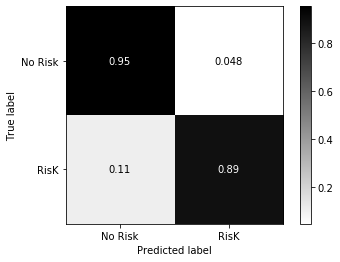

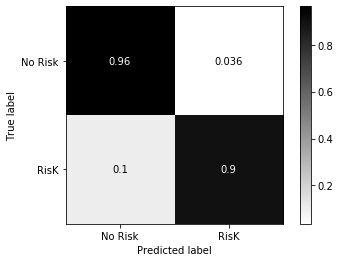

In [183]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,20,30,40], 0.00001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 1.28859521
Iteration 2, loss = 1.25606967
Iteration 3, loss = 1.22484976
Iteration 4, loss = 1.19405249
Iteration 5, loss = 1.16346252
Iteration 6, loss = 1.13339766
Iteration 7, loss = 1.10502574
Iteration 8, loss = 1.07647843
Iteration 9, loss = 1.04880811
Iteration 10, loss = 1.02297776
Iteration 11, loss = 0.99904692
Iteration 12, loss = 0.97738725
Iteration 13, loss = 0.95684238
Iteration 14, loss = 0.93702938
Iteration 15, loss = 0.91821864
Iteration 16, loss = 0.89969292
Iteration 17, loss = 0.88204629
Iteration 18, loss = 0.86532579
Iteration 19, loss = 0.84916217
Iteration 20, loss = 0.83427035
Iteration 21, loss = 0.81892166
Iteration 22, loss = 0.80518495
Iteration 23, loss = 0.79147225
Iteration 24, loss = 0.77859772
Iteration 25, loss = 0.76659238
Iteration 26, loss = 0.75454052
Iteration 27, loss = 0.74364615
Iteration 28, loss = 0.73336356
Iteration 29, loss = 0.72347336
Iteration 30, loss = 0.71384833
Iteration 31, loss = 0.70494213
Iteration 32, los

Iteration 274, loss = 0.42924469
Iteration 275, loss = 0.42829965
Iteration 276, loss = 0.42719370
Iteration 277, loss = 0.42624992
Iteration 278, loss = 0.42531617
Iteration 279, loss = 0.42426057
Iteration 280, loss = 0.42327041
Iteration 281, loss = 0.42219604
Iteration 282, loss = 0.42122603
Iteration 283, loss = 0.42024857
Iteration 284, loss = 0.41926587
Iteration 285, loss = 0.41830902
Iteration 286, loss = 0.41728221
Iteration 287, loss = 0.41638521
Iteration 288, loss = 0.41557424
Iteration 289, loss = 0.41453646
Iteration 290, loss = 0.41362594
Iteration 291, loss = 0.41244871
Iteration 292, loss = 0.41154623
Iteration 293, loss = 0.41044020
Iteration 294, loss = 0.40963670
Iteration 295, loss = 0.40860488
Iteration 296, loss = 0.40863964
Iteration 297, loss = 0.40660585
Iteration 298, loss = 0.40582646
Iteration 299, loss = 0.40483631
Iteration 300, loss = 0.40364061
Iteration 301, loss = 0.40281906
Iteration 302, loss = 0.40179160
Iteration 303, loss = 0.40077503
Iteration 

Iteration 555, loss = 0.22499380
Iteration 556, loss = 0.22466260
Iteration 557, loss = 0.22430846
Iteration 558, loss = 0.22389905
Iteration 559, loss = 0.22350463
Iteration 560, loss = 0.22301633
Iteration 561, loss = 0.22306658
Iteration 562, loss = 0.22224636
Iteration 563, loss = 0.22191965
Iteration 564, loss = 0.22162448
Iteration 565, loss = 0.22109353
Iteration 566, loss = 0.22077679
Iteration 567, loss = 0.22030135
Iteration 568, loss = 0.22032280
Iteration 569, loss = 0.21980683
Iteration 570, loss = 0.21970158
Iteration 571, loss = 0.21888741
Iteration 572, loss = 0.21875338
Iteration 573, loss = 0.21813304
Iteration 574, loss = 0.21789702
Iteration 575, loss = 0.21758569
Iteration 576, loss = 0.21710335
Iteration 577, loss = 0.21685289
Iteration 578, loss = 0.21637030
Iteration 579, loss = 0.21613721
Iteration 580, loss = 0.21572838
Iteration 581, loss = 0.21538465
Iteration 582, loss = 0.21499747
Iteration 583, loss = 0.21487560
Iteration 584, loss = 0.21431290
Iteration 

Iteration 806, loss = 0.16756066
Iteration 807, loss = 0.16739595
Iteration 808, loss = 0.16711981
Iteration 809, loss = 0.16745439
Iteration 810, loss = 0.16696624
Iteration 811, loss = 0.16715116
Iteration 812, loss = 0.16773943
Iteration 813, loss = 0.16677279
Iteration 814, loss = 0.16697696
Iteration 815, loss = 0.16703630
Iteration 816, loss = 0.16742229
Iteration 817, loss = 0.16656560
Iteration 818, loss = 0.16657525
Iteration 819, loss = 0.16650754
Iteration 820, loss = 0.16633839
Iteration 821, loss = 0.16629085
Iteration 822, loss = 0.16663804
Iteration 823, loss = 0.16607270
Iteration 824, loss = 0.16614795
Iteration 825, loss = 0.16592258
Iteration 826, loss = 0.16595055
Iteration 827, loss = 0.16584521
Iteration 828, loss = 0.16576505
Iteration 829, loss = 0.16570151
Iteration 830, loss = 0.16689481
Iteration 831, loss = 0.16618650
Iteration 832, loss = 0.16572817
Iteration 833, loss = 0.16551031
Iteration 834, loss = 0.16539117
Iteration 835, loss = 0.16543455
Iteration 

0.9230769230769231

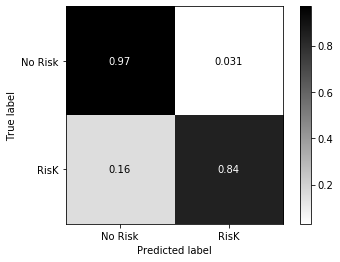

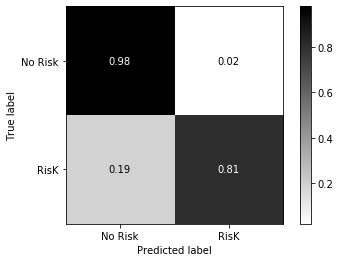

In [188]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,10,10,10], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 5.56531234
Iteration 2, loss = 5.38709572
Iteration 3, loss = 5.20977387
Iteration 4, loss = 5.03519611
Iteration 5, loss = 4.86530055
Iteration 6, loss = 4.69729924
Iteration 7, loss = 4.53202253
Iteration 8, loss = 4.37174656
Iteration 9, loss = 4.21979228
Iteration 10, loss = 4.07074839
Iteration 11, loss = 3.92514533
Iteration 12, loss = 3.78643271
Iteration 13, loss = 3.65230712
Iteration 14, loss = 3.52621514
Iteration 15, loss = 3.40610932
Iteration 16, loss = 3.29449482
Iteration 17, loss = 3.18579108
Iteration 18, loss = 3.08725105
Iteration 19, loss = 2.99642467
Iteration 20, loss = 2.91223670
Iteration 21, loss = 2.83509862
Iteration 22, loss = 2.76365680
Iteration 23, loss = 2.69815717
Iteration 24, loss = 2.63664731
Iteration 25, loss = 2.57609587
Iteration 26, loss = 2.51654954
Iteration 27, loss = 2.45988452
Iteration 28, loss = 2.40248626
Iteration 29, loss = 2.34819581
Iteration 30, loss = 2.29338848
Iteration 31, loss = 2.23927263
Iteration 32, los

Iteration 278, loss = 0.57363542
Iteration 279, loss = 0.57294311
Iteration 280, loss = 0.57197417
Iteration 281, loss = 0.57115321
Iteration 282, loss = 0.57029299
Iteration 283, loss = 0.56958435
Iteration 284, loss = 0.56870216
Iteration 285, loss = 0.56787578
Iteration 286, loss = 0.56702581
Iteration 287, loss = 0.56623345
Iteration 288, loss = 0.56539433
Iteration 289, loss = 0.56458634
Iteration 290, loss = 0.56386986
Iteration 291, loss = 0.56289836
Iteration 292, loss = 0.56249276
Iteration 293, loss = 0.56150953
Iteration 294, loss = 0.56049072
Iteration 295, loss = 0.55991069
Iteration 296, loss = 0.55900385
Iteration 297, loss = 0.55820572
Iteration 298, loss = 0.55739705
Iteration 299, loss = 0.55650063
Iteration 300, loss = 0.55605944
Iteration 301, loss = 0.55494651
Iteration 302, loss = 0.55419114
Iteration 303, loss = 0.55320360
Iteration 304, loss = 0.55249216
Iteration 305, loss = 0.55175766
Iteration 306, loss = 0.55086713
Iteration 307, loss = 0.55004219
Iteration 

Iteration 531, loss = 0.36189994
Iteration 532, loss = 0.36106805
Iteration 533, loss = 0.36028350
Iteration 534, loss = 0.35949136
Iteration 535, loss = 0.35879991
Iteration 536, loss = 0.35797279
Iteration 537, loss = 0.35719457
Iteration 538, loss = 0.35663962
Iteration 539, loss = 0.35556917
Iteration 540, loss = 0.35501824
Iteration 541, loss = 0.35405205
Iteration 542, loss = 0.35366794
Iteration 543, loss = 0.35239059
Iteration 544, loss = 0.35209684
Iteration 545, loss = 0.35095718
Iteration 546, loss = 0.35065285
Iteration 547, loss = 0.34946569
Iteration 548, loss = 0.34928620
Iteration 549, loss = 0.34822988
Iteration 550, loss = 0.34729623
Iteration 551, loss = 0.34654201
Iteration 552, loss = 0.34645635
Iteration 553, loss = 0.34501415
Iteration 554, loss = 0.34502752
Iteration 555, loss = 0.34347813
Iteration 556, loss = 0.34282655
Iteration 557, loss = 0.34198290
Iteration 558, loss = 0.34122197
Iteration 559, loss = 0.34033940
Iteration 560, loss = 0.33966261
Iteration 

Iteration 803, loss = 0.20417052
Iteration 804, loss = 0.20403014
Iteration 805, loss = 0.20413254
Iteration 806, loss = 0.20354003
Iteration 807, loss = 0.20301716
Iteration 808, loss = 0.20297809
Iteration 809, loss = 0.20277626
Iteration 810, loss = 0.20233913
Iteration 811, loss = 0.20325529
Iteration 812, loss = 0.20131529
Iteration 813, loss = 0.20167853
Iteration 814, loss = 0.20148930
Iteration 815, loss = 0.20071349
Iteration 816, loss = 0.20123486
Iteration 817, loss = 0.20240592
Iteration 818, loss = 0.20053175
Iteration 819, loss = 0.19999816
Iteration 820, loss = 0.20039983
Iteration 821, loss = 0.19905730
Iteration 822, loss = 0.19917583
Iteration 823, loss = 0.19959500
Iteration 824, loss = 0.19844933
Iteration 825, loss = 0.19878172
Iteration 826, loss = 0.19858999
Iteration 827, loss = 0.19831581
Iteration 828, loss = 0.19880888
Iteration 829, loss = 0.19720287
Iteration 830, loss = 0.19724228
Iteration 831, loss = 0.19664802
Iteration 832, loss = 0.19649970
Iteration 

Iteration 1065, loss = 0.16876422
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.9177718832891246

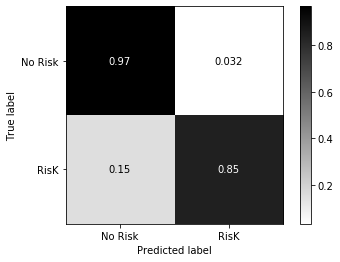

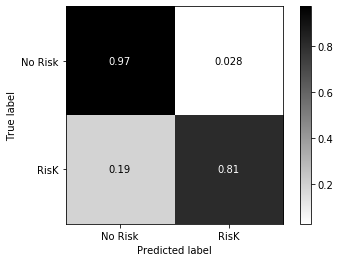

In [189]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,10,10,10,10], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 2.27609228
Iteration 2, loss = 2.14848004
Iteration 3, loss = 2.00730793
Iteration 4, loss = 1.85610752
Iteration 5, loss = 1.70824149
Iteration 6, loss = 1.56072163
Iteration 7, loss = 1.42158753
Iteration 8, loss = 1.29772430
Iteration 9, loss = 1.18128076
Iteration 10, loss = 1.09011016
Iteration 11, loss = 1.01820783
Iteration 12, loss = 0.95872407
Iteration 13, loss = 0.91670537
Iteration 14, loss = 0.88481469
Iteration 15, loss = 0.85963759
Iteration 16, loss = 0.83478757
Iteration 17, loss = 0.81670854
Iteration 18, loss = 0.80550893
Iteration 19, loss = 0.79732695
Iteration 20, loss = 0.79085727
Iteration 21, loss = 0.78641044
Iteration 22, loss = 0.78203095
Iteration 23, loss = 0.77895529
Iteration 24, loss = 0.77700004
Iteration 25, loss = 0.77530245
Iteration 26, loss = 0.77397446
Iteration 27, loss = 0.77272406
Iteration 28, loss = 0.77163176
Iteration 29, loss = 0.77061943
Iteration 30, loss = 0.76961278
Iteration 31, loss = 0.76877435
Iteration 32, los

Iteration 261, loss = 0.59673412
Iteration 262, loss = 0.59550428
Iteration 263, loss = 0.59430077
Iteration 264, loss = 0.59315623
Iteration 265, loss = 0.59191972
Iteration 266, loss = 0.59086566
Iteration 267, loss = 0.58966450
Iteration 268, loss = 0.58846788
Iteration 269, loss = 0.58728683
Iteration 270, loss = 0.58608902
Iteration 271, loss = 0.58520964
Iteration 272, loss = 0.58374017
Iteration 273, loss = 0.58268166
Iteration 274, loss = 0.58153946
Iteration 275, loss = 0.58044881
Iteration 276, loss = 0.57926757
Iteration 277, loss = 0.57826545
Iteration 278, loss = 0.57678990
Iteration 279, loss = 0.57584445
Iteration 280, loss = 0.57456819
Iteration 281, loss = 0.57329279
Iteration 282, loss = 0.57194190
Iteration 283, loss = 0.57072049
Iteration 284, loss = 0.56958783
Iteration 285, loss = 0.56855546
Iteration 286, loss = 0.56732263
Iteration 287, loss = 0.56586727
Iteration 288, loss = 0.56482960
Iteration 289, loss = 0.56371740
Iteration 290, loss = 0.56225299
Iteration 

Iteration 529, loss = 0.28058913
Iteration 530, loss = 0.28010863
Iteration 531, loss = 0.27933656
Iteration 532, loss = 0.27881249
Iteration 533, loss = 0.28158134
Iteration 534, loss = 0.27938563
Iteration 535, loss = 0.27592393
Iteration 536, loss = 0.27625045
Iteration 537, loss = 0.27427515
Iteration 538, loss = 0.27331777
Iteration 539, loss = 0.27273421
Iteration 540, loss = 0.27183256
Iteration 541, loss = 0.27091920
Iteration 542, loss = 0.27011424
Iteration 543, loss = 0.26999241
Iteration 544, loss = 0.26861322
Iteration 545, loss = 0.26824698
Iteration 546, loss = 0.26699768
Iteration 547, loss = 0.26798718
Iteration 548, loss = 0.26573089
Iteration 549, loss = 0.26575471
Iteration 550, loss = 0.26486053
Iteration 551, loss = 0.26318860
Iteration 552, loss = 0.26298739
Iteration 553, loss = 0.26216588
Iteration 554, loss = 0.26132562
Iteration 555, loss = 0.26017973
Iteration 556, loss = 0.26027857
Iteration 557, loss = 0.25879148
Iteration 558, loss = 0.25847832
Iteration 

Iteration 781, loss = 0.17151061
Iteration 782, loss = 0.17107596
Iteration 783, loss = 0.17078524
Iteration 784, loss = 0.17046547
Iteration 785, loss = 0.17225329
Iteration 786, loss = 0.17268314
Iteration 787, loss = 0.17029524
Iteration 788, loss = 0.17093372
Iteration 789, loss = 0.16987008
Iteration 790, loss = 0.16993605
Iteration 791, loss = 0.16984898
Iteration 792, loss = 0.16971256
Iteration 793, loss = 0.16932998
Iteration 794, loss = 0.16933291
Iteration 795, loss = 0.16944390
Iteration 796, loss = 0.16935431
Iteration 797, loss = 0.16891216
Iteration 798, loss = 0.16931099
Iteration 799, loss = 0.16963641
Iteration 800, loss = 0.17005223
Iteration 801, loss = 0.16961762
Iteration 802, loss = 0.16872049
Iteration 803, loss = 0.17075179
Iteration 804, loss = 0.16876799
Iteration 805, loss = 0.16797694
Iteration 806, loss = 0.16901868
Iteration 807, loss = 0.16911404
Iteration 808, loss = 0.17111283
Iteration 809, loss = 0.16863970
Iteration 810, loss = 0.16997668
Iteration 

0.9257294429708223

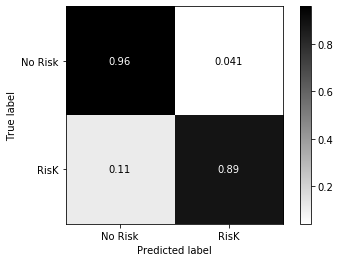

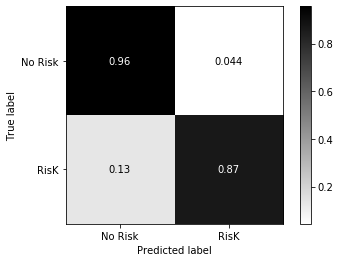

In [191]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [20,20,20,20,20], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 2.84113320
Iteration 2, loss = 2.61133127
Iteration 3, loss = 2.39011872
Iteration 4, loss = 2.17772885
Iteration 5, loss = 1.97696070
Iteration 6, loss = 1.80608124
Iteration 7, loss = 1.64802398
Iteration 8, loss = 1.50235565
Iteration 9, loss = 1.36896064
Iteration 10, loss = 1.23670262
Iteration 11, loss = 1.12082500
Iteration 12, loss = 1.01477358
Iteration 13, loss = 0.92186043
Iteration 14, loss = 0.84648420
Iteration 15, loss = 0.78234960
Iteration 16, loss = 0.74508602
Iteration 17, loss = 0.71477739
Iteration 18, loss = 0.68928940
Iteration 19, loss = 0.67194389
Iteration 20, loss = 0.65786320
Iteration 21, loss = 0.64968337
Iteration 22, loss = 0.64521213
Iteration 23, loss = 0.64262161
Iteration 24, loss = 0.64072421
Iteration 25, loss = 0.63943268
Iteration 26, loss = 0.63825926
Iteration 27, loss = 0.63748327
Iteration 28, loss = 0.63683570
Iteration 29, loss = 0.63622045
Iteration 30, loss = 0.63573104
Iteration 31, loss = 0.63520612
Iteration 32, los

Iteration 260, loss = 0.44974648
Iteration 261, loss = 0.44673177
Iteration 262, loss = 0.44430766
Iteration 263, loss = 0.44152243
Iteration 264, loss = 0.43751266
Iteration 265, loss = 0.43473637
Iteration 266, loss = 0.43153052
Iteration 267, loss = 0.42890822
Iteration 268, loss = 0.42545273
Iteration 269, loss = 0.42378350
Iteration 270, loss = 0.42086890
Iteration 271, loss = 0.41710725
Iteration 272, loss = 0.41440472
Iteration 273, loss = 0.41343527
Iteration 274, loss = 0.40874347
Iteration 275, loss = 0.40566508
Iteration 276, loss = 0.40264103
Iteration 277, loss = 0.40038722
Iteration 278, loss = 0.39731237
Iteration 279, loss = 0.39369404
Iteration 280, loss = 0.39169381
Iteration 281, loss = 0.38786394
Iteration 282, loss = 0.38536744
Iteration 283, loss = 0.38169251
Iteration 284, loss = 0.37927092
Iteration 285, loss = 0.37582640
Iteration 286, loss = 0.37242821
Iteration 287, loss = 0.36938318
Iteration 288, loss = 0.36579445
Iteration 289, loss = 0.36244412
Iteration 

Iteration 527, loss = 0.16178692
Iteration 528, loss = 0.16001079
Iteration 529, loss = 0.16094676
Iteration 530, loss = 0.16140874
Iteration 531, loss = 0.16042023
Iteration 532, loss = 0.16196904
Iteration 533, loss = 0.16001682
Iteration 534, loss = 0.16032738
Iteration 535, loss = 0.16225673
Iteration 536, loss = 0.16121085
Iteration 537, loss = 0.16048100
Iteration 538, loss = 0.16156755
Iteration 539, loss = 0.16067106
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.9416445623342176

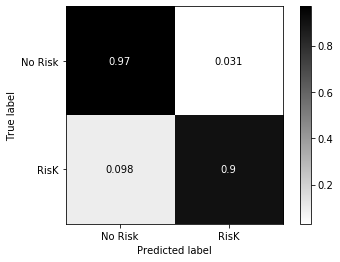

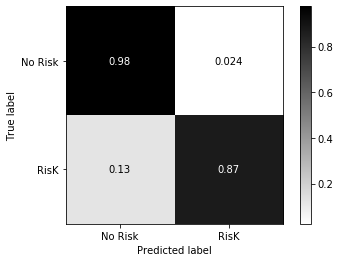

In [192]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [30,30,30,30,30], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 0.71980336
Iteration 2, loss = 0.71793936
Iteration 3, loss = 0.71272147
Iteration 4, loss = 0.71109173
Iteration 5, loss = 0.70924739
Iteration 6, loss = 0.70735644
Iteration 7, loss = 0.70250091
Iteration 8, loss = 0.69949093
Iteration 9, loss = 0.69668677
Iteration 10, loss = 0.69499864
Iteration 11, loss = 0.69235545
Iteration 12, loss = 0.69037429
Iteration 13, loss = 0.68721871
Iteration 14, loss = 0.68540957
Iteration 15, loss = 0.68278442
Iteration 16, loss = 0.67976850
Iteration 17, loss = 0.67827063
Iteration 18, loss = 0.67530615
Iteration 19, loss = 0.67277382
Iteration 20, loss = 0.67088088
Iteration 21, loss = 0.66893173
Iteration 22, loss = 0.66635669
Iteration 23, loss = 0.66379589
Iteration 24, loss = 0.66343404
Iteration 25, loss = 0.65884104
Iteration 26, loss = 0.65663924
Iteration 27, loss = 0.65333827
Iteration 28, loss = 0.65082208
Iteration 29, loss = 0.64760399
Iteration 30, loss = 0.64448291
Iteration 31, loss = 0.64154370
Iteration 32, los

Iteration 255, loss = 0.17375375
Iteration 256, loss = 0.17569631
Iteration 257, loss = 0.16705473
Iteration 258, loss = 0.16490792
Iteration 259, loss = 0.16481287
Iteration 260, loss = 0.16592894
Iteration 261, loss = 0.16497080
Iteration 262, loss = 0.16478166
Iteration 263, loss = 0.16468903
Iteration 264, loss = 0.16399342
Iteration 265, loss = 0.16479153
Iteration 266, loss = 0.16723275
Iteration 267, loss = 0.17100336
Iteration 268, loss = 0.16592604
Iteration 269, loss = 0.16647908
Iteration 270, loss = 0.16454127
Iteration 271, loss = 0.16533895
Iteration 272, loss = 0.16348531
Iteration 273, loss = 0.16953902
Iteration 274, loss = 0.16813977
Iteration 275, loss = 0.16777197
Iteration 276, loss = 0.17121070
Iteration 277, loss = 0.16879657
Iteration 278, loss = 0.16769140
Iteration 279, loss = 0.16880686
Iteration 280, loss = 0.16582476
Iteration 281, loss = 0.16320905
Iteration 282, loss = 0.16281054
Iteration 283, loss = 0.16324254
Iteration 284, loss = 0.16332539
Iteration 

0.9204244031830239

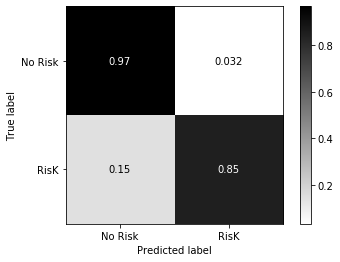

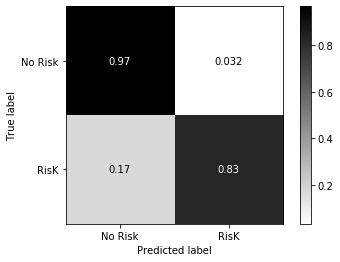

In [194]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [50,50,50,50,50], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 1.09278078
Iteration 2, loss = 0.85155287
Iteration 3, loss = 0.72084275
Iteration 4, loss = 0.69112518
Iteration 5, loss = 0.69339772
Iteration 6, loss = 0.68468041
Iteration 7, loss = 0.67247192
Iteration 8, loss = 0.66684988
Iteration 9, loss = 0.66179922
Iteration 10, loss = 0.65792733
Iteration 11, loss = 0.65471670
Iteration 12, loss = 0.65166567
Iteration 13, loss = 0.64833238
Iteration 14, loss = 0.64602191
Iteration 15, loss = 0.64292870
Iteration 16, loss = 0.63999883
Iteration 17, loss = 0.63735897
Iteration 18, loss = 0.63490831
Iteration 19, loss = 0.63327173
Iteration 20, loss = 0.62894285
Iteration 21, loss = 0.62720281
Iteration 22, loss = 0.62503560
Iteration 23, loss = 0.62153303
Iteration 24, loss = 0.61925334
Iteration 25, loss = 0.61612432
Iteration 26, loss = 0.61313789
Iteration 27, loss = 0.61051509
Iteration 28, loss = 0.60757605
Iteration 29, loss = 0.60443533
Iteration 30, loss = 0.60459858
Iteration 31, loss = 0.59866428
Iteration 32, los

Iteration 256, loss = 0.17824117
Iteration 257, loss = 0.17154809
Iteration 258, loss = 0.17319392
Iteration 259, loss = 0.17093180
Iteration 260, loss = 0.17141758
Iteration 261, loss = 0.17283037
Iteration 262, loss = 0.17524524
Iteration 263, loss = 0.17004243
Iteration 264, loss = 0.17097691
Iteration 265, loss = 0.17248060
Iteration 266, loss = 0.17448147
Iteration 267, loss = 0.17072982
Iteration 268, loss = 0.17404924
Iteration 269, loss = 0.17155588
Iteration 270, loss = 0.17313681
Iteration 271, loss = 0.17161777
Iteration 272, loss = 0.16894395
Iteration 273, loss = 0.17167439
Iteration 274, loss = 0.17251251
Iteration 275, loss = 0.17103286
Iteration 276, loss = 0.17752472
Iteration 277, loss = 0.17338512
Iteration 278, loss = 0.16861756
Iteration 279, loss = 0.16904590
Iteration 280, loss = 0.16853703
Iteration 281, loss = 0.17218785
Iteration 282, loss = 0.17238481
Iteration 283, loss = 0.17309827
Iteration 284, loss = 0.17333665
Iteration 285, loss = 0.16964754
Iteration 

0.9389920424403183

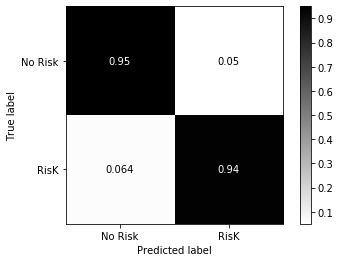

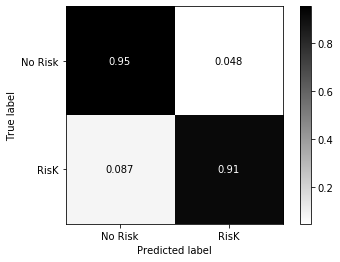

In [195]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [30,30,30,30,30,30], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 3.24528199
Iteration 2, loss = 3.20188289
Iteration 3, loss = 3.15890521
Iteration 4, loss = 3.11478149
Iteration 5, loss = 3.07185437
Iteration 6, loss = 3.02857275
Iteration 7, loss = 2.98478538
Iteration 8, loss = 2.94202382
Iteration 9, loss = 2.89890141
Iteration 10, loss = 2.85592940
Iteration 11, loss = 2.81242396
Iteration 12, loss = 2.76995939
Iteration 13, loss = 2.72647779
Iteration 14, loss = 2.68419646
Iteration 15, loss = 2.64170378
Iteration 16, loss = 2.59899221
Iteration 17, loss = 2.55590833
Iteration 18, loss = 2.51379858
Iteration 19, loss = 2.47155835
Iteration 20, loss = 2.42964784
Iteration 21, loss = 2.38772403
Iteration 22, loss = 2.34454391
Iteration 23, loss = 2.30332909
Iteration 24, loss = 2.26077334
Iteration 25, loss = 2.21946381
Iteration 26, loss = 2.17744041
Iteration 27, loss = 2.13610384
Iteration 28, loss = 2.09387693
Iteration 29, loss = 2.05189132
Iteration 30, loss = 2.01038151
Iteration 31, loss = 1.96756305
Iteration 32, los

Iteration 259, loss = 0.66565407
Iteration 260, loss = 0.66551759
Iteration 261, loss = 0.66537732
Iteration 262, loss = 0.66524312
Iteration 263, loss = 0.66510479
Iteration 264, loss = 0.66498978
Iteration 265, loss = 0.66483834
Iteration 266, loss = 0.66468304
Iteration 267, loss = 0.66452849
Iteration 268, loss = 0.66439607
Iteration 269, loss = 0.66424631
Iteration 270, loss = 0.66410009
Iteration 271, loss = 0.66397743
Iteration 272, loss = 0.66387755
Iteration 273, loss = 0.66368824
Iteration 274, loss = 0.66354091
Iteration 275, loss = 0.66341395
Iteration 276, loss = 0.66323943
Iteration 277, loss = 0.66311570
Iteration 278, loss = 0.66296246
Iteration 279, loss = 0.66280543
Iteration 280, loss = 0.66266317
Iteration 281, loss = 0.66248787
Iteration 282, loss = 0.66234547
Iteration 283, loss = 0.66218862
Iteration 284, loss = 0.66202448
Iteration 285, loss = 0.66188214
Iteration 286, loss = 0.66172709
Iteration 287, loss = 0.66155574
Iteration 288, loss = 0.66138816
Iteration 

Iteration 515, loss = 0.59661579
Iteration 516, loss = 0.59635582
Iteration 517, loss = 0.59612354
Iteration 518, loss = 0.59587600
Iteration 519, loss = 0.59564329
Iteration 520, loss = 0.59539352
Iteration 521, loss = 0.59514398
Iteration 522, loss = 0.59497556
Iteration 523, loss = 0.59470195
Iteration 524, loss = 0.59442390
Iteration 525, loss = 0.59416127
Iteration 526, loss = 0.59403825
Iteration 527, loss = 0.59367565
Iteration 528, loss = 0.59339202
Iteration 529, loss = 0.59313337
Iteration 530, loss = 0.59288220
Iteration 531, loss = 0.59262689
Iteration 532, loss = 0.59235555
Iteration 533, loss = 0.59211081
Iteration 534, loss = 0.59180455
Iteration 535, loss = 0.59154168
Iteration 536, loss = 0.59127173
Iteration 537, loss = 0.59098302
Iteration 538, loss = 0.59069632
Iteration 539, loss = 0.59043106
Iteration 540, loss = 0.59015311
Iteration 541, loss = 0.58988689
Iteration 542, loss = 0.58959781
Iteration 543, loss = 0.58932684
Iteration 544, loss = 0.58906752
Iteration 

Iteration 772, loss = 0.52925007
Iteration 773, loss = 0.52903704
Iteration 774, loss = 0.52873270
Iteration 775, loss = 0.52849203
Iteration 776, loss = 0.52825532
Iteration 777, loss = 0.52799263
Iteration 778, loss = 0.52779557
Iteration 779, loss = 0.52752884
Iteration 780, loss = 0.52723255
Iteration 781, loss = 0.52699498
Iteration 782, loss = 0.52682077
Iteration 783, loss = 0.52649794
Iteration 784, loss = 0.52621191
Iteration 785, loss = 0.52598765
Iteration 786, loss = 0.52574484
Iteration 787, loss = 0.52559577
Iteration 788, loss = 0.52518161
Iteration 789, loss = 0.52494091
Iteration 790, loss = 0.52470701
Iteration 791, loss = 0.52449477
Iteration 792, loss = 0.52423339
Iteration 793, loss = 0.52400551
Iteration 794, loss = 0.52371053
Iteration 795, loss = 0.52344518
Iteration 796, loss = 0.52324338
Iteration 797, loss = 0.52293361
Iteration 798, loss = 0.52267861
Iteration 799, loss = 0.52243211
Iteration 800, loss = 0.52230555
Iteration 801, loss = 0.52207387
Iteration 

Iteration 1020, loss = 0.46168876
Iteration 1021, loss = 0.46143202
Iteration 1022, loss = 0.46116431
Iteration 1023, loss = 0.46097478
Iteration 1024, loss = 0.46057640
Iteration 1025, loss = 0.46030955
Iteration 1026, loss = 0.46007590
Iteration 1027, loss = 0.45976287
Iteration 1028, loss = 0.45949108
Iteration 1029, loss = 0.45929028
Iteration 1030, loss = 0.45897837
Iteration 1031, loss = 0.45867355
Iteration 1032, loss = 0.45846885
Iteration 1033, loss = 0.45817410
Iteration 1034, loss = 0.45786330
Iteration 1035, loss = 0.45767388
Iteration 1036, loss = 0.45737269
Iteration 1037, loss = 0.45711417
Iteration 1038, loss = 0.45678706
Iteration 1039, loss = 0.45660958
Iteration 1040, loss = 0.45628867
Iteration 1041, loss = 0.45614708
Iteration 1042, loss = 0.45571327
Iteration 1043, loss = 0.45553096
Iteration 1044, loss = 0.45524469
Iteration 1045, loss = 0.45512830
Iteration 1046, loss = 0.45464036
Iteration 1047, loss = 0.45436047
Iteration 1048, loss = 0.45423669
Iteration 1049

Iteration 1270, loss = 0.39246342
Iteration 1271, loss = 0.39228237
Iteration 1272, loss = 0.39200801
Iteration 1273, loss = 0.39174023
Iteration 1274, loss = 0.39148124
Iteration 1275, loss = 0.39132698
Iteration 1276, loss = 0.39095855
Iteration 1277, loss = 0.39078720
Iteration 1278, loss = 0.39042977
Iteration 1279, loss = 0.39042293
Iteration 1280, loss = 0.39004108
Iteration 1281, loss = 0.38961359
Iteration 1282, loss = 0.38944649
Iteration 1283, loss = 0.38921166
Iteration 1284, loss = 0.38892230
Iteration 1285, loss = 0.38871778
Iteration 1286, loss = 0.38843236
Iteration 1287, loss = 0.38819962
Iteration 1288, loss = 0.38810134
Iteration 1289, loss = 0.38761925
Iteration 1290, loss = 0.38754894
Iteration 1291, loss = 0.38723784
Iteration 1292, loss = 0.38694257
Iteration 1293, loss = 0.38668981
Iteration 1294, loss = 0.38652046
Iteration 1295, loss = 0.38622622
Iteration 1296, loss = 0.38591357
Iteration 1297, loss = 0.38569150
Iteration 1298, loss = 0.38573461
Iteration 1299

Iteration 1514, loss = 0.33508943
Iteration 1515, loss = 0.33505155
Iteration 1516, loss = 0.33472187
Iteration 1517, loss = 0.33441254
Iteration 1518, loss = 0.33425504
Iteration 1519, loss = 0.33398822
Iteration 1520, loss = 0.33380734
Iteration 1521, loss = 0.33357338
Iteration 1522, loss = 0.33335931
Iteration 1523, loss = 0.33323438
Iteration 1524, loss = 0.33295301
Iteration 1525, loss = 0.33271631
Iteration 1526, loss = 0.33253967
Iteration 1527, loss = 0.33250402
Iteration 1528, loss = 0.33206511
Iteration 1529, loss = 0.33184609
Iteration 1530, loss = 0.33163805
Iteration 1531, loss = 0.33139791
Iteration 1532, loss = 0.33120697
Iteration 1533, loss = 0.33098952
Iteration 1534, loss = 0.33075860
Iteration 1535, loss = 0.33057484
Iteration 1536, loss = 0.33040613
Iteration 1537, loss = 0.33023606
Iteration 1538, loss = 0.32996195
Iteration 1539, loss = 0.32976805
Iteration 1540, loss = 0.32951150
Iteration 1541, loss = 0.32935498
Iteration 1542, loss = 0.32921963
Iteration 1543

Iteration 1755, loss = 0.28843834
Iteration 1756, loss = 0.28826292
Iteration 1757, loss = 0.28806575
Iteration 1758, loss = 0.28794620
Iteration 1759, loss = 0.28771259
Iteration 1760, loss = 0.28755601
Iteration 1761, loss = 0.28743432
Iteration 1762, loss = 0.28727991
Iteration 1763, loss = 0.28708185
Iteration 1764, loss = 0.28694849
Iteration 1765, loss = 0.28676201
Iteration 1766, loss = 0.28651559
Iteration 1767, loss = 0.28640392
Iteration 1768, loss = 0.28625546
Iteration 1769, loss = 0.28620222
Iteration 1770, loss = 0.28588461
Iteration 1771, loss = 0.28573925
Iteration 1772, loss = 0.28556923
Iteration 1773, loss = 0.28531820
Iteration 1774, loss = 0.28523425
Iteration 1775, loss = 0.28503973
Iteration 1776, loss = 0.28484085
Iteration 1777, loss = 0.28471384
Iteration 1778, loss = 0.28477463
Iteration 1779, loss = 0.28439886
Iteration 1780, loss = 0.28439867
Iteration 1781, loss = 0.28401366
Iteration 1782, loss = 0.28383915
Iteration 1783, loss = 0.28369220
Iteration 1784

Iteration 1998, loss = 0.25208602
Iteration 1999, loss = 0.25199298
Iteration 2000, loss = 0.25186450
Iteration 2001, loss = 0.25177628
Iteration 2002, loss = 0.25169878
Iteration 2003, loss = 0.25152546
Iteration 2004, loss = 0.25134763
Iteration 2005, loss = 0.25126189
Iteration 2006, loss = 0.25120167
Iteration 2007, loss = 0.25102149
Iteration 2008, loss = 0.25091241
Iteration 2009, loss = 0.25072612
Iteration 2010, loss = 0.25062258
Iteration 2011, loss = 0.25049193
Iteration 2012, loss = 0.25035951
Iteration 2013, loss = 0.25021803
Iteration 2014, loss = 0.25009148
Iteration 2015, loss = 0.24997252
Iteration 2016, loss = 0.24979603
Iteration 2017, loss = 0.24972524
Iteration 2018, loss = 0.24960325
Iteration 2019, loss = 0.24950646
Iteration 2020, loss = 0.24941324
Iteration 2021, loss = 0.24922526
Iteration 2022, loss = 0.24922098
Iteration 2023, loss = 0.24889632
Iteration 2024, loss = 0.24891866
Iteration 2025, loss = 0.24876640
Iteration 2026, loss = 0.24868878
Iteration 2027

Iteration 2240, loss = 0.22574011
Iteration 2241, loss = 0.22562283
Iteration 2242, loss = 0.22553079
Iteration 2243, loss = 0.22545580
Iteration 2244, loss = 0.22539388
Iteration 2245, loss = 0.22531821
Iteration 2246, loss = 0.22513332
Iteration 2247, loss = 0.22509360
Iteration 2248, loss = 0.22506001
Iteration 2249, loss = 0.22494300
Iteration 2250, loss = 0.22485544
Iteration 2251, loss = 0.22475635
Iteration 2252, loss = 0.22463462
Iteration 2253, loss = 0.22461268
Iteration 2254, loss = 0.22447004
Iteration 2255, loss = 0.22438664
Iteration 2256, loss = 0.22432986
Iteration 2257, loss = 0.22416709
Iteration 2258, loss = 0.22410435
Iteration 2259, loss = 0.22400150
Iteration 2260, loss = 0.22396094
Iteration 2261, loss = 0.22381727
Iteration 2262, loss = 0.22380865
Iteration 2263, loss = 0.22367495
Iteration 2264, loss = 0.22359894
Iteration 2265, loss = 0.22346620
Iteration 2266, loss = 0.22349958
Iteration 2267, loss = 0.22350924
Iteration 2268, loss = 0.22321263
Iteration 2269

0.9124668435013262

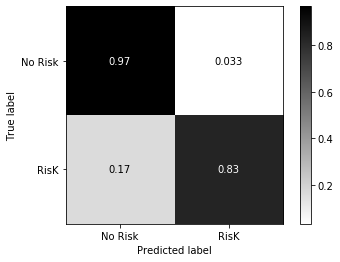

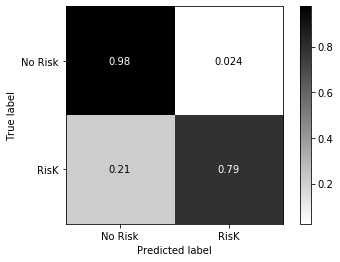

In [198]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [50,50,50], 0.00001, 20000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

Iteration 1, loss = 1.18734922
Iteration 2, loss = 1.07820736
Iteration 3, loss = 0.98399172
Iteration 4, loss = 0.89870792
Iteration 5, loss = 0.82723937
Iteration 6, loss = 0.77346276
Iteration 7, loss = 0.73723877
Iteration 8, loss = 0.71650473
Iteration 9, loss = 0.70385385
Iteration 10, loss = 0.70065039
Iteration 11, loss = 0.69886079
Iteration 12, loss = 0.69802205
Iteration 13, loss = 0.69697922
Iteration 14, loss = 0.69558790
Iteration 15, loss = 0.69425352
Iteration 16, loss = 0.69294324
Iteration 17, loss = 0.69170770
Iteration 18, loss = 0.69082526
Iteration 19, loss = 0.68995359
Iteration 20, loss = 0.68903419
Iteration 21, loss = 0.68794874
Iteration 22, loss = 0.68683107
Iteration 23, loss = 0.68527862
Iteration 24, loss = 0.68410345
Iteration 25, loss = 0.68326814
Iteration 26, loss = 0.68224660
Iteration 27, loss = 0.68114115
Iteration 28, loss = 0.68004727
Iteration 29, loss = 0.67882598
Iteration 30, loss = 0.67745209
Iteration 31, loss = 0.67576071
Iteration 32, los

Iteration 254, loss = 0.51628957
Iteration 255, loss = 0.51513612
Iteration 256, loss = 0.51453176
Iteration 257, loss = 0.51389595
Iteration 258, loss = 0.51302947
Iteration 259, loss = 0.51237107
Iteration 260, loss = 0.51167410
Iteration 261, loss = 0.51110201
Iteration 262, loss = 0.51058401
Iteration 263, loss = 0.50981101
Iteration 264, loss = 0.50887506
Iteration 265, loss = 0.50843135
Iteration 266, loss = 0.50740674
Iteration 267, loss = 0.50671851
Iteration 268, loss = 0.50618706
Iteration 269, loss = 0.50547789
Iteration 270, loss = 0.50470661
Iteration 271, loss = 0.50398827
Iteration 272, loss = 0.50343338
Iteration 273, loss = 0.50302469
Iteration 274, loss = 0.50234575
Iteration 275, loss = 0.50138959
Iteration 276, loss = 0.50079551
Iteration 277, loss = 0.50038378
Iteration 278, loss = 0.49947977
Iteration 279, loss = 0.49879678
Iteration 280, loss = 0.49840265
Iteration 281, loss = 0.49735255
Iteration 282, loss = 0.49671778
Iteration 283, loss = 0.49587940
Iteration 

Iteration 506, loss = 0.35122070
Iteration 507, loss = 0.35124467
Iteration 508, loss = 0.35048542
Iteration 509, loss = 0.34959223
Iteration 510, loss = 0.34944939
Iteration 511, loss = 0.34860609
Iteration 512, loss = 0.34847296
Iteration 513, loss = 0.34753841
Iteration 514, loss = 0.34711696
Iteration 515, loss = 0.34649645
Iteration 516, loss = 0.34584837
Iteration 517, loss = 0.34540552
Iteration 518, loss = 0.34525675
Iteration 519, loss = 0.34423877
Iteration 520, loss = 0.34378517
Iteration 521, loss = 0.34321507
Iteration 522, loss = 0.34277035
Iteration 523, loss = 0.34231337
Iteration 524, loss = 0.34159704
Iteration 525, loss = 0.34116737
Iteration 526, loss = 0.34068577
Iteration 527, loss = 0.34013689
Iteration 528, loss = 0.33957441
Iteration 529, loss = 0.33997358
Iteration 530, loss = 0.33865721
Iteration 531, loss = 0.33866937
Iteration 532, loss = 0.33765182
Iteration 533, loss = 0.33701015
Iteration 534, loss = 0.33668116
Iteration 535, loss = 0.33640280
Iteration 

Iteration 758, loss = 0.23771398
Iteration 759, loss = 0.23810275
Iteration 760, loss = 0.23668177
Iteration 761, loss = 0.23611430
Iteration 762, loss = 0.23603504
Iteration 763, loss = 0.23570419
Iteration 764, loss = 0.23553393
Iteration 765, loss = 0.23545610
Iteration 766, loss = 0.23512904
Iteration 767, loss = 0.23492557
Iteration 768, loss = 0.23475624
Iteration 769, loss = 0.23502796
Iteration 770, loss = 0.23445904
Iteration 771, loss = 0.23425183
Iteration 772, loss = 0.23399410
Iteration 773, loss = 0.23398287
Iteration 774, loss = 0.23365346
Iteration 775, loss = 0.23395986
Iteration 776, loss = 0.23361593
Iteration 777, loss = 0.23340593
Iteration 778, loss = 0.23295349
Iteration 779, loss = 0.23291623
Iteration 780, loss = 0.23282535
Iteration 781, loss = 0.23271878
Iteration 782, loss = 0.23236007
Iteration 783, loss = 0.23252869
Iteration 784, loss = 0.23204081
Iteration 785, loss = 0.23230009
Iteration 786, loss = 0.23196494
Iteration 787, loss = 0.23191756
Iteration 

Iteration 1007, loss = 0.20800104
Iteration 1008, loss = 0.20801795
Iteration 1009, loss = 0.20806313
Iteration 1010, loss = 0.20832813
Iteration 1011, loss = 0.20795384
Iteration 1012, loss = 0.20852089
Iteration 1013, loss = 0.20788630
Iteration 1014, loss = 0.20782142
Iteration 1015, loss = 0.20775910
Iteration 1016, loss = 0.20784057
Iteration 1017, loss = 0.20721889
Iteration 1018, loss = 0.20714914
Iteration 1019, loss = 0.20714790
Iteration 1020, loss = 0.20718704
Iteration 1021, loss = 0.20710722
Iteration 1022, loss = 0.20701004
Iteration 1023, loss = 0.20713762
Iteration 1024, loss = 0.20662598
Iteration 1025, loss = 0.20677944
Iteration 1026, loss = 0.20659511
Iteration 1027, loss = 0.20696973
Iteration 1028, loss = 0.20659670
Iteration 1029, loss = 0.20637914
Iteration 1030, loss = 0.20635039
Iteration 1031, loss = 0.20648149
Iteration 1032, loss = 0.20624777
Iteration 1033, loss = 0.20745036
Iteration 1034, loss = 0.20566761
Iteration 1035, loss = 0.20641366
Iteration 1036

Iteration 1249, loss = 0.19299720
Iteration 1250, loss = 0.19333620
Iteration 1251, loss = 0.19383435
Iteration 1252, loss = 0.19268557
Iteration 1253, loss = 0.19337370
Iteration 1254, loss = 0.19303147
Iteration 1255, loss = 0.19346165
Iteration 1256, loss = 0.19445600
Iteration 1257, loss = 0.19272411
Iteration 1258, loss = 0.19264083
Iteration 1259, loss = 0.19276340
Iteration 1260, loss = 0.19255005
Iteration 1261, loss = 0.19250429
Iteration 1262, loss = 0.19237998
Iteration 1263, loss = 0.19316123
Iteration 1264, loss = 0.19237555
Iteration 1265, loss = 0.19261575
Iteration 1266, loss = 0.19253692
Iteration 1267, loss = 0.19298033
Iteration 1268, loss = 0.19269159
Iteration 1269, loss = 0.19270322
Iteration 1270, loss = 0.19255707
Iteration 1271, loss = 0.19209950
Iteration 1272, loss = 0.19306733
Iteration 1273, loss = 0.19266309
Iteration 1274, loss = 0.19185199
Iteration 1275, loss = 0.19247933
Iteration 1276, loss = 0.19172330
Iteration 1277, loss = 0.19170163
Iteration 1278

0.9310344827586207

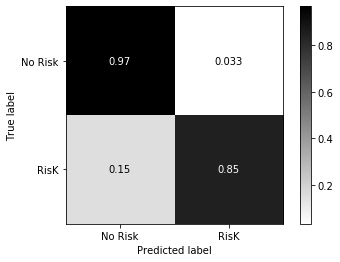

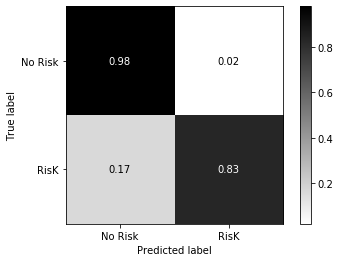

In [201]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,100,200,400], 0.00001, 2000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
def CreateDecisionTree(xtr,ytr,xte,yte):
    bestAcc = bestTp = bestFp = bestTn = bestFn = bestDepth = bestModel = 0
    
    for i in range(1,21):
        model = DecisionTreeClassifier(max_depth=i) # Make a new model.
        fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
        predicted = fittedModel.predict(xte) ## Predict test split.

        tn, fp, fn, tp = skl.metrics.confusion_matrix(yte, predicted).ravel()

        et =  tp + tn
        ef =  fp + fn
        e =  et + ef
        acc = round((100 / e) * et, 2)
        
        if acc > bestAcc:
            bestDepth = i
            bestAcc = acc
            bestModel = model
            bestTp = tp
            bestFp = fp
            bestTn = tn
            bestFn = fn

    print("Best depth: " + str(bestDepth))
    print("\nAcc: " + str(bestAcc) + "%")
    
#         print("Train loss:")
#         print("MAE: "+ str(mae(ytr, fittedModel.predict(xtr))))
#         print("MSE: "+ str(mse(ytr, fittedModel.predict(xtr))))

#         print("\nTest loss:")
#         print("MAE: "+ str(mae(yte, fittedModel.predict(xte))))
#         print("MSE: "+ str(mse(yte, fittedModel.predict(xte))))


    tnrate = round((bestTn / (bestFn + bestTn)) * 100, 2)
    tprate = round((bestTp / (bestFp + bestTp)) * 100, 2)
    print("\nTrue Negatives: " + str(bestTn))
    print("False Negatives: " + str(bestFn))
    print(str(tnrate) + "%")

    print("True Positives: " + str(bestTp))
    print("False Positives: " + str(bestFp))
    print(str(tprate) + "%")

    plot_tree(bestModel, feature_names=xtr.columns.values)

In [ ]:
CreateDecisionTree(xtr,ytr,xte,yte)

In [ ]:
data = cdfNoCluster.drop(columns=["label"])
labels = cdfNoCluster["label"]

xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)
CreateDecisionTree(xtr,ytr,xte,yte)

<a href="#contents">[back to top]</a>

#### <a id="15"></a>
<h3>1.5. Evaluation</h3>

<a href="#contents">[back to top]</a>

<a id="16"></a>
<h3>1.6. (Theoretical) Deployment</h3>

<a href="#contents">[back to top]</a>